<a id='1cca'></a>
## 1. Contents of credit card dataset analysis
* [*2 About Dataset*](#2cca)
* [*3 Loading the dataset*](#3cca)
* [*4 Normal Data and Fraudulent Datat*](#4cca)
* [*5 Plotting*](#5cca)
* [*6 Summary*](#6cca)

In this notebook we will analyze the credit card data set in order to later build simple anomaly detection models.

data source: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

<a id='2cca'></a>
## 2. About Dataset
### Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a **PCA transformation**.

Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.

Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

[Return to Contents of credit card dataset analysis](#1cca)

<a id='3cca'></a>
## 3. Loading the dataset

In [2]:
import numpy as np #Version: 1.21.5
import pandas as pd #version 1.3.5
import matplotlib.pyplot as plt #matplotlib version 3.5.1
from pylab import rcParams
rcParams['figure.figsize'] = 14,8 
%matplotlib inline
#Python version 3.7.13

In [5]:
cc = pd.read_csv("creditcard.csv")

In [6]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
cc.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.473120e-16  8.042109e-16  5.282512e-16  4.456271e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.426896e-15  1.701640e-15 -3.662252e-16 -1.217809e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

The main takeaway here are:
1. there are a huge number of data points.
2. There are 284,807 rows and 31 columns in this data frame. 
> That’s a lotof entries! Theres is a wide range of values for Time and Amount.
>> So when building the various data sets for the model training process, we definitely need to scale down the data. Otherwise, such large data values can potentially mess up the training process.

[Return to Contents of credit card dataset analysis](#1cca)

## 4 Normal Data and Fraudulent Data
<a id='4cca'></a>

Since there are only two classes, normal and fraud, let’s split up the data frame by class and continue with the data analysis. In the context of anomaly detection, the fraud class is also the anomaly class, hence why we chose to name the data frame representing fraudulent transaction data anomalies and interchangeably refer to this class as either fraud or anomaly.

In [9]:
# creates two dataframes. One for anomalies or fraud data and normal for not anomalies
anomalies = cc[cc.Class == 1]
normal = cc[cc.Class == 0]

In [10]:
# prints out the shape of each reacently created dfs
print(f"Anomalies:{anomalies.shape}")
print(f"Normal: {normal.shape}")

Anomalies:(492, 31)
Normal: (284315, 31)


From here, you can see that the data is overwhelmingly biased towards normal data, and that anomalies only comprise a vast minority of data points in the overall data set. 

What this tells you is that you will have to craft the training, evaluation, and validation sets more carefully so each of these sets will have a good representation of anomaly data.

let’s look at this disparity in a graphical manner just to see how large the difference is

Text(0, 0.5, 'Counts')

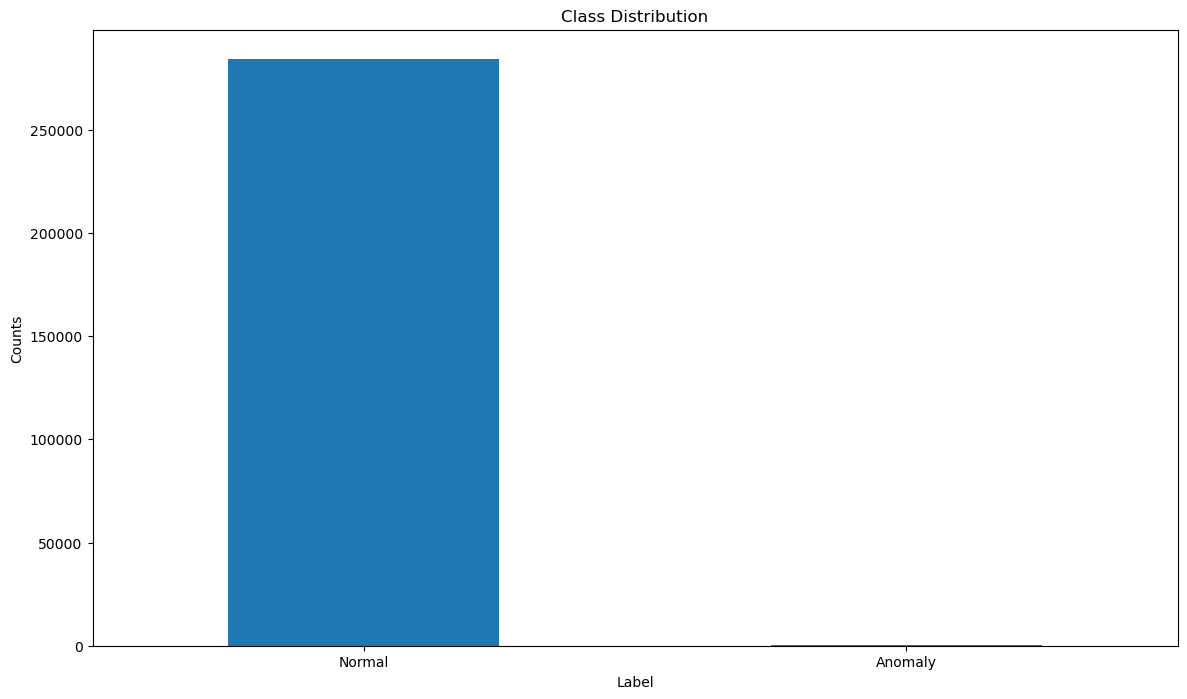

In [11]:
class_counts = cc.value_counts(cc['Class'], sort = True)
class_counts.plot(kind = 'bar', rot=0)
plt.title("Class Distribution")
plt.xticks(range(2), ["Normal", "Anomaly"])
plt.xlabel("Label")
plt.ylabel("Counts")

So now you can begin analyzing some of the characteristics of data points in each class. First of all, the columns in this data set are Time, values V1 through V28, Amount, and Class.

So, do anomalous data values comprise transactions with excessive amounts? Let’s look at some statistical summary values for Amount:

In [13]:
anomalies.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

It seems like the data is skewed right, and that anomalous transactions comprise values that are not very high. In fact, most of the transactions are less than $100, so it’s not like fraudulent transactions are high-value transactions.

<AxesSubplot:>

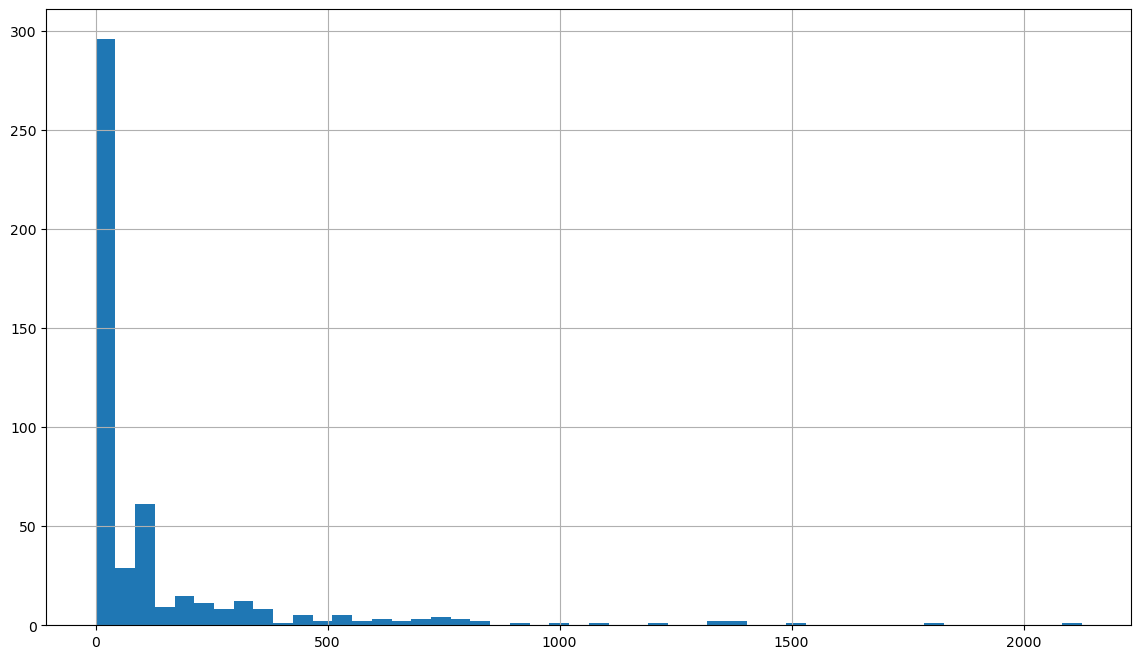

In [17]:
anomalies.Amount.hist(bins=50)

If we look at the normal data, it’s even more skewed right than the anomalies. Most of the transactions are below `$100`, and some of the amounts can get very high to values like `$25,000`.

In [19]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

<AxesSubplot:>

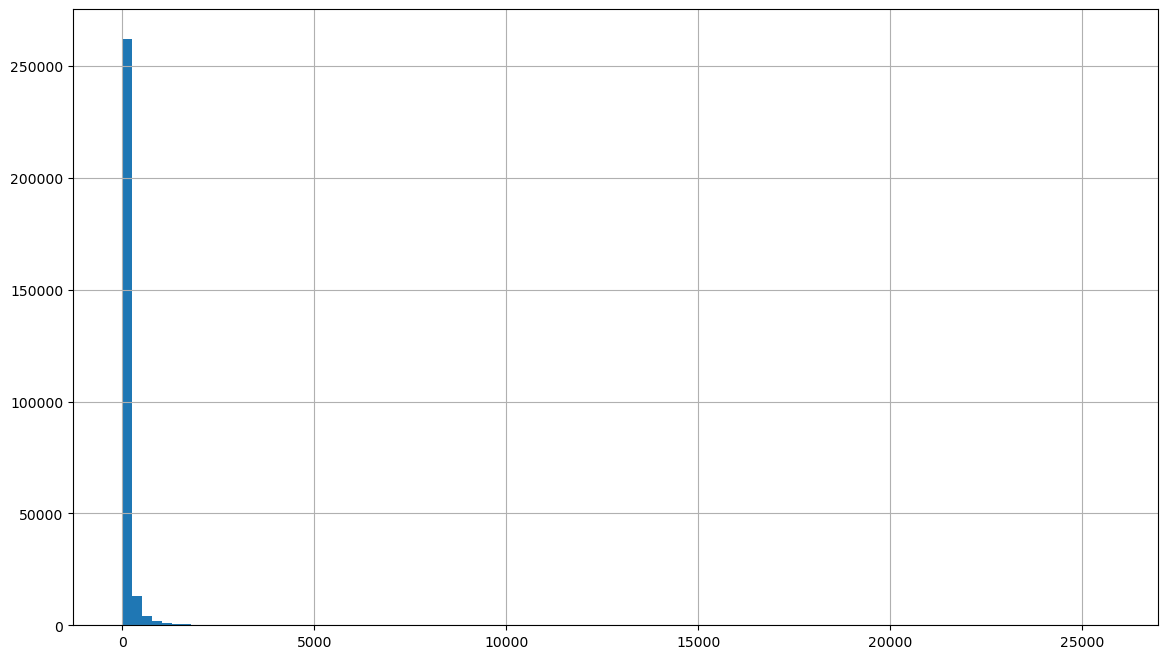

In [21]:
normal.Amount.hist(bins=100)

[Return to Contents of credit card dataset analysis](#1cca)

<a id='5cca'></a>
## 5. Plotting

Let’s now turn to a graphical approach to help visually illustrate this better.
First, you define some functions to help plot the various columns of the data to make it much easier to visualize the various relationships:

In [23]:
def plot_histogram(df, bins, column, log_scale=False):
    bins = 100
    anomalies = df[df.Class == 1]
    normal = df[df.Class == 0]
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    fig.suptitle(f'Counts of {column} by Class')
    ax1.hist(anomalies[column], bins = bins, color="red")
    ax1.set_title('Anomaly')
    ax2.hist(normal[column], bins = bins, color="orange")
    ax2.set_title('Normal')
    plt.xlabel(f'{column}')
    plt.ylabel('Count')
    if log_scale:
        plt.yscale('log')
        plt.xlim((np.min(df[column]), np.max(df[column])))
        plt.show()

In [24]:
def plot_scatter(df, x_col, y_col, sharey = False):
    anomalies = df[df.Class == 1]
    normal = df[df.Class == 0]
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True,
                                   sharey=sharey)
    fig.suptitle(f'{y_col} over {x_col} by Class')
    ax1.scatter(anomalies[x_col], anomalies[y_col], color='red')
    ax1.set_title('Anomaly')
    ax2.scatter(normal[x_col], normal[y_col], color='orange')
    ax2.set_title('Normal')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

Now, let’s start by plotting values for Amount by Class for the entire data frame:

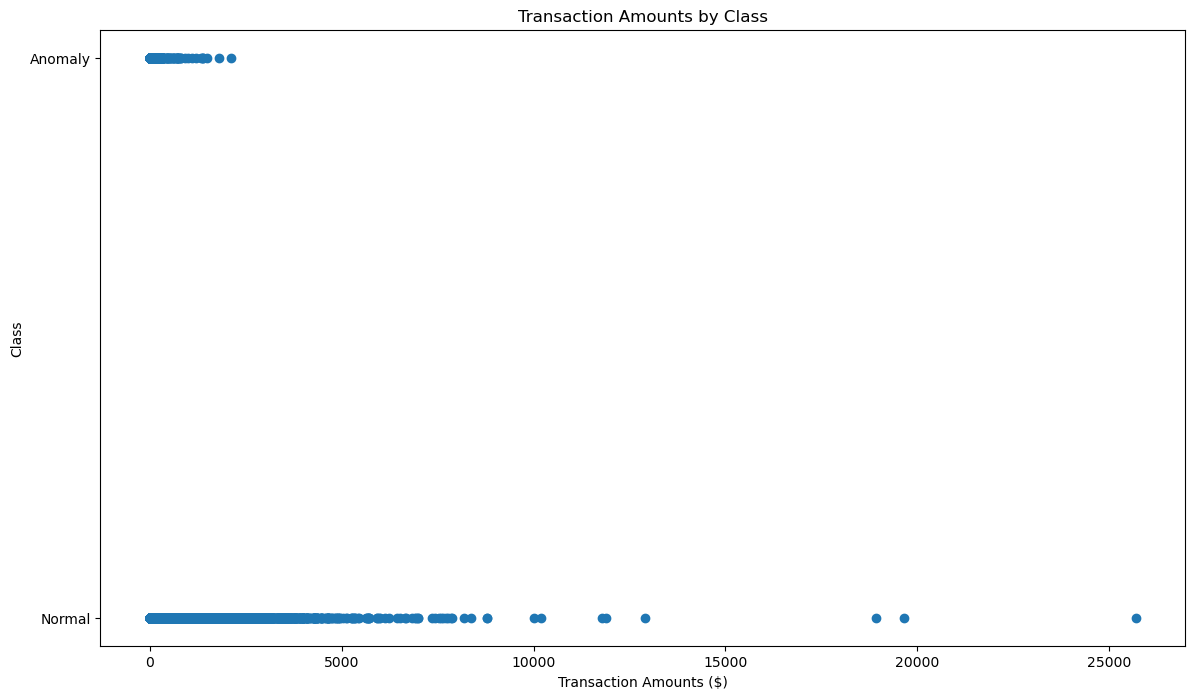

In [25]:
plt.scatter(cc.Amount, cc.Class)
plt.title("Transaction Amounts by Class")
plt.ylabel("Class")
plt.yticks(range(2), ["Normal", "Anomaly"])
plt.xlabel("Transaction Amounts ($)")
plt.show()

[Return to Contents of credit card dataset analysis](#1cca)

It seems like there are some massive outliers in the normal data set, as suspected. However, the graph isn’t very informative in telling you about value counts, so let’s use the plotting functions defined earlier to draw graphs that provide more context:

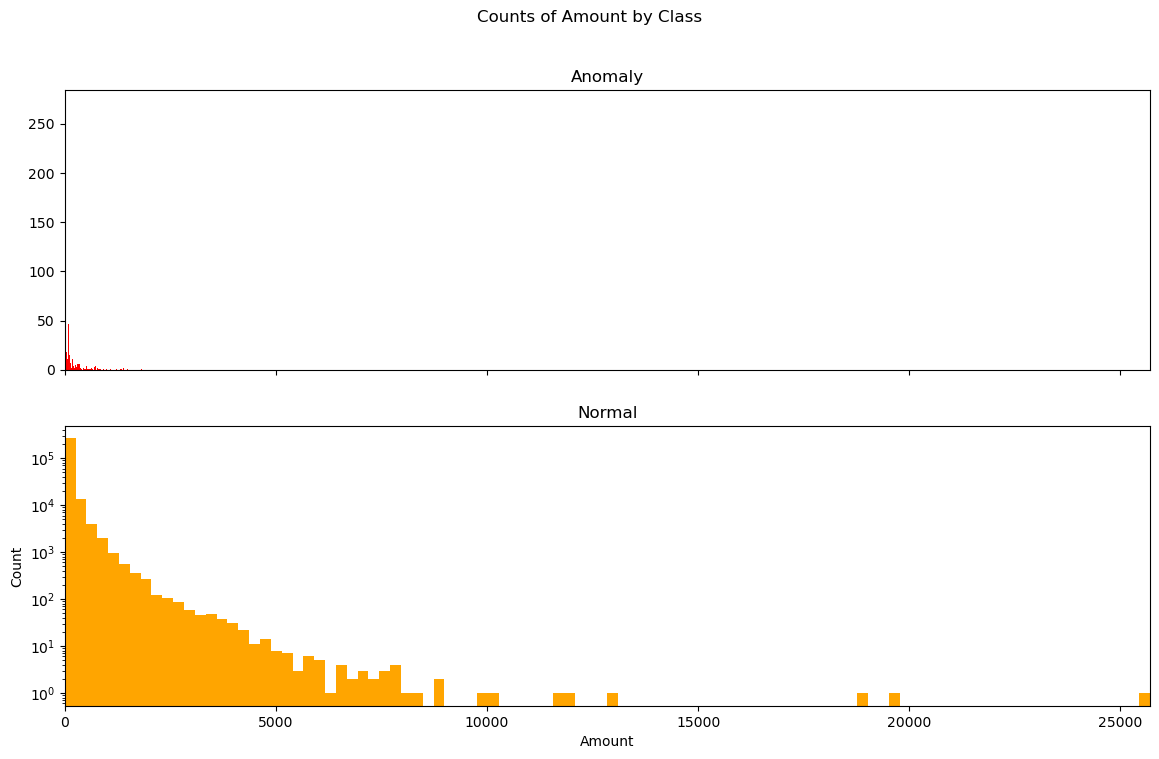

In [26]:
bins = 100
plot_histogram(cc, bins, "Amount", log_scale=True)

A histogram of counts for data values organized into intervals in the column Amount in the data frame. The number of
bins is 100, meaning the interval of each bar in the histogram is the range of the data in the column Amount divided by the number of bins

From this, you can definitely notice a right skew as well as the massive outliers present in the normal data. Since you can’t really see much of the anomalies, let’s create another plot:

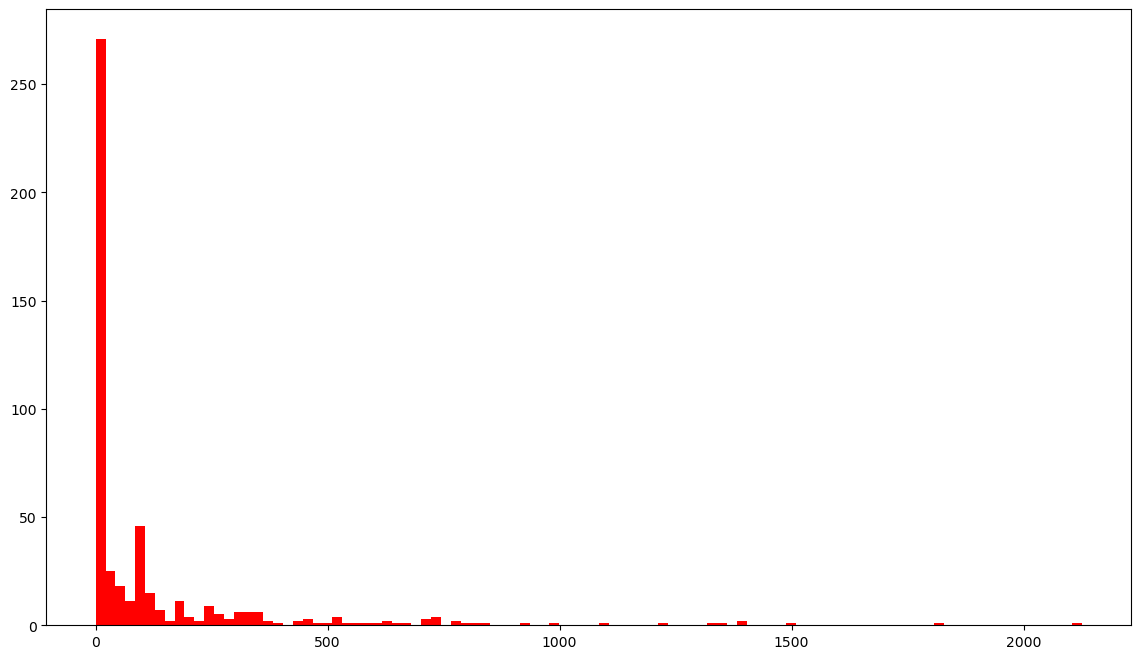

In [27]:
plt.hist(anomalies.Amount, bins = bins, color="red")
plt.show()

The anomalies seem to be right skewed as well, but much more heavily so. This means that the majority of anomalous transactions actually have quite low transaction amounts.

so what about time? Let’s plot another basic scatterplot:

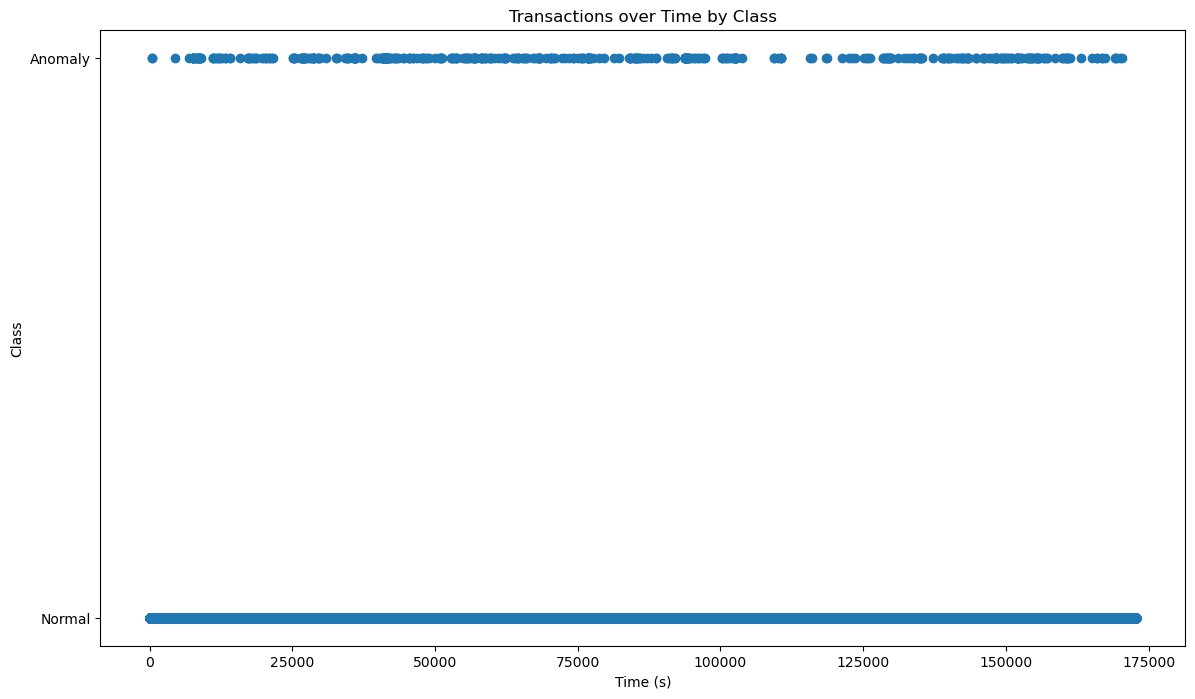

In [28]:
plt.scatter(cc.Time, cc.Class)
plt.title("Transactions over Time by Class")
plt.ylabel("Class")
plt.yticks(range(2), ["Normal", "Anomaly"])
plt.xlabel("Time (s)")
plt.show()

This graph isn’t very informative, but it does tell you that fraudulent transactions are pretty spread out over the entire timeline. Once again, let’s use the plotter functions to get an idea of the counts:

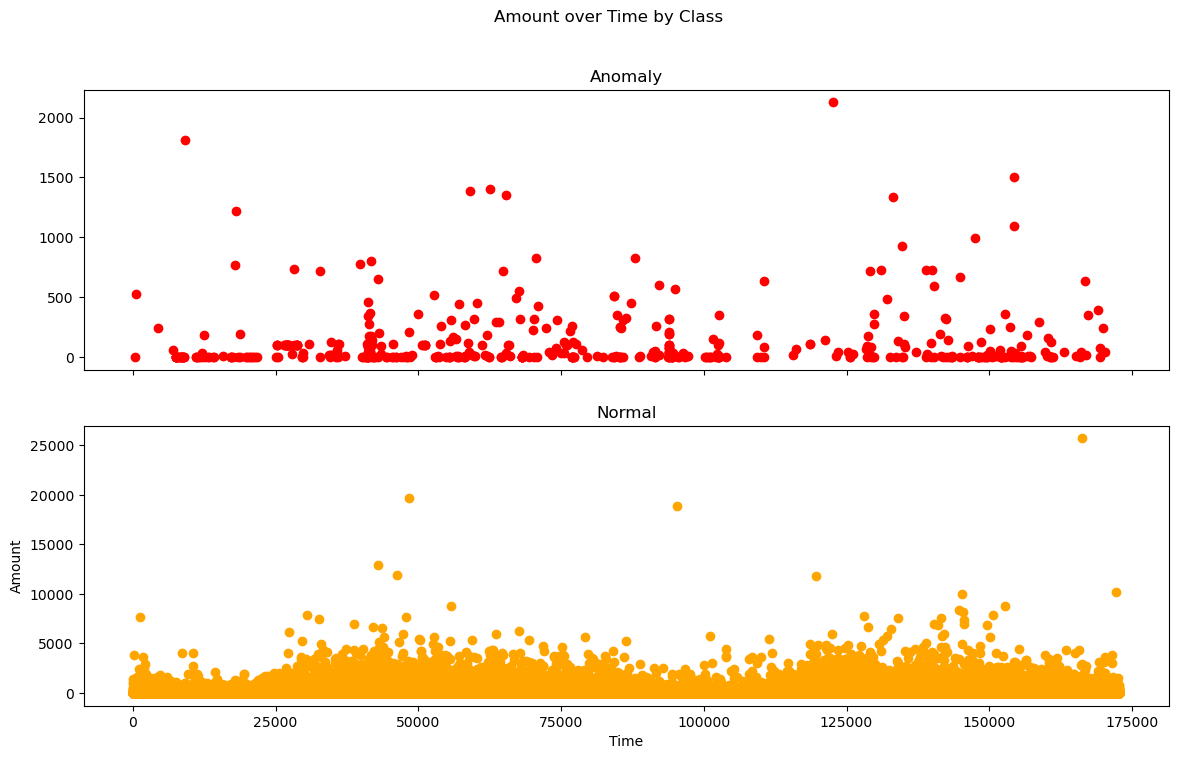

In [29]:
plot_scatter(cc, "Time", "Amount")

[Return to Contents of credit card dataset analysis](#1cca)

You have a better context now, but it doesn’t seem to tell you much. You can see that fraudulent transactions occur throughout the entire timeline and that there is no specific period of time when it seems like higher-value transactions occur. 

There do seem to be two main clusters, but this could also be a result of the lack of data points compared to the
normal points.

Let’s now look at the histogram to take into account frequencies:

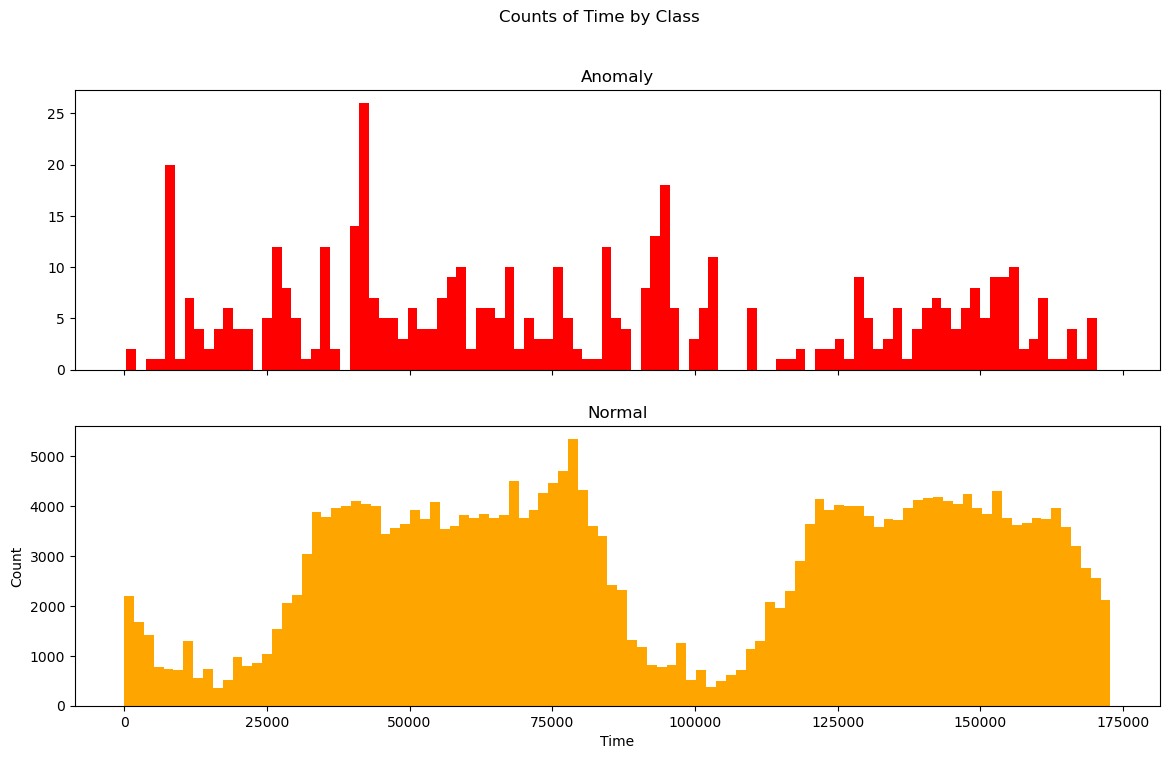

In [31]:
plot_histogram(cc, bins, "Time")

From this, you get a really good context of the amount of fraudulent/anomalous transactions going on over time. 

For the normal data, it seems that they occur in waves. For the anomalies, there doesn’t seem to be a particular peak time; they just occur throughout the entire timespan.

It does appear that that they have defined spikes near the start of the first transaction, and that some of the spikes do occur where normal transactions are in the “trough” of the wave pattern shown. However, a good portion of the fraudulent transactions still occur where normal transactions are at a maximum.

Parece que tienen picos definidos cerca del comienzo de la primera transacción, y que algunos de los picos ocurren donde las transacciones normales están en el "valle" del patrón de onda que se muestra. Sin embargo, una buena parte de las transacciones fraudulentas todavía ocurren donde las transacciones normales son máximas.

So what does the data for the other columns look like? Let’s look at some interesting plots for V1:

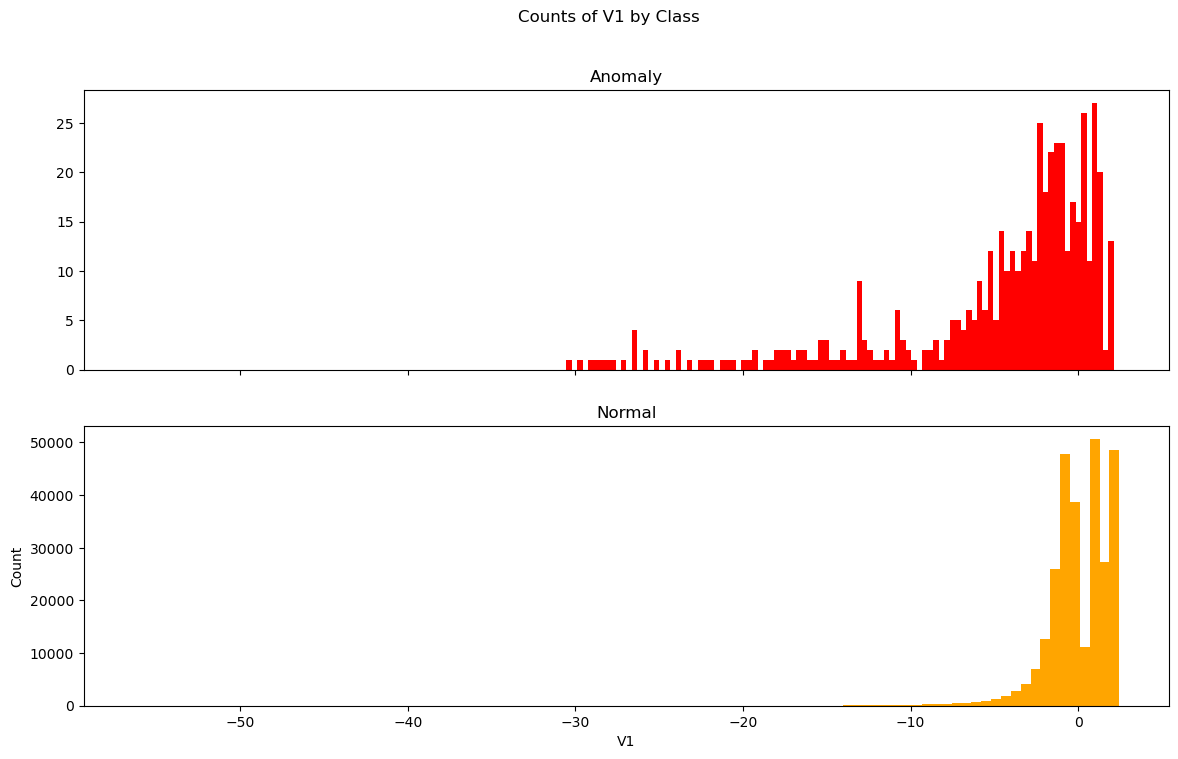

In [32]:
plot_histogram(cc, bins, "V1")

Here, you can see a clear difference in the distribution of points for each class over the same V1 values. The range of values that the fraudulent transactions encompass extend well into the values for V1. 

Let’s keep exploring, looking at how the values for Amount relate to V1:

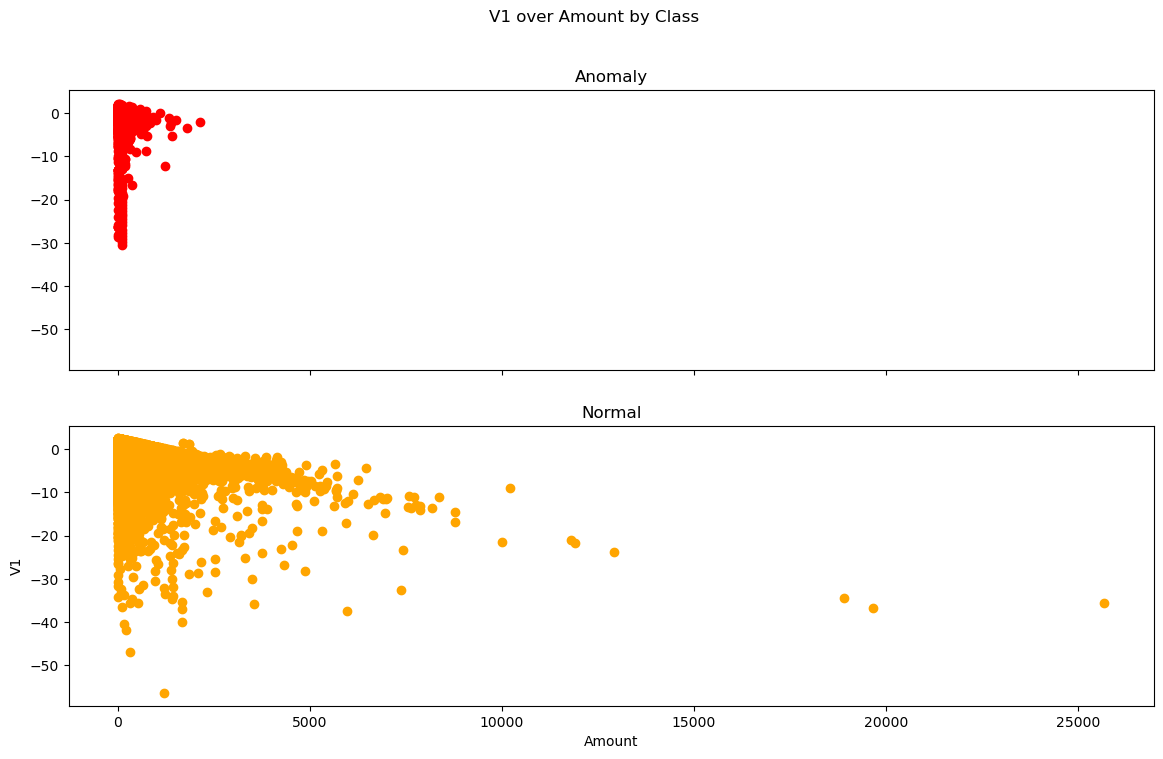

In [33]:
plot_scatter(cc, "Amount", "V1", sharey=True)

What the sharey parameter does is it forces both subplots to share the same y-axis, meaning the plots are displayed on the same scale. You are specifying this so it will be easier to tell what the distribution of the anomalous points looks like in comparison to the normal points.

[Return to Contents of credit card dataset analysis](#1cca)

From this graph, the fraudulent points don’t seem out of place compared to all of the other normal points.
Let’s continue and look at how time relates to the values for V1:

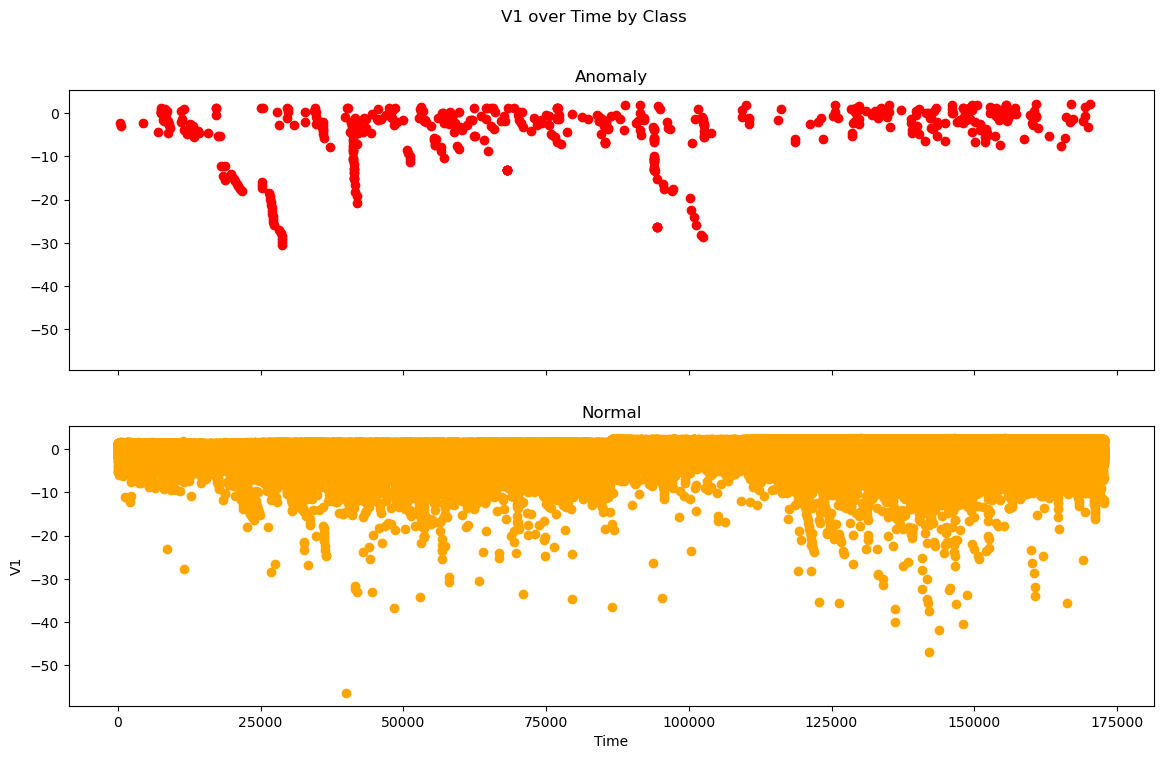

In [34]:
plot_scatter(cc, "Time", "V1", sharey=True)

Other than a few defined spikes that stand out from where the normal points would have been, most of the fraudulent data in this context seems to blend in with the normal data.

Doing this one at a time for all of the other values will be tedious, so let’s just plot them all at once using a simple script. 

Here is the code to plot all of the frequency counts for each column from V1 to V28

V1 Counts
V2 Counts
V3 Counts
V4 Counts
V5 Counts
V6 Counts
V7 Counts
V8 Counts
V9 Counts
V10 Counts
V11 Counts
V12 Counts
V13 Counts
V14 Counts
V15 Counts
V16 Counts
V17 Counts
V18 Counts
V19 Counts
V20 Counts
V21 Counts


C:\Users\conza\Anaconda3\envs\TFKERAS\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


V22 Counts
V23 Counts
V24 Counts
V25 Counts
V26 Counts
V27 Counts
V28 Counts


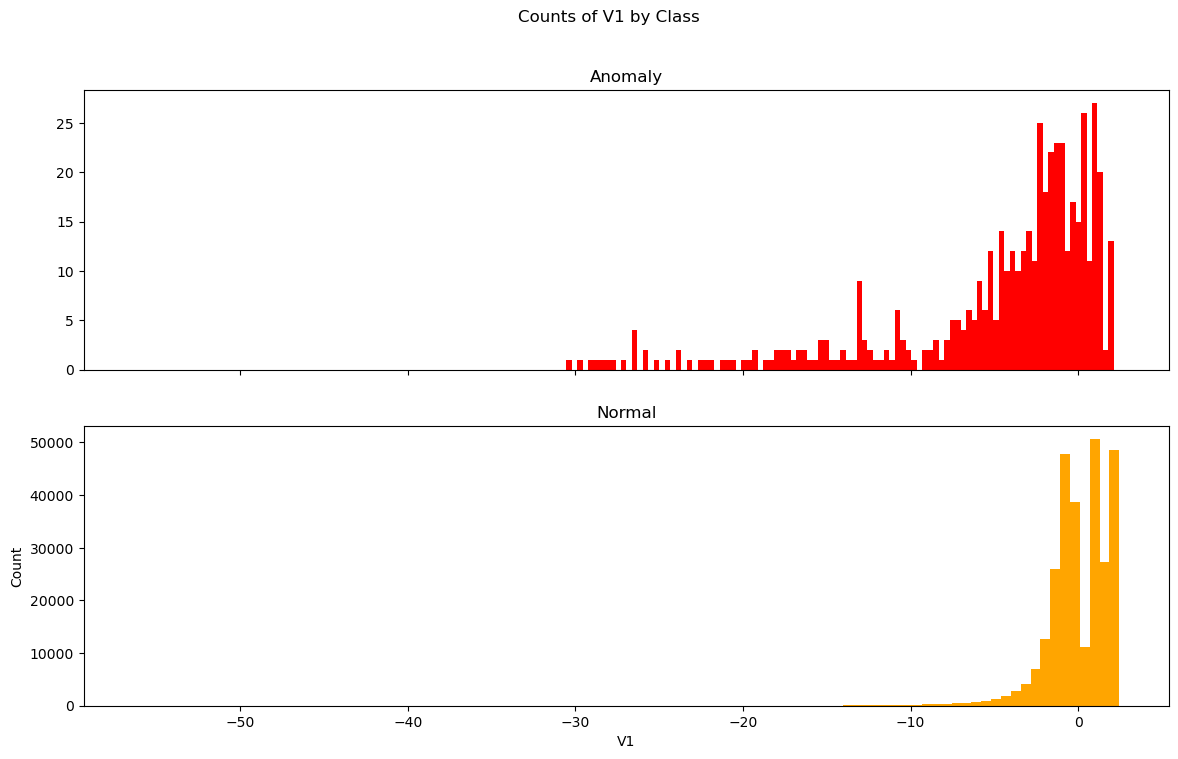

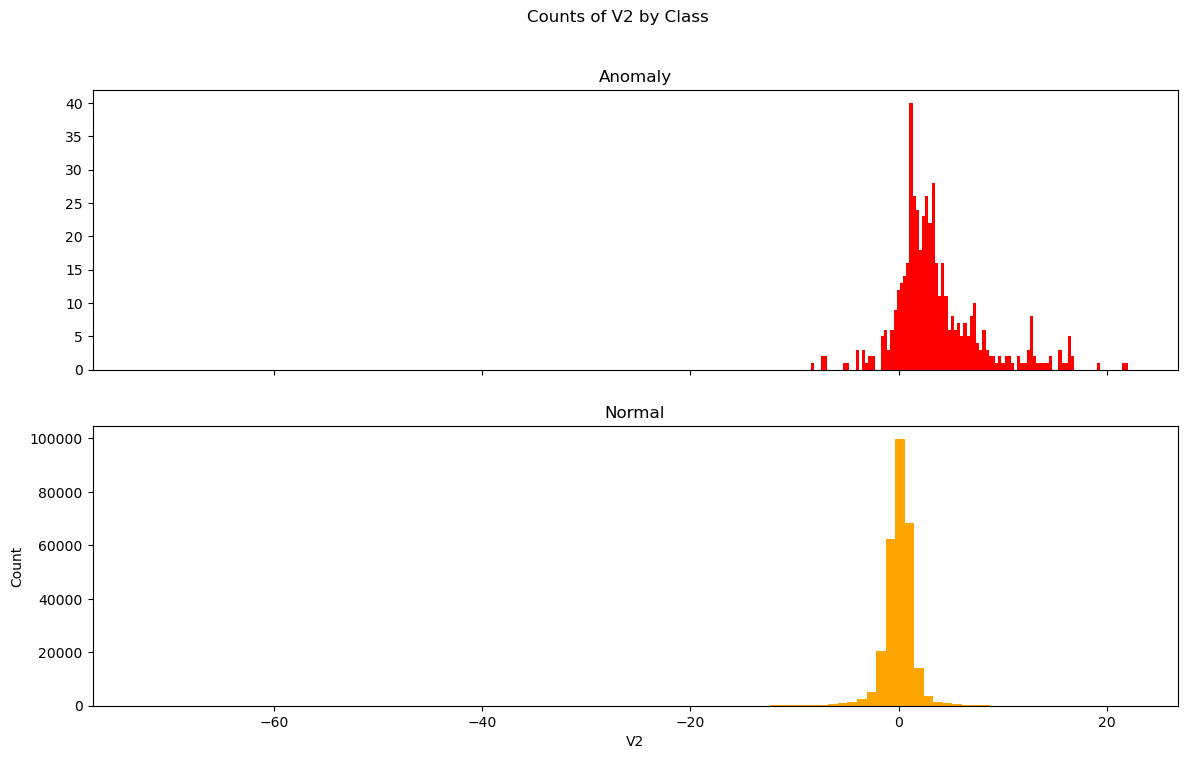

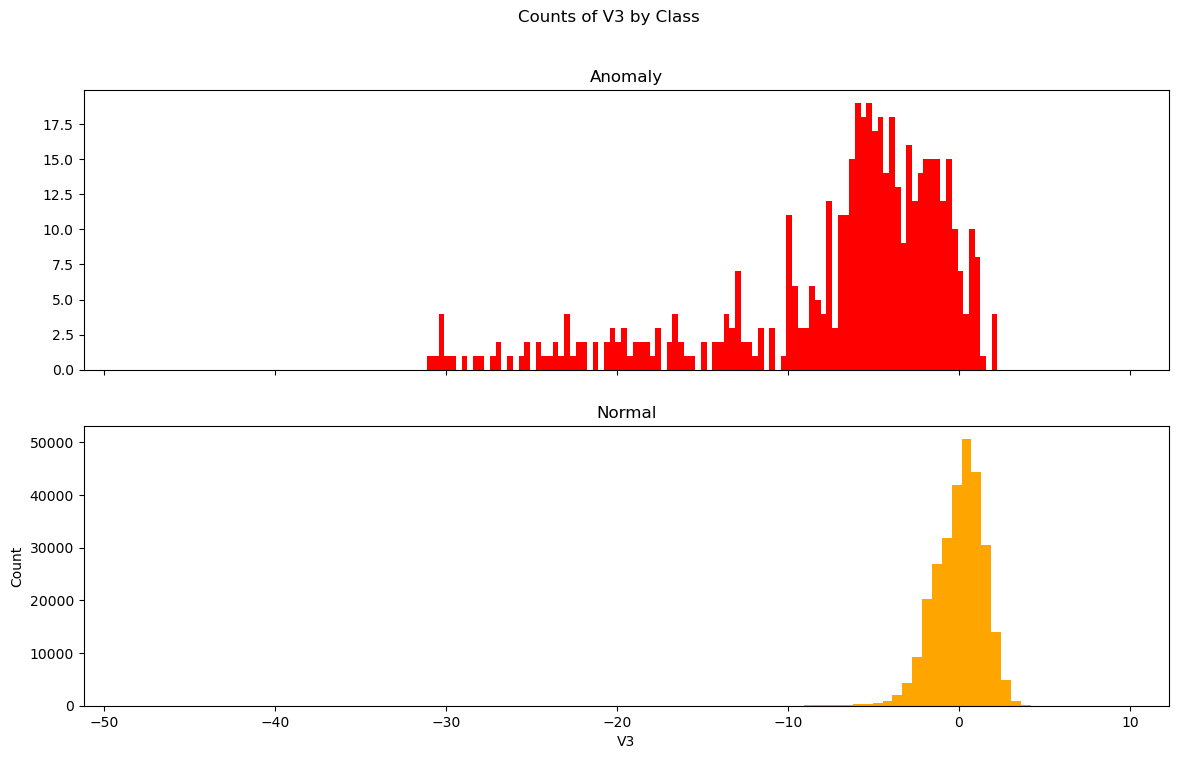

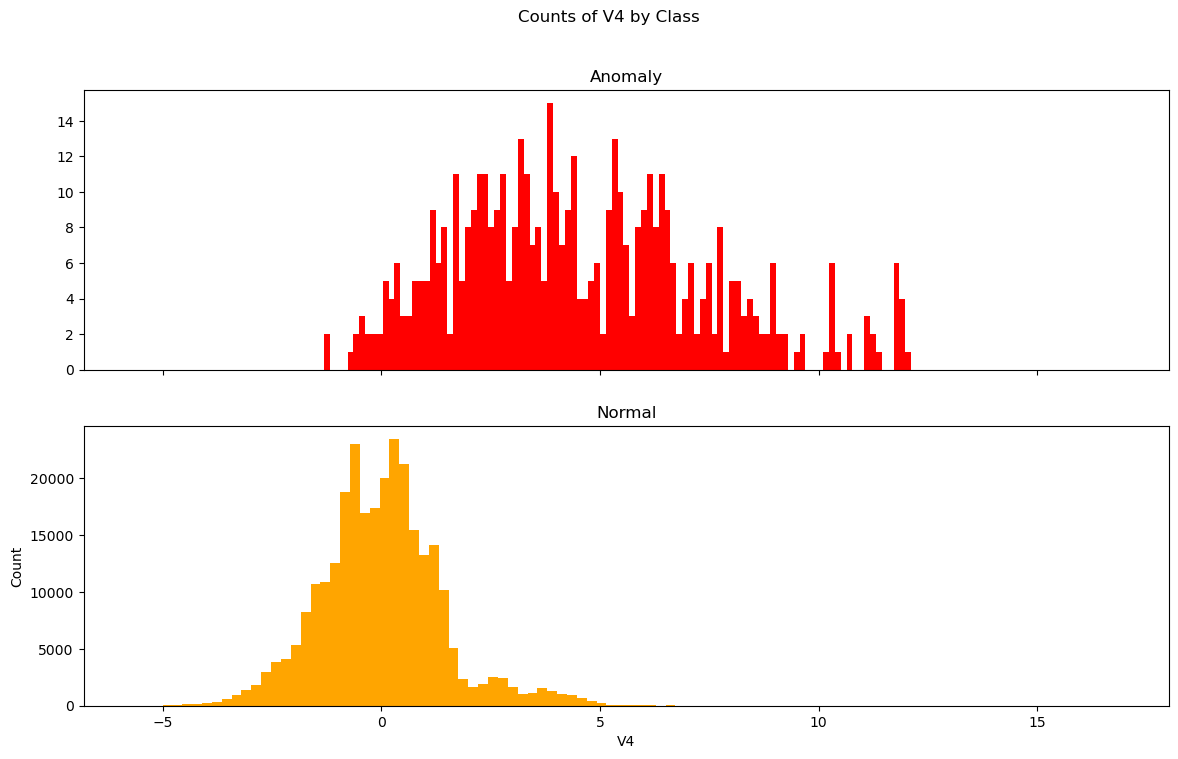

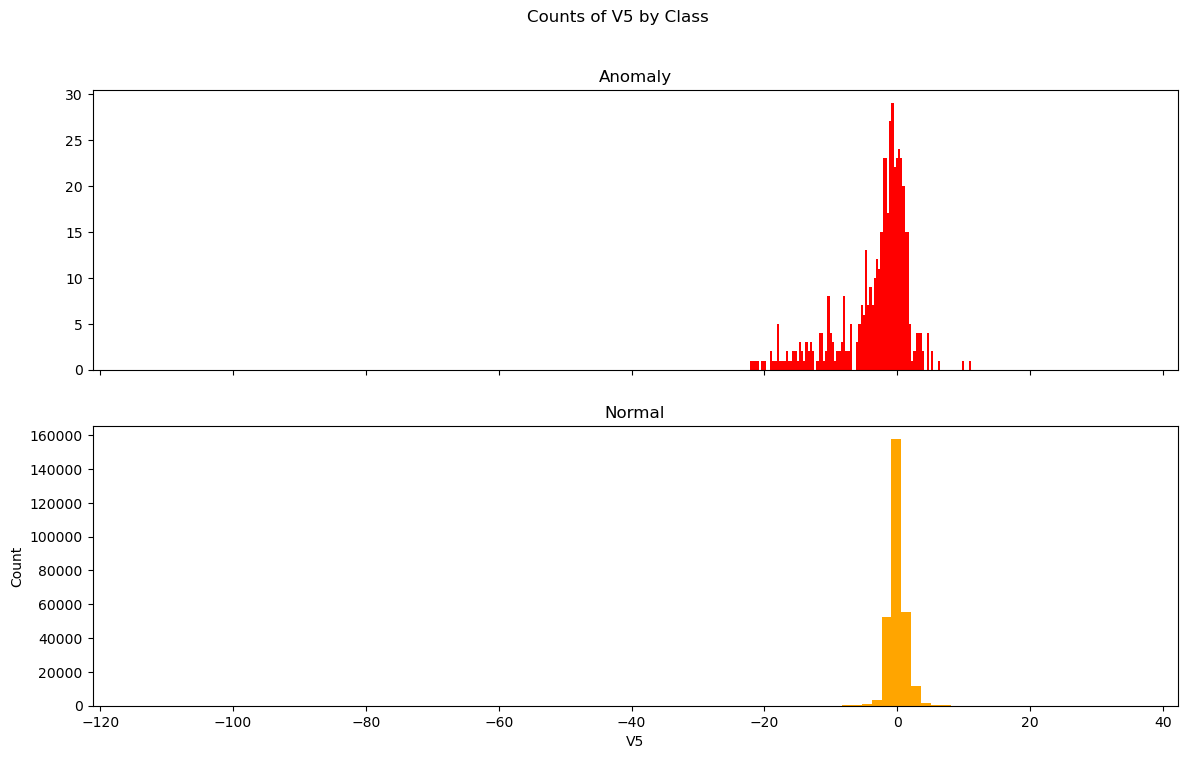

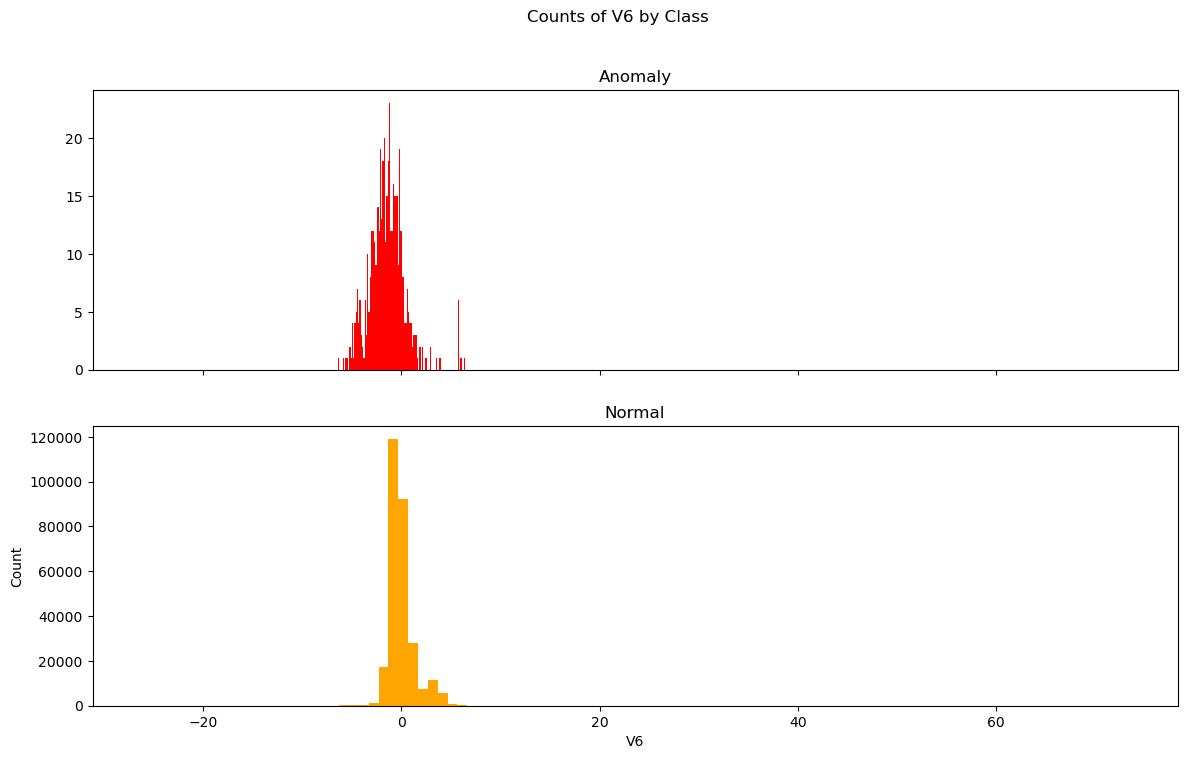

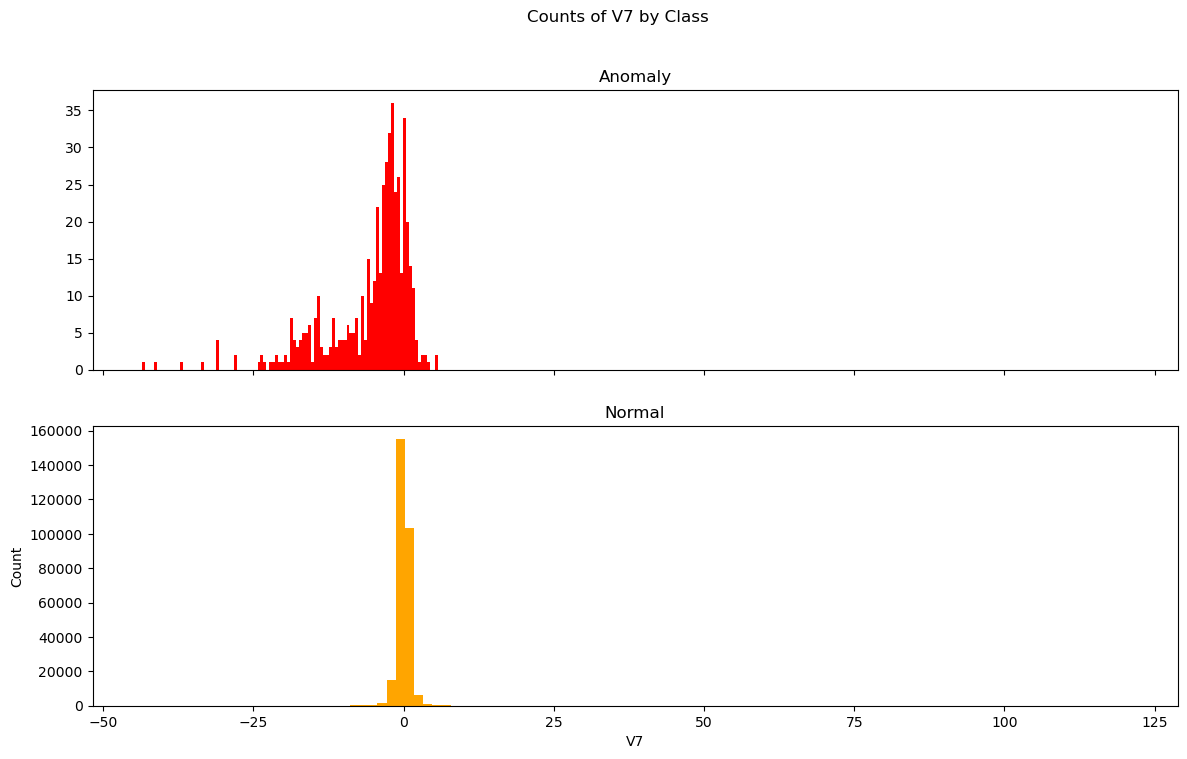

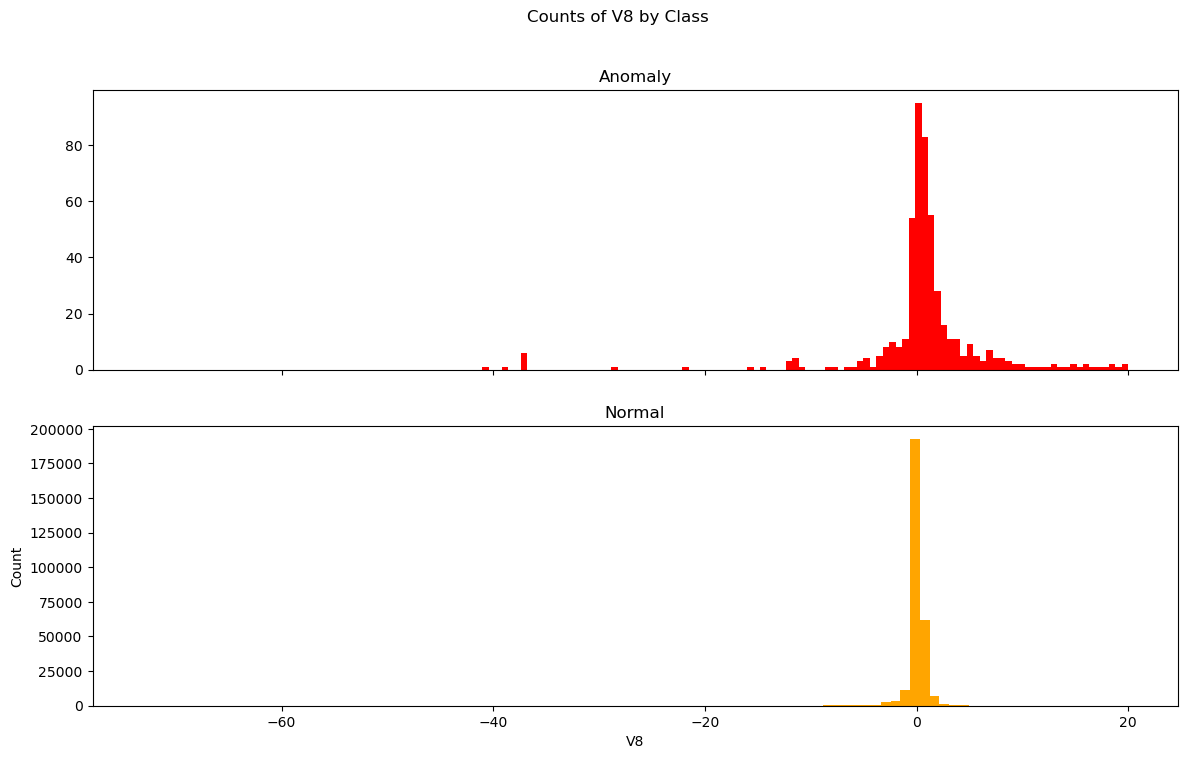

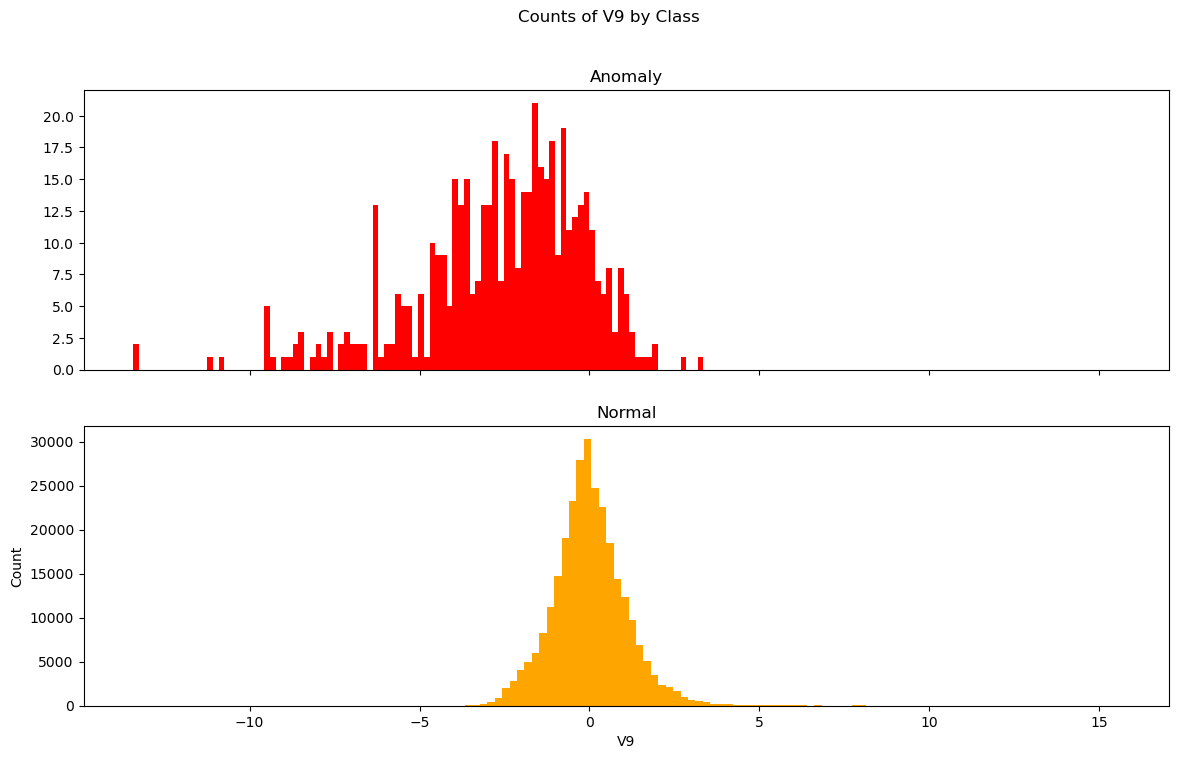

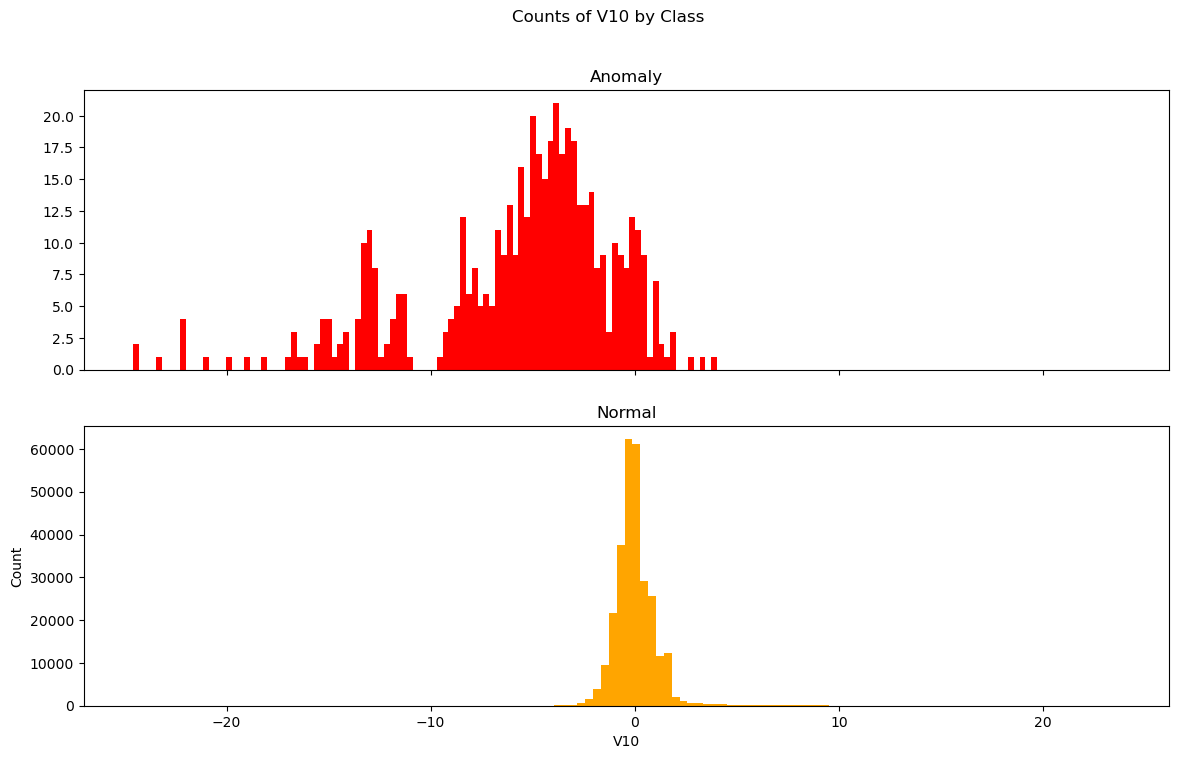

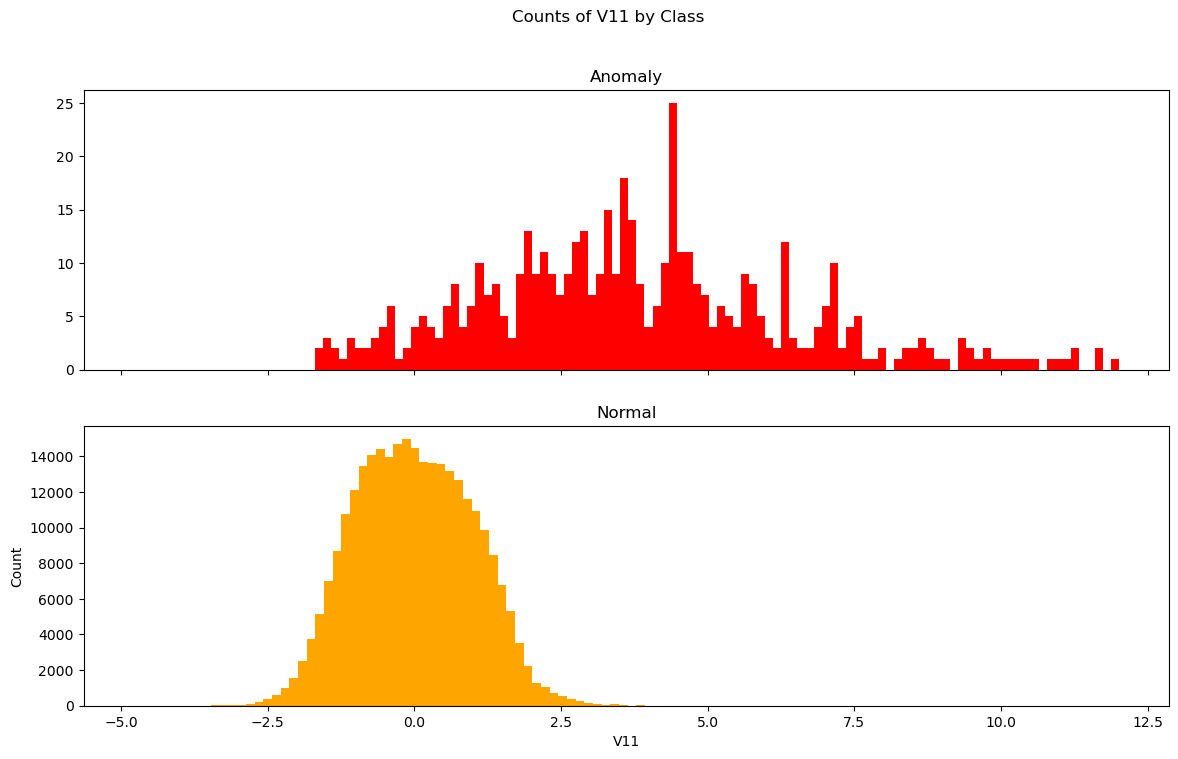

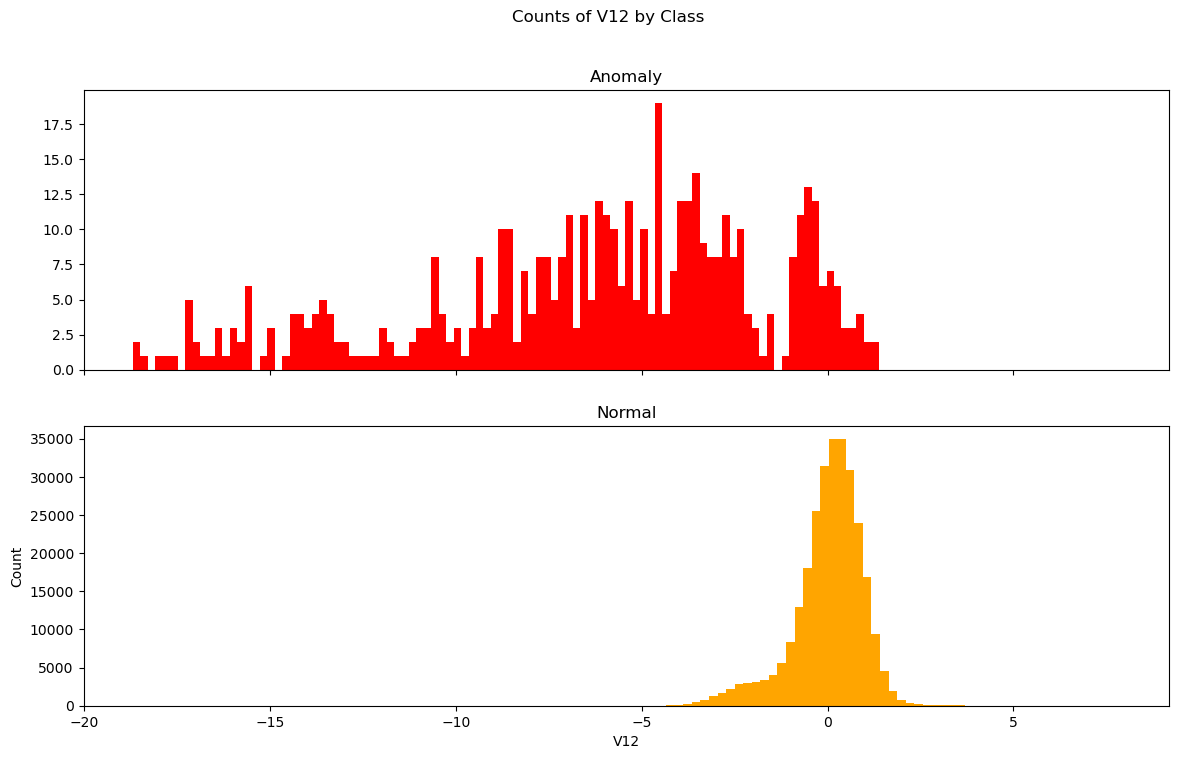

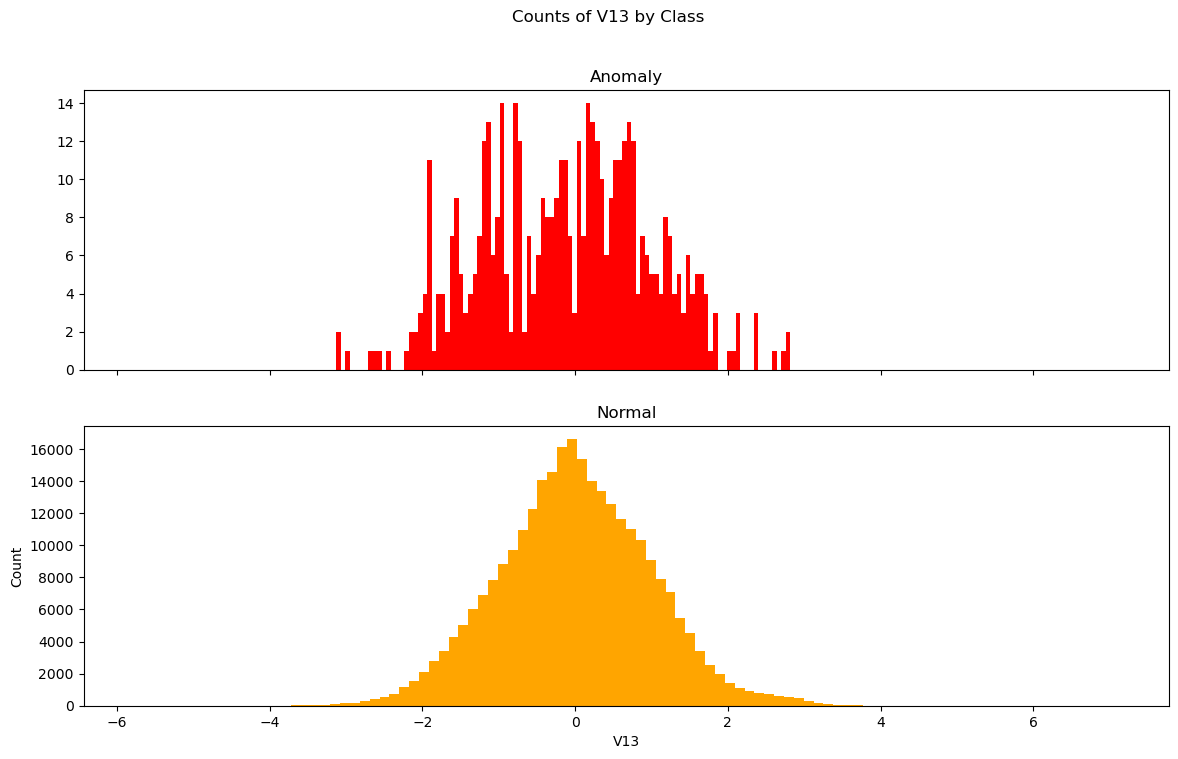

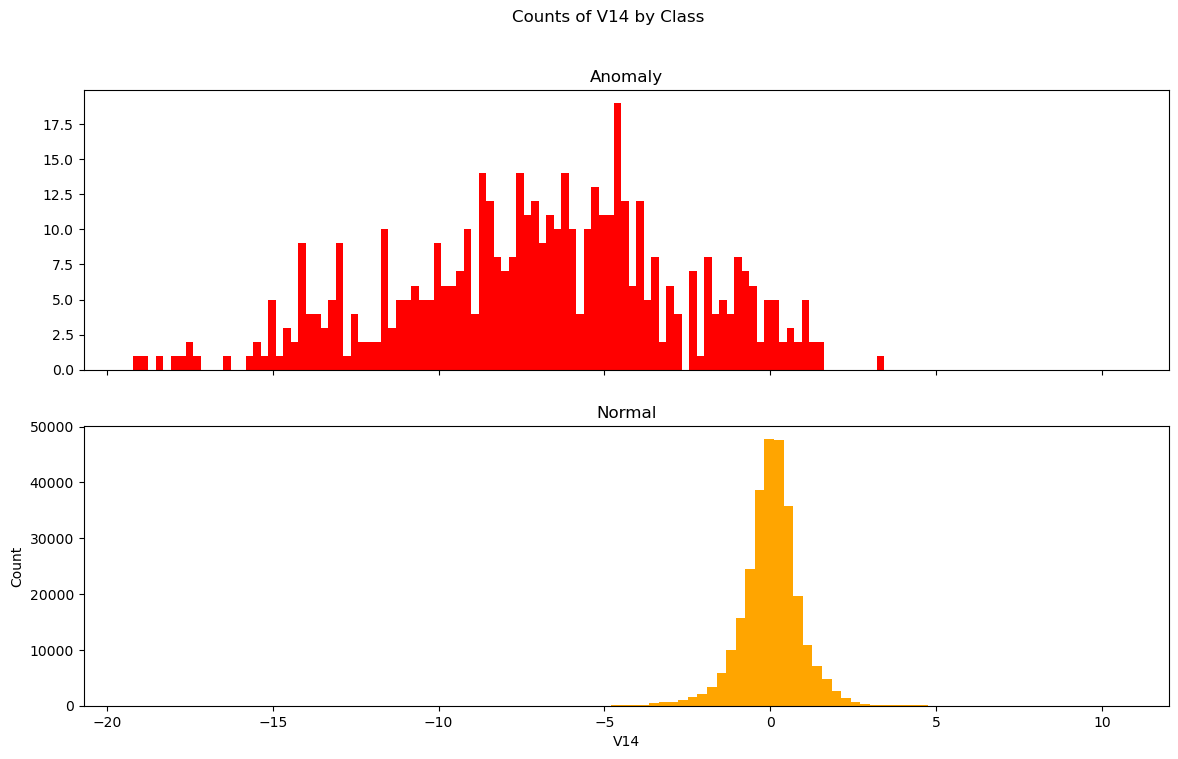

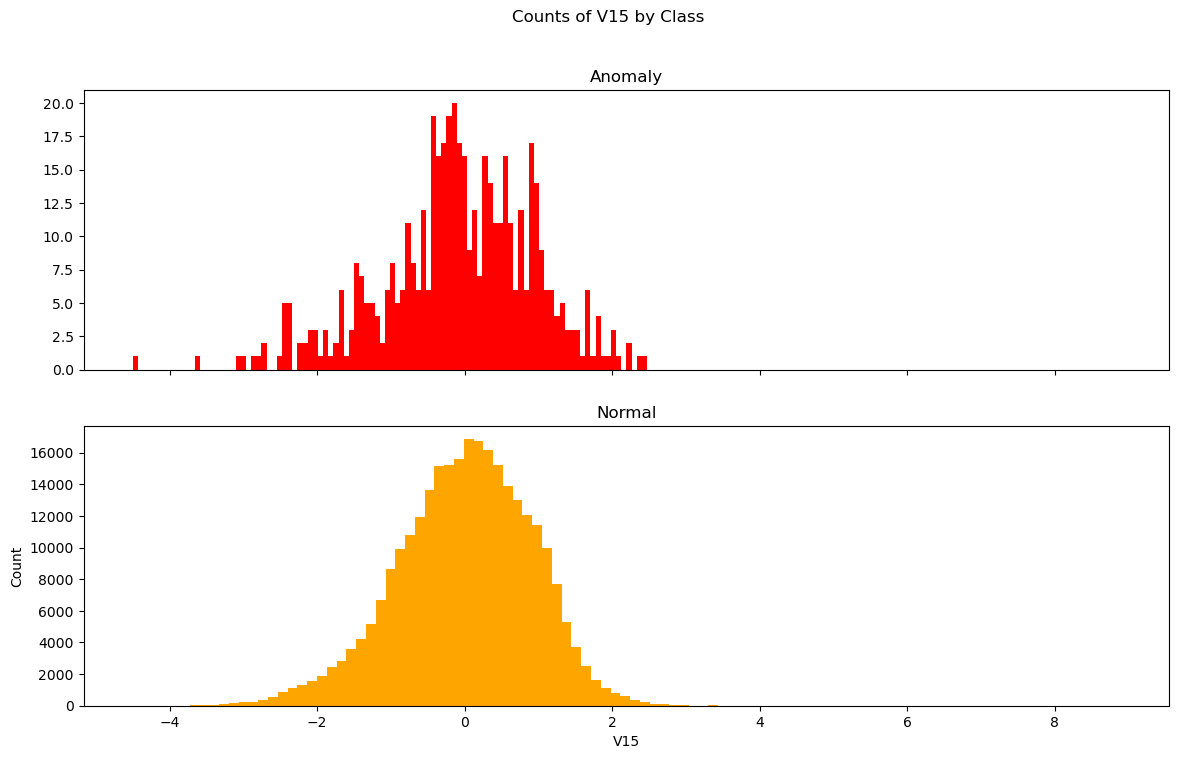

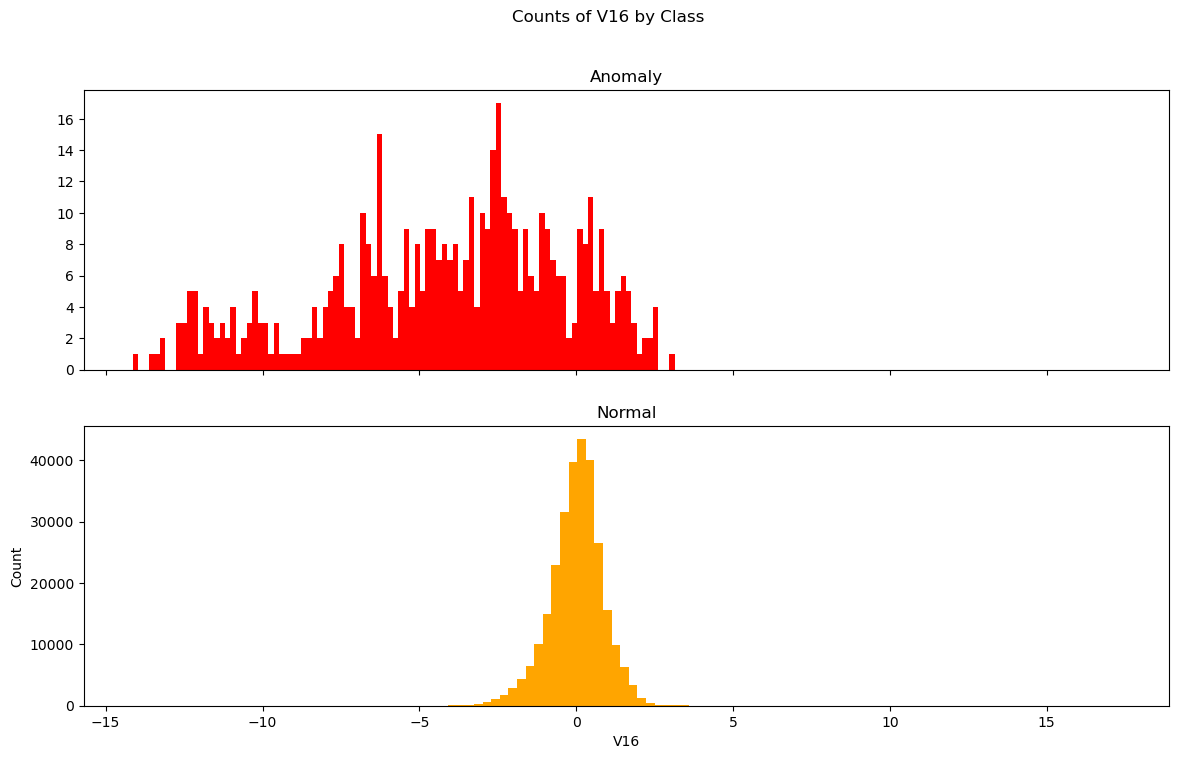

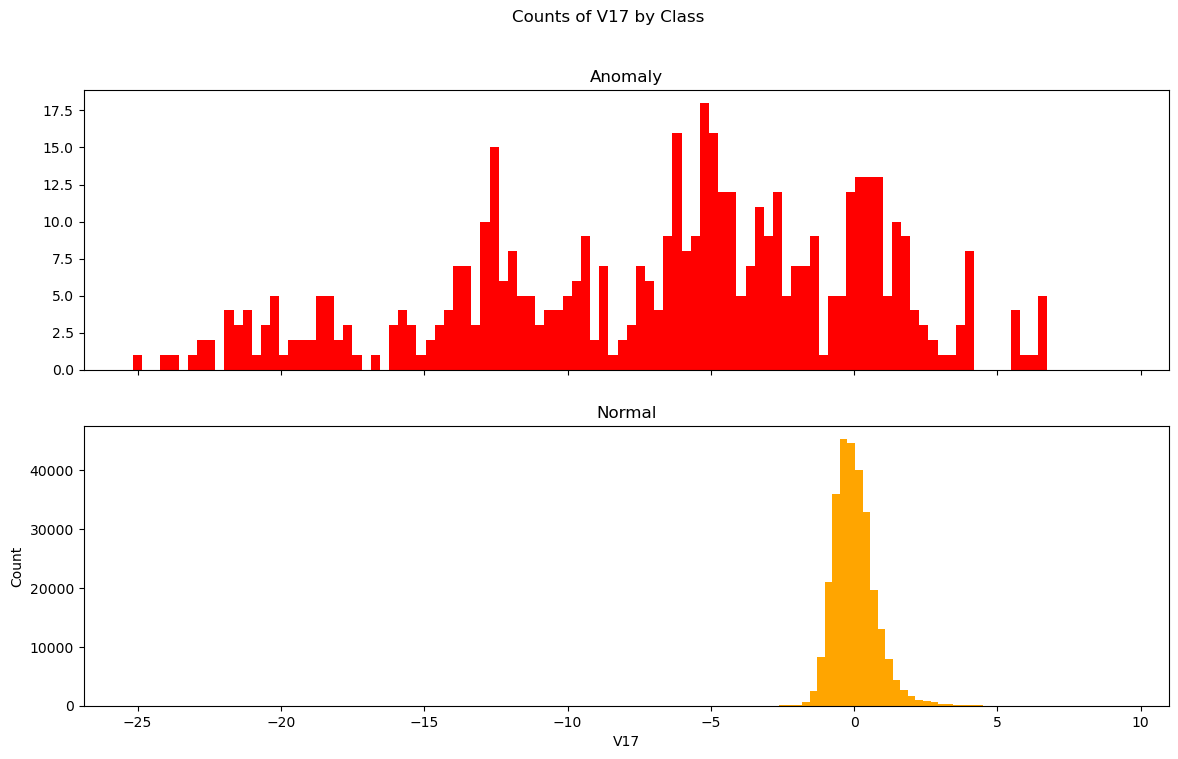

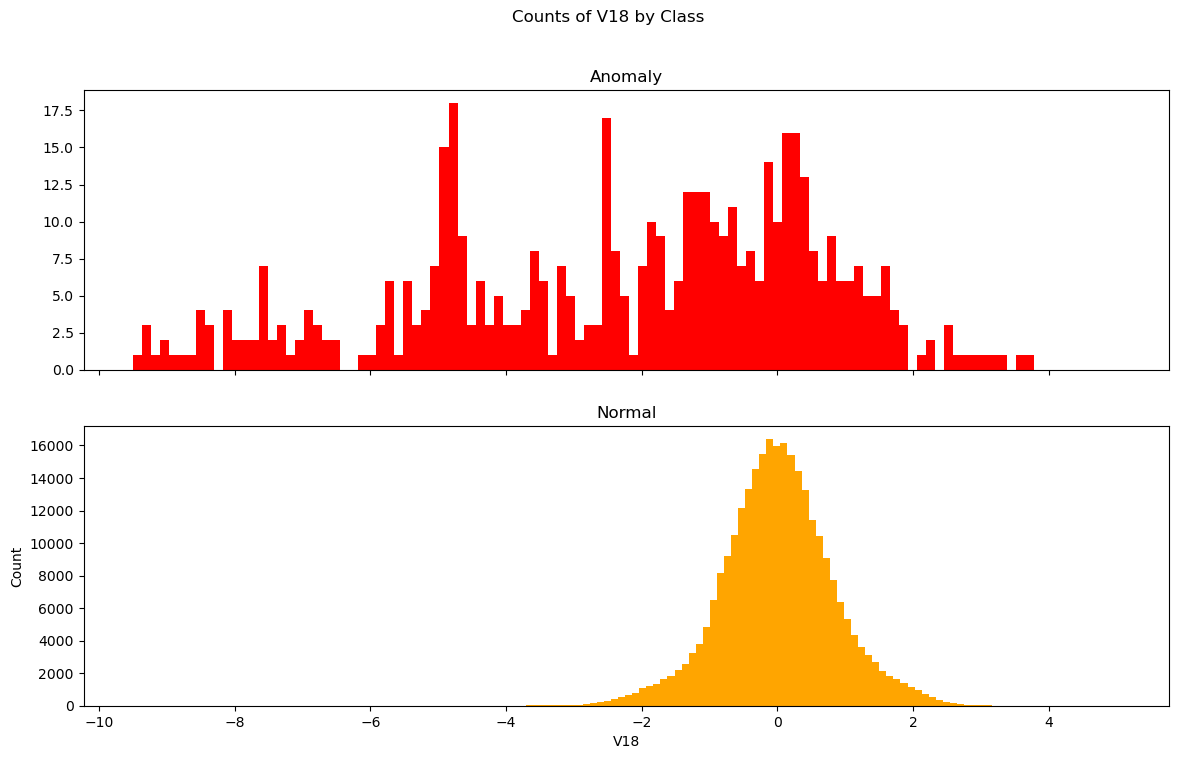

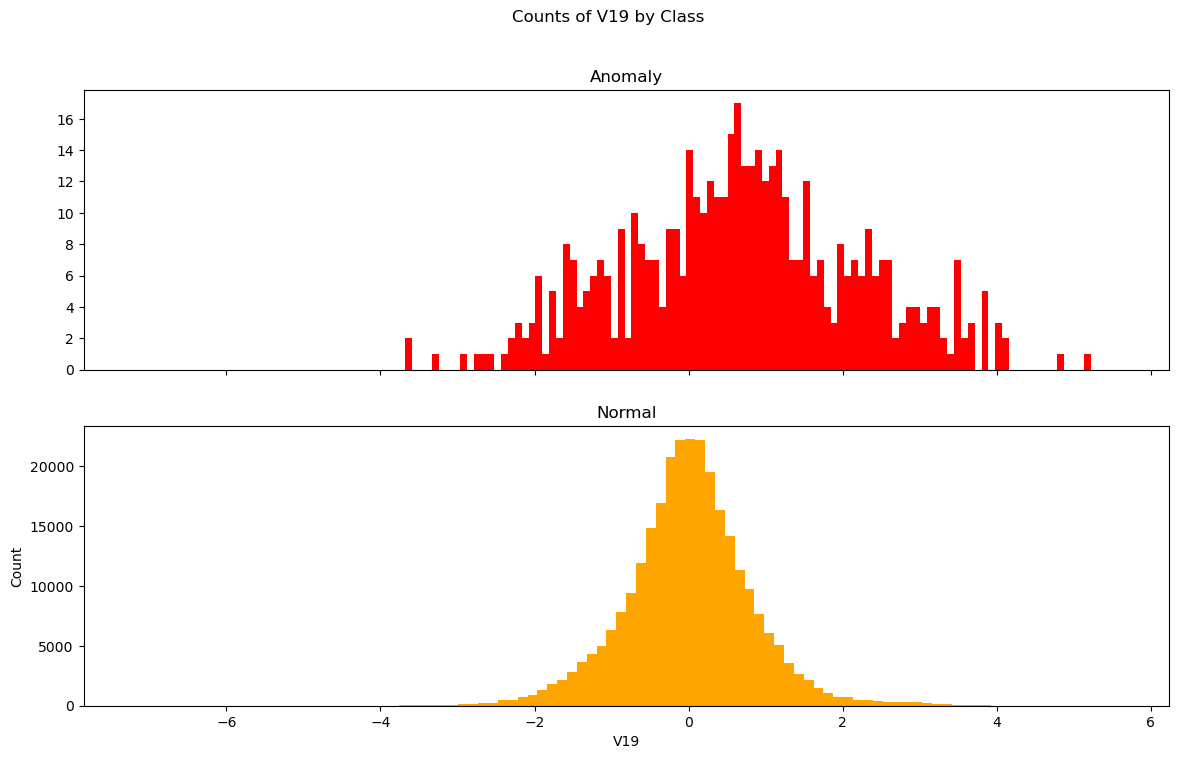

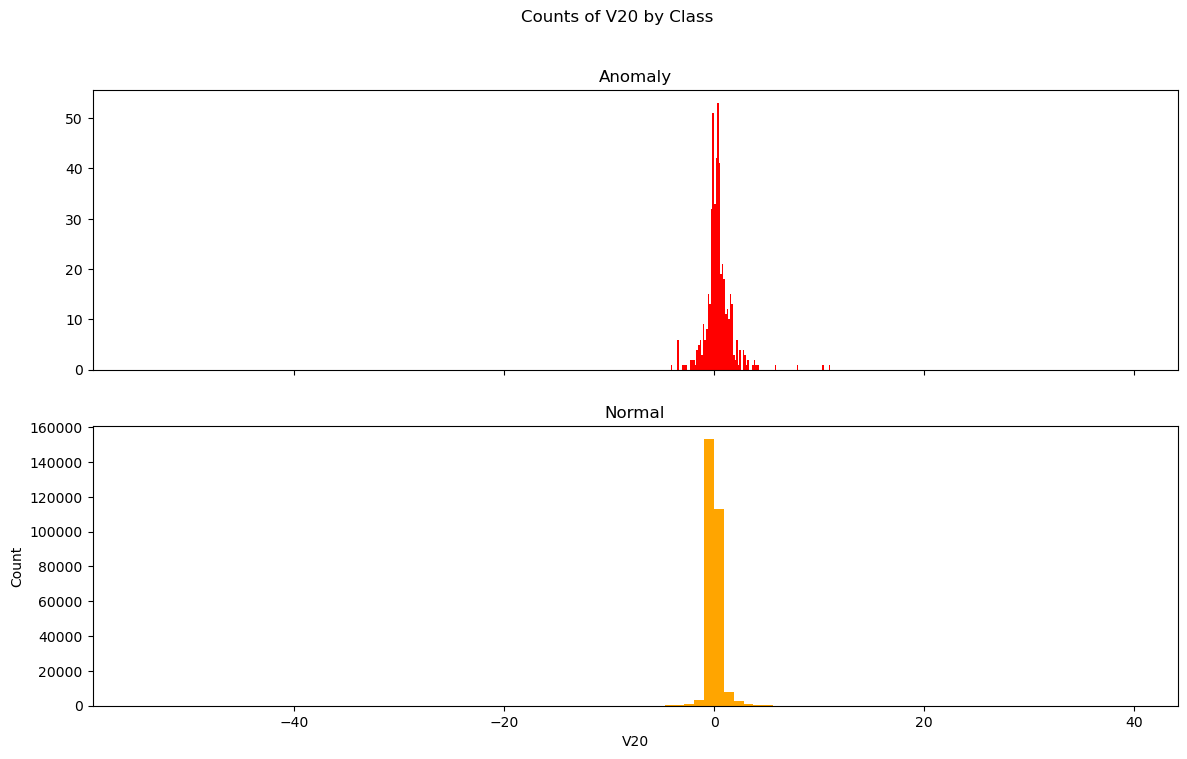

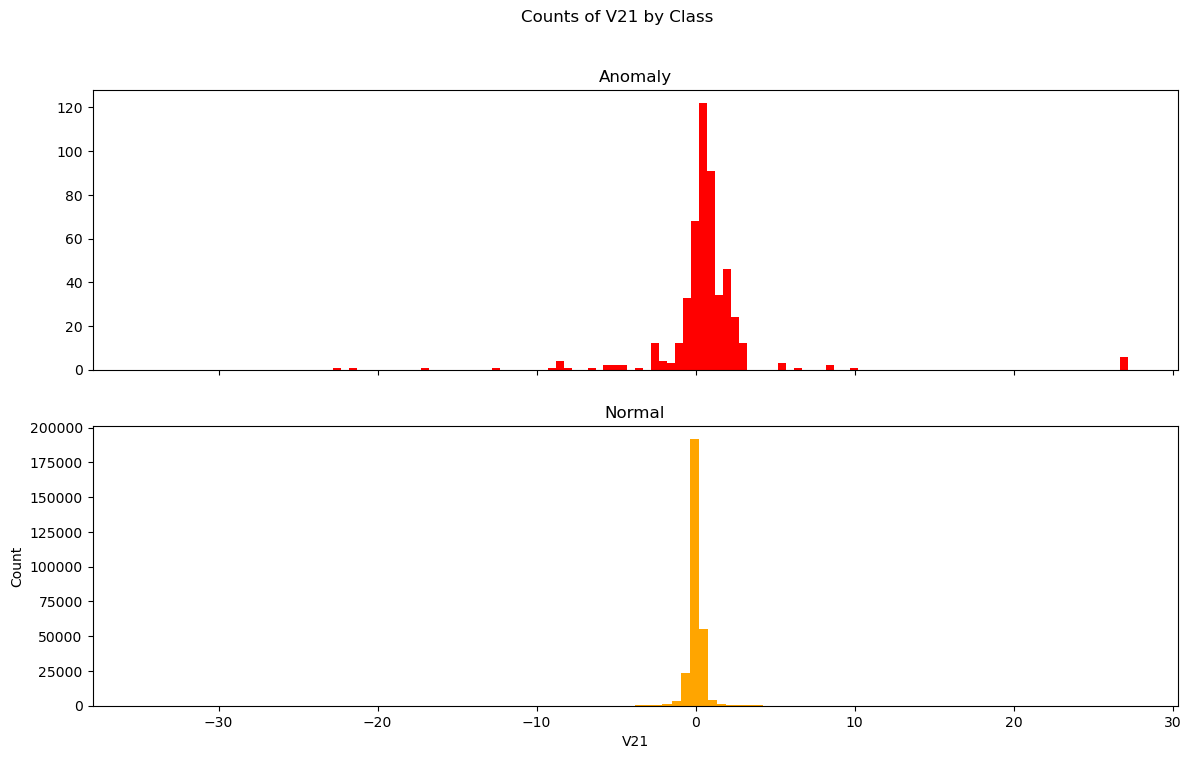

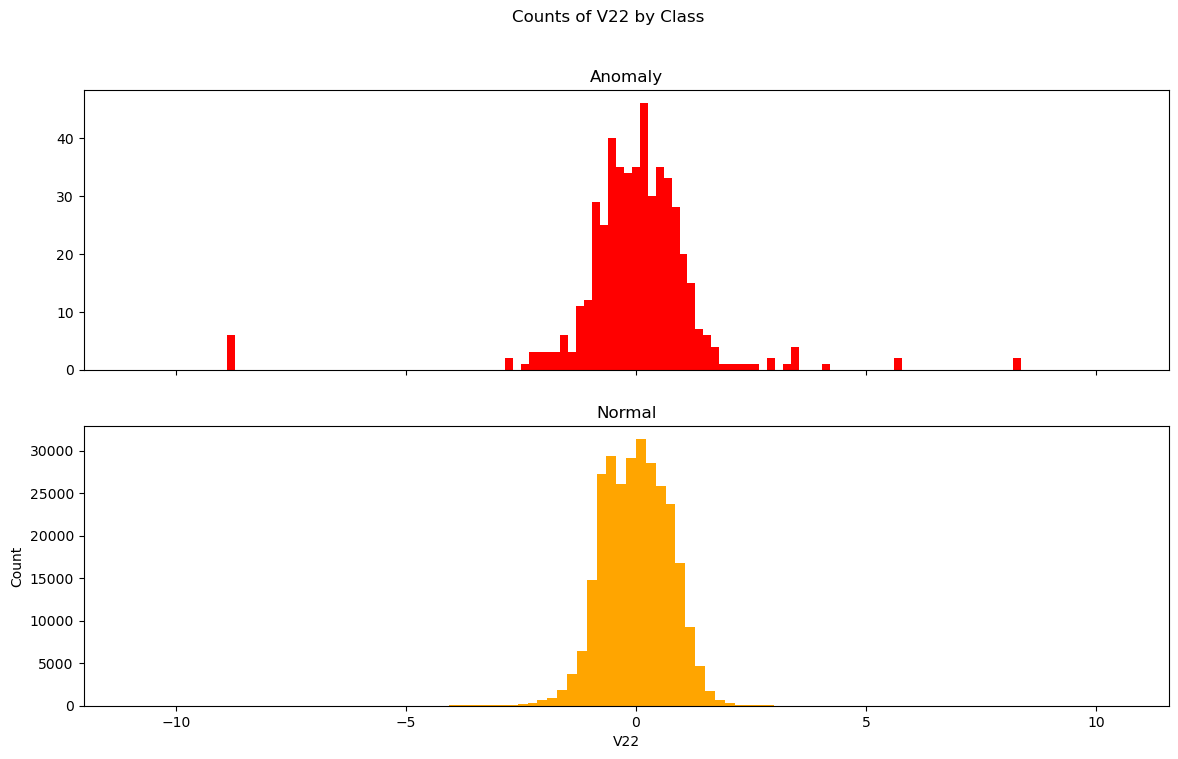

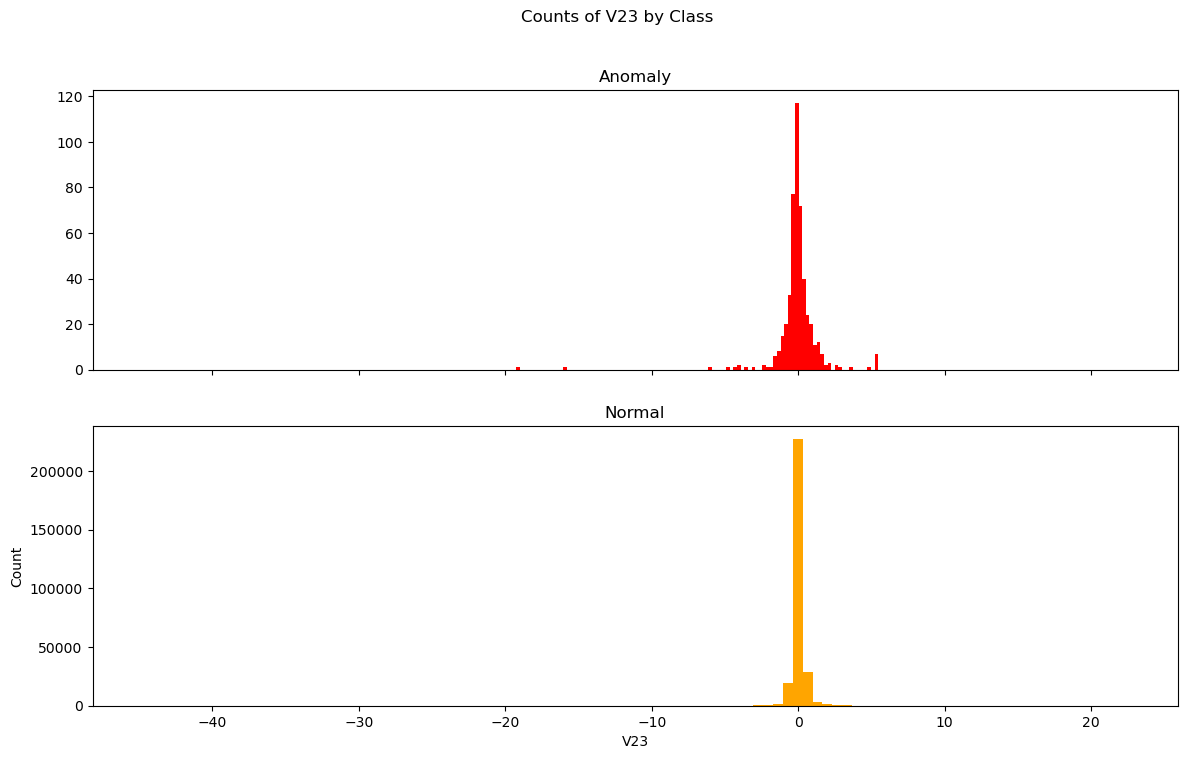

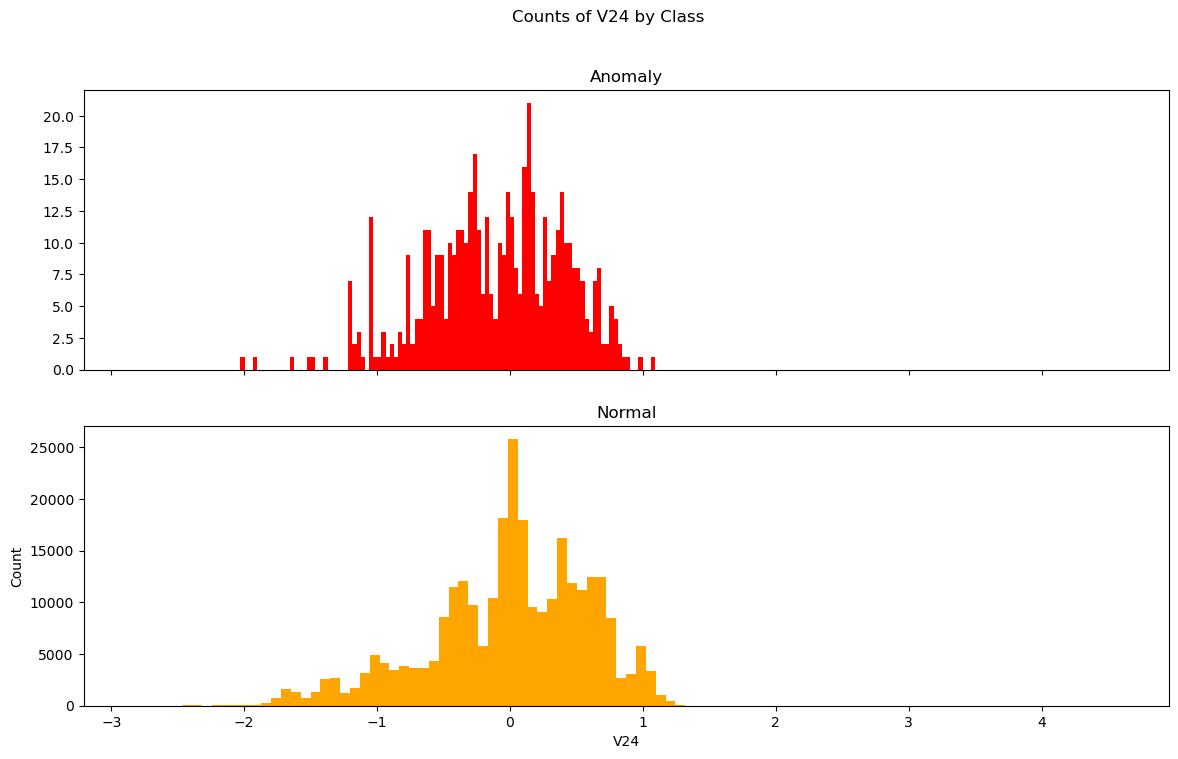

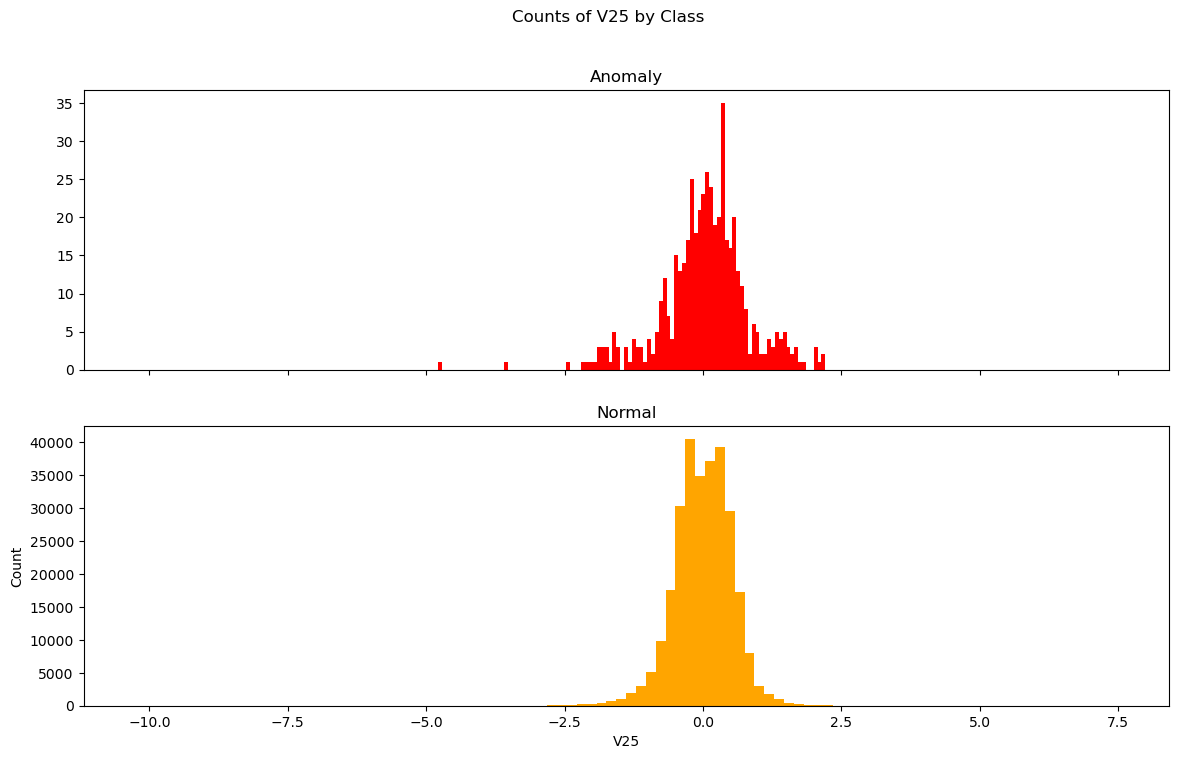

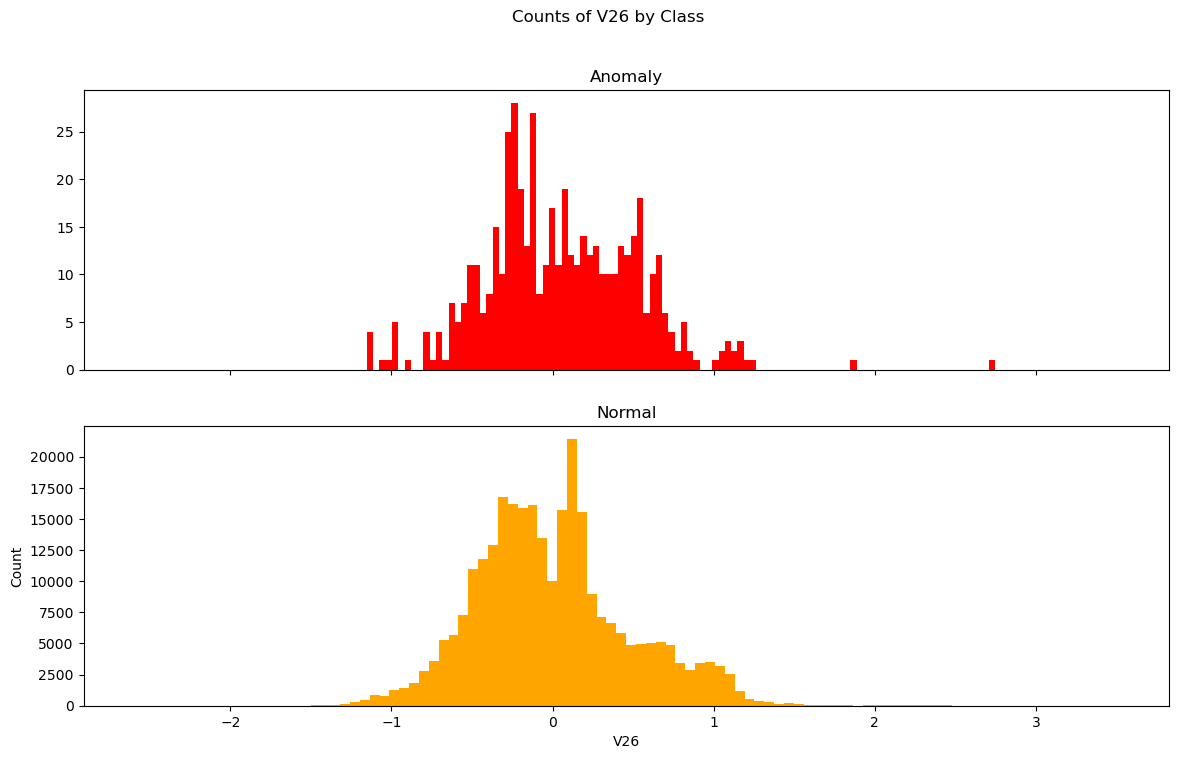

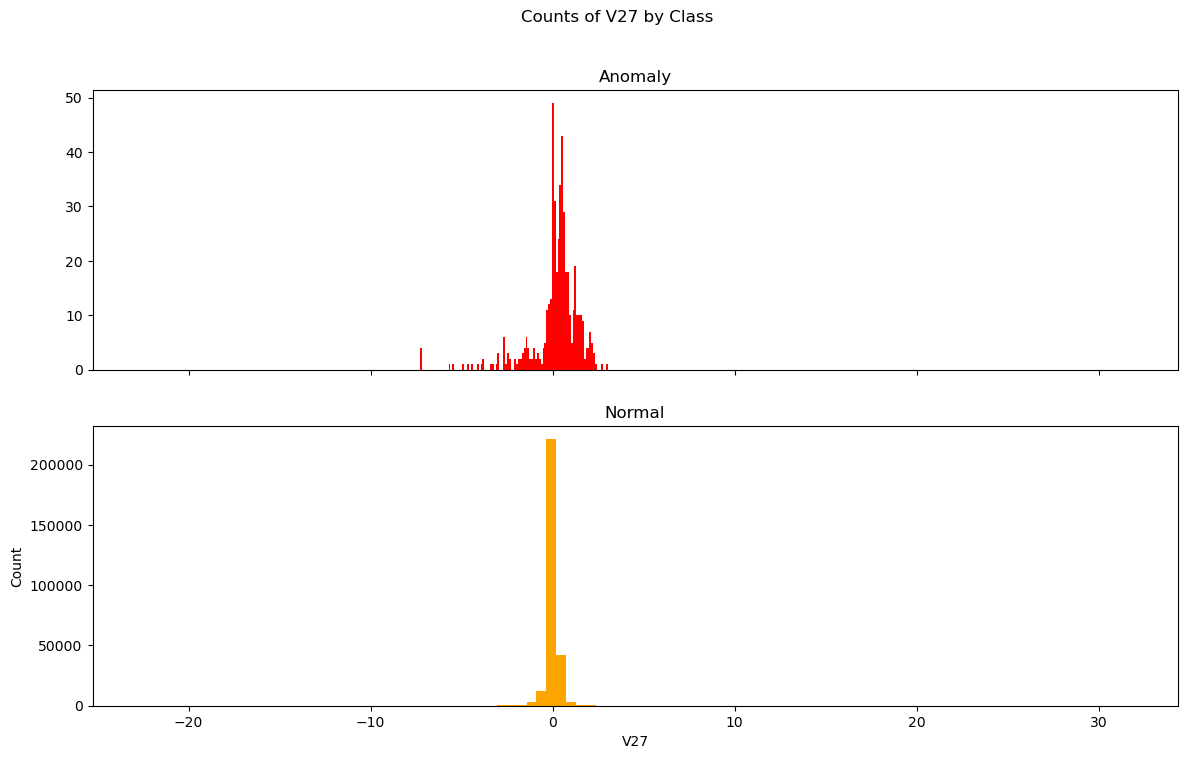

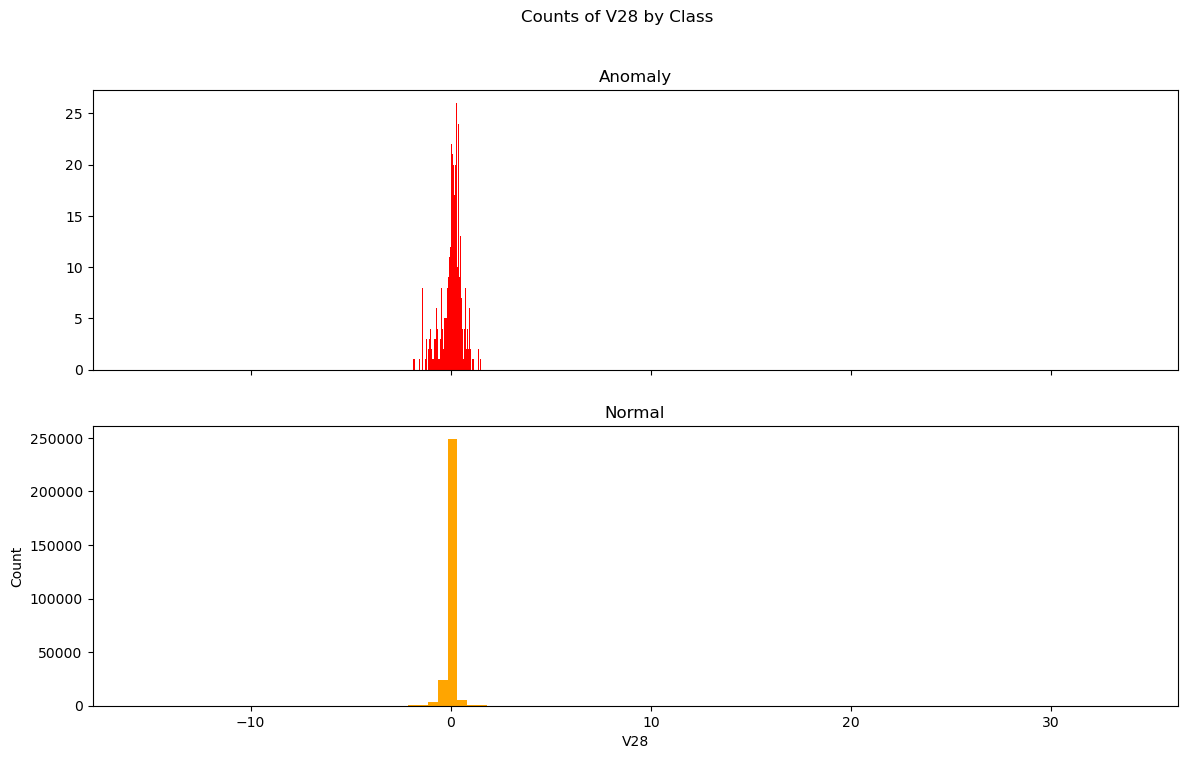

In [39]:
for f in range(1, 29):
    print(f'V{f} Counts')
    plot_histogram(cc, bins, f'V{f}')

[Return to Contents of credit card dataset analysis](#1cca)

A histogram of data for the column V12 in cc. As you can see, there is a very clear deviation seen with the anomalous values compared to the normal values. Both plots share the same x-axis scale, so while the counts might be very low compared to the normal values, they are still spread out far more than the normal values for the same range of V12 column values

In this case, you can see a clear differentiation between the fraudulent data and the normal data that you didn’t see in the graphs earlier. And so, features such as V12 are certainly more important in helping give the model a better context.

<span style='background :green' > A histogram of data for the column V17 in df. Just like with the column V12, there is also a clear deviation seen with the anomalous values compared to the normal values. </span>

This indicates that the column V17 is more likely to help the model learn how to differentiate between normal and fraudulent transactions than some of the other columns that don’t show such a deviance

This time you can see an even bigger difference between fraudulent data and normal data. Once again, it’s features like V12 and V17 that hold the data that will help the model understand how to differentiate between the anomalies and the normal points.

To minimize the output, click the same bar as earlier when you expanded the output. Let’s now look at how all of these data points vary according to time:

V1 vs Time


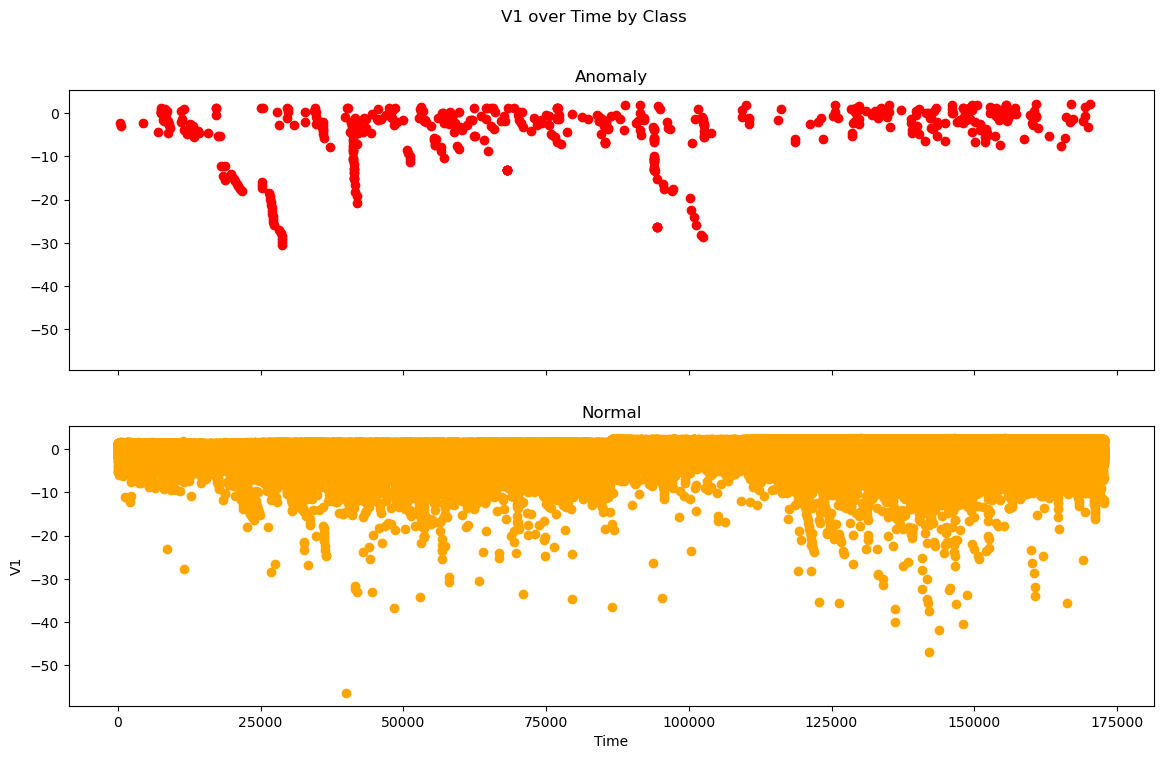

V2 vs Time


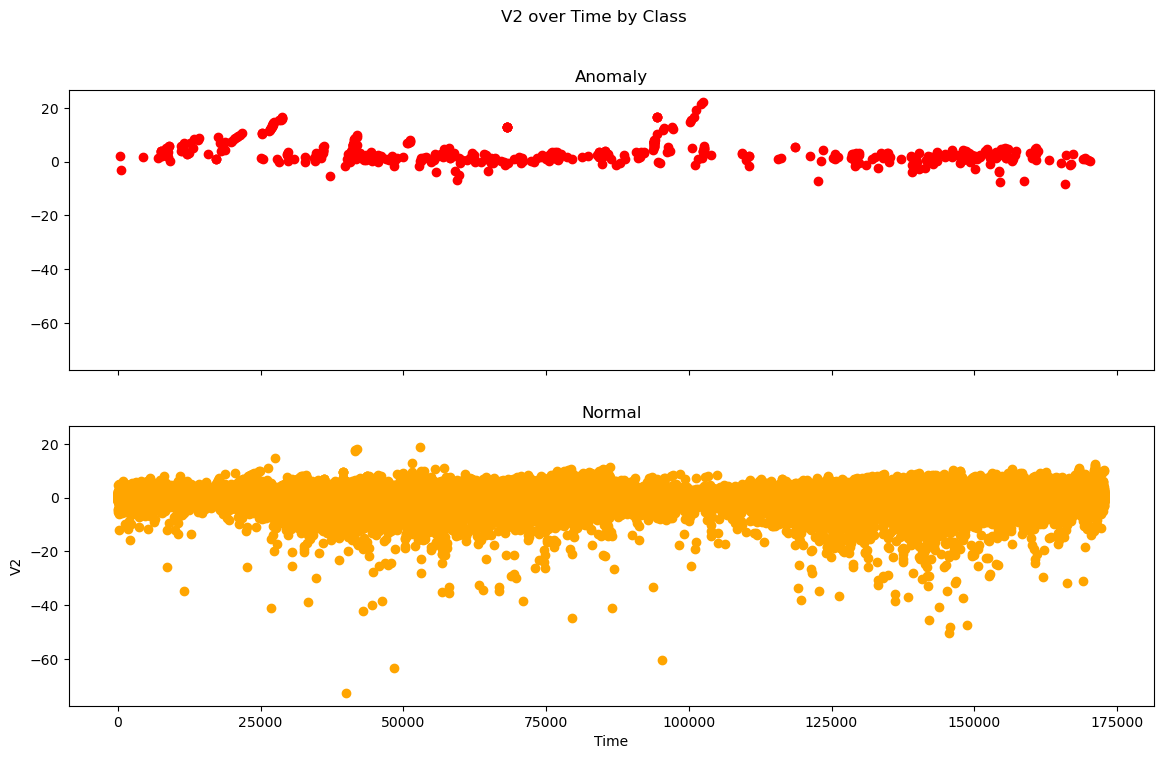

V3 vs Time


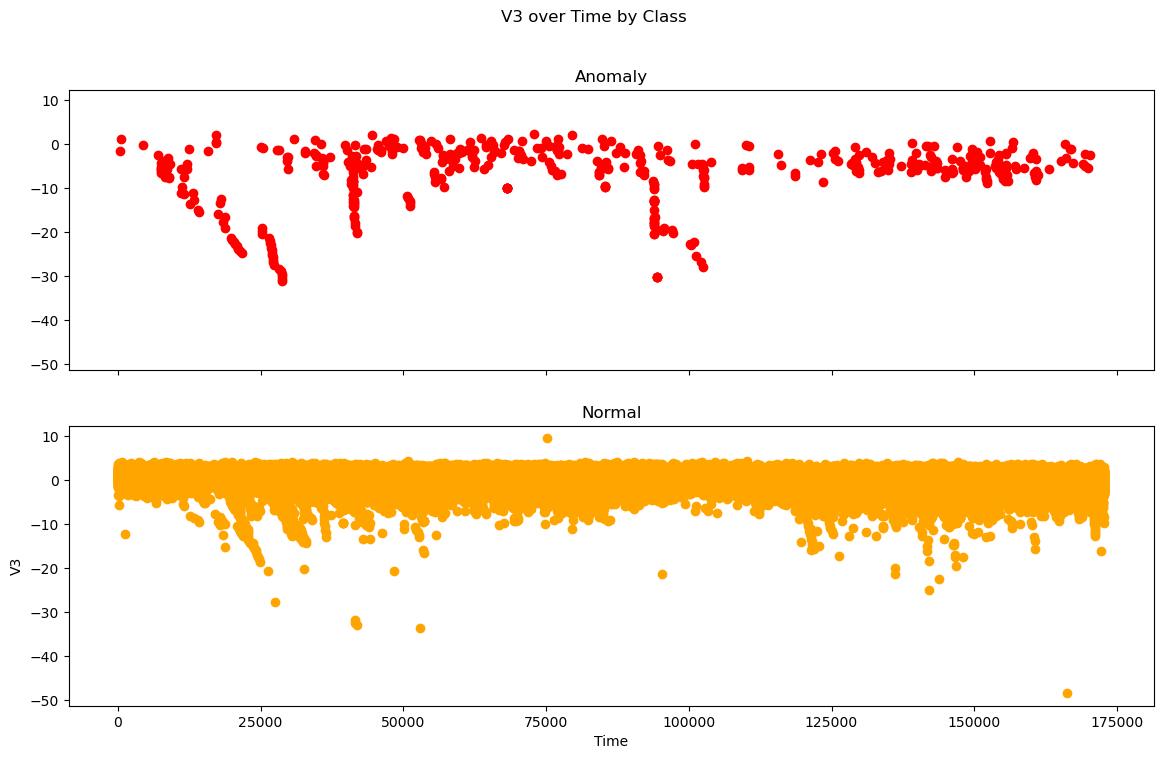

V4 vs Time


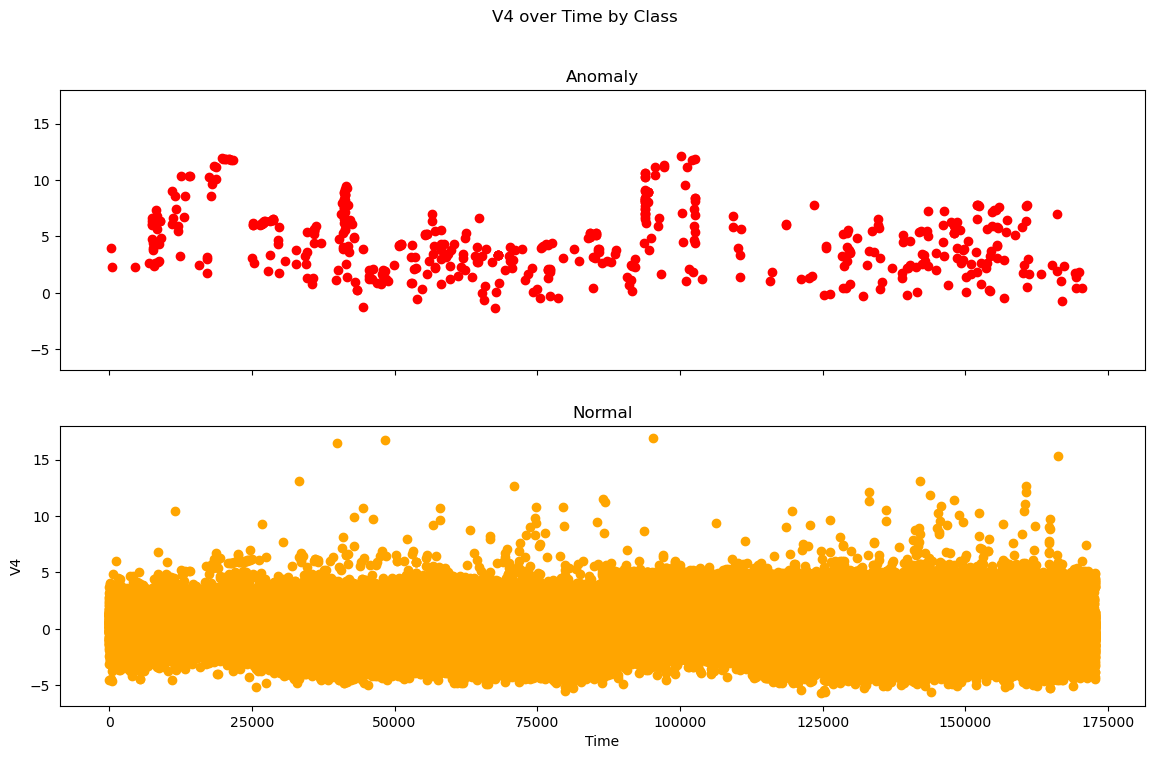

V5 vs Time


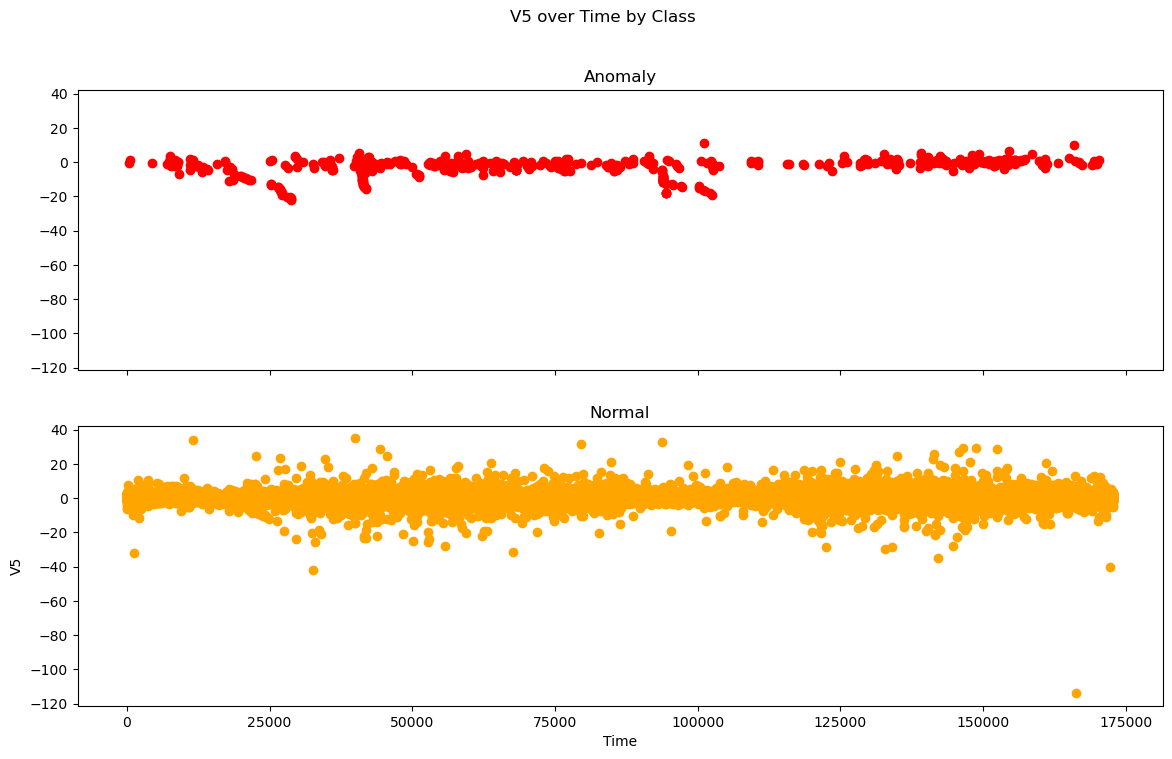

V6 vs Time


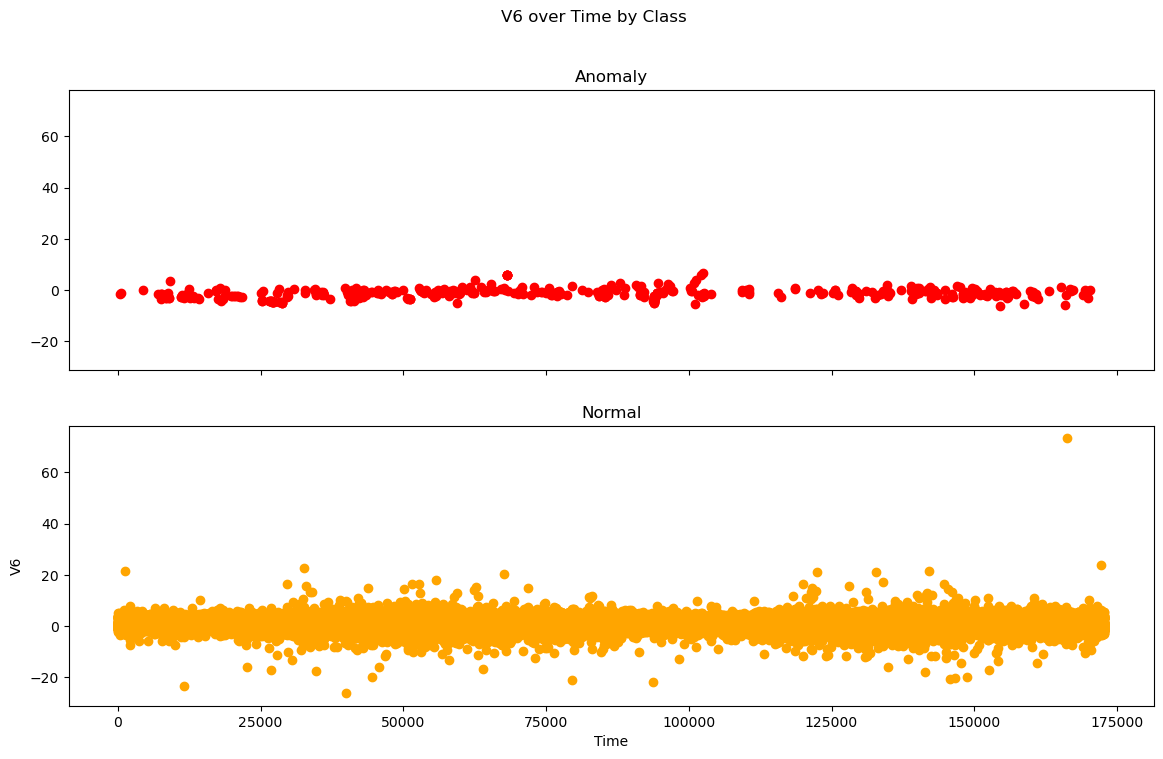

V7 vs Time


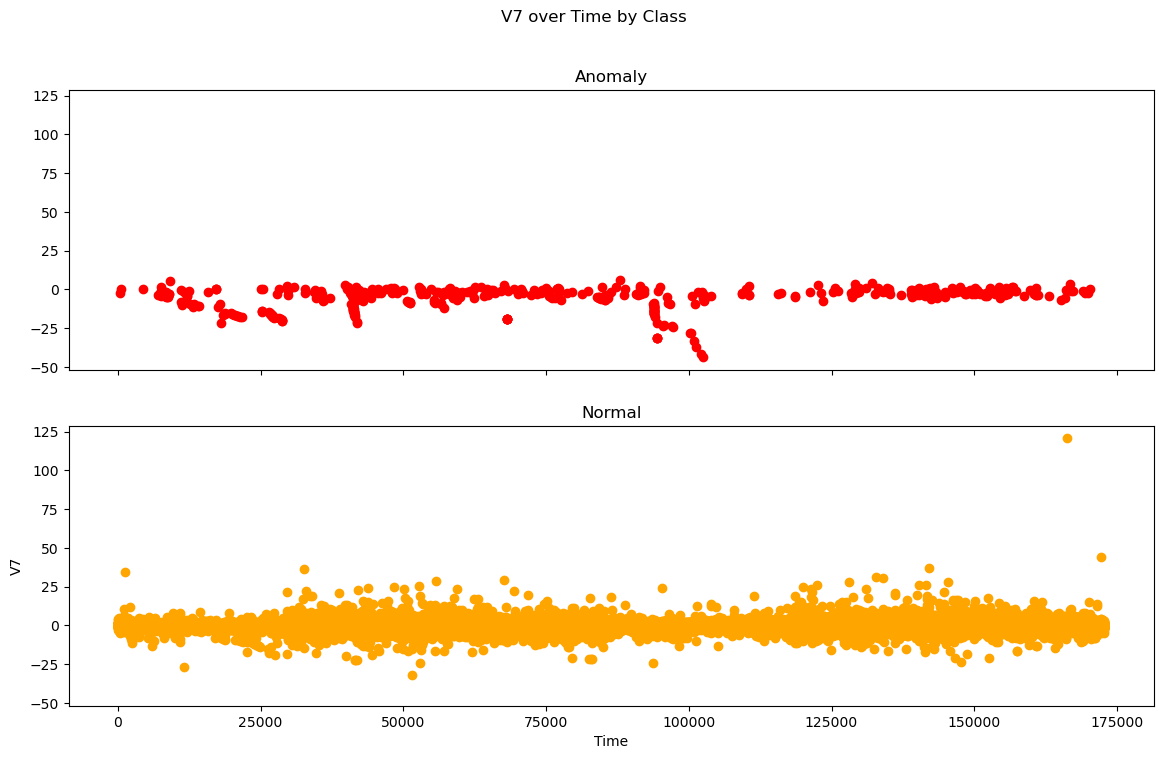

V8 vs Time


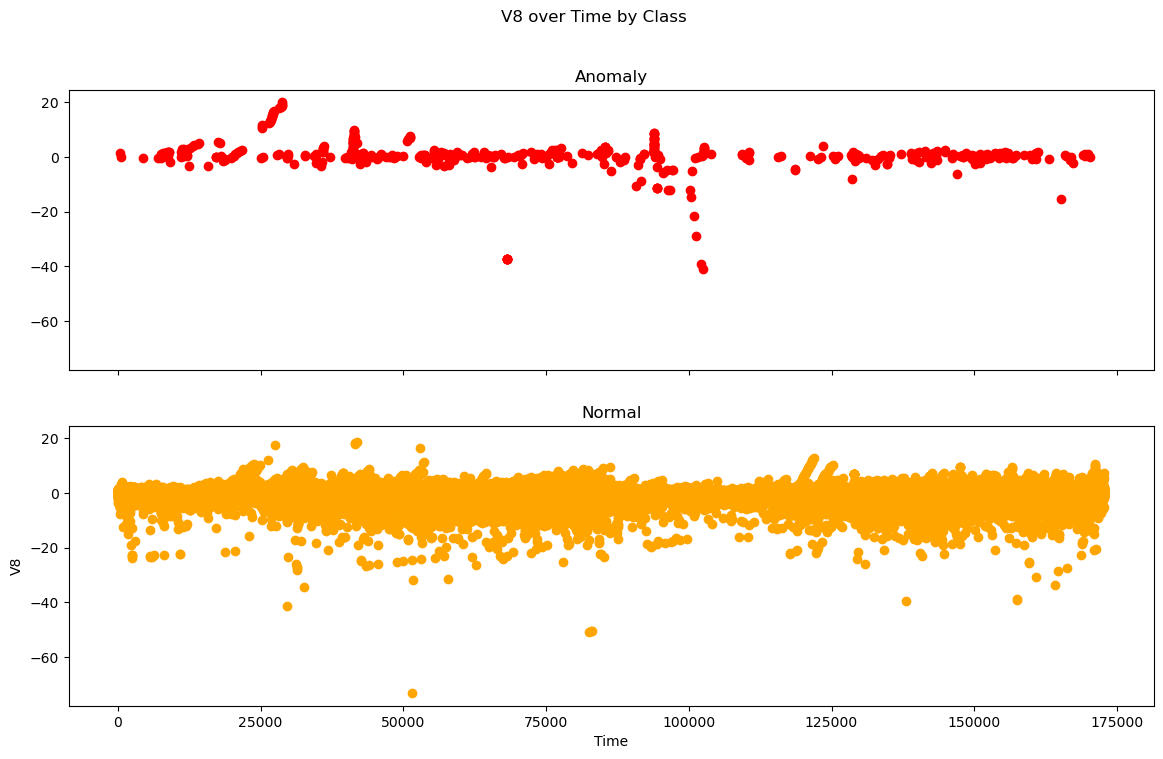

V9 vs Time


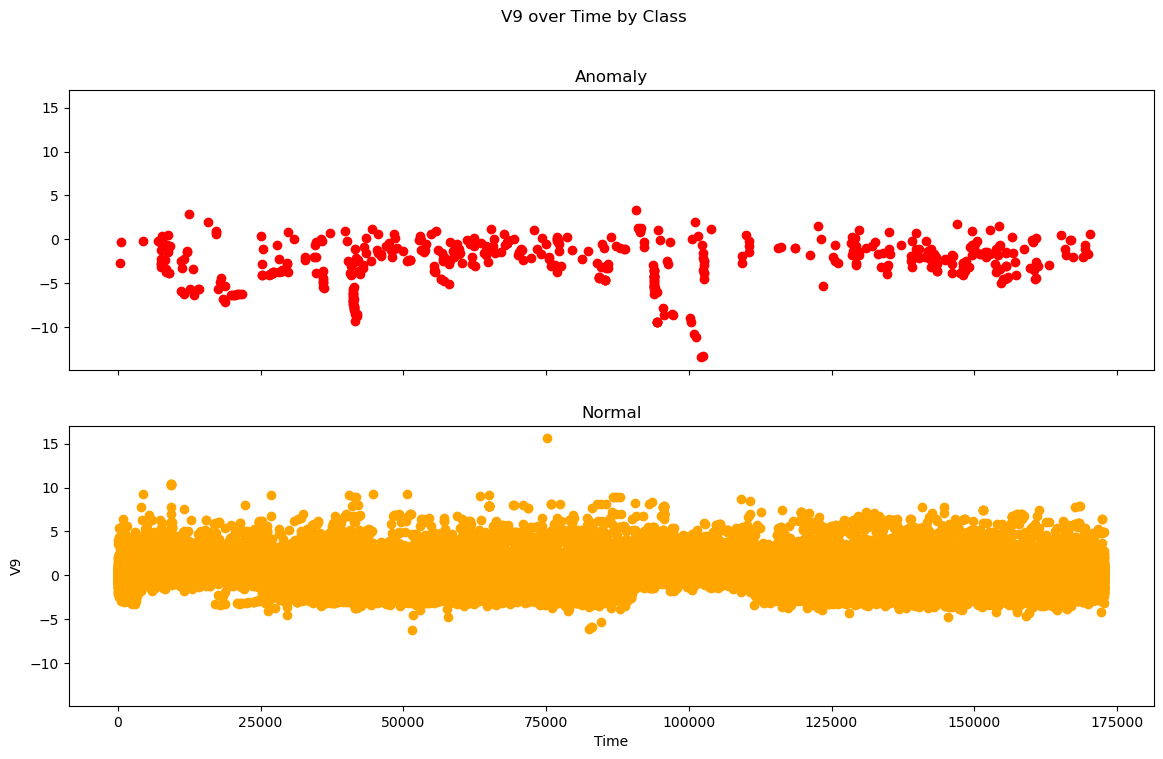

V10 vs Time


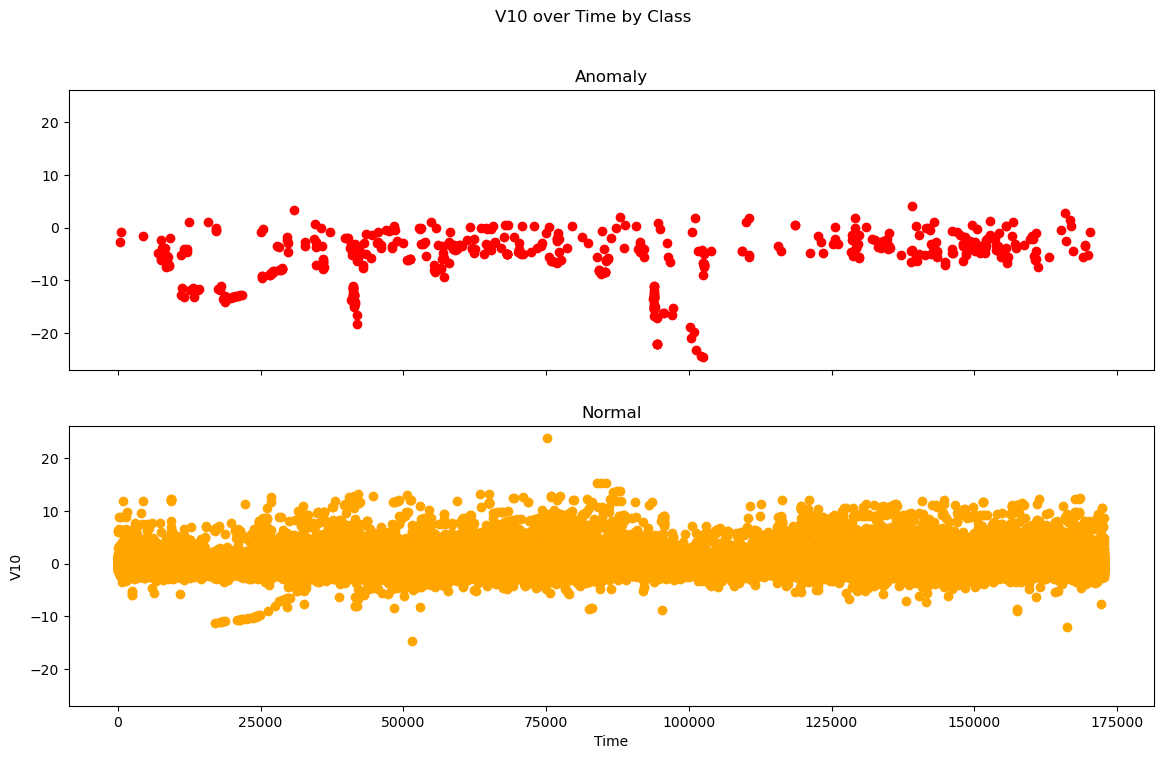

V11 vs Time


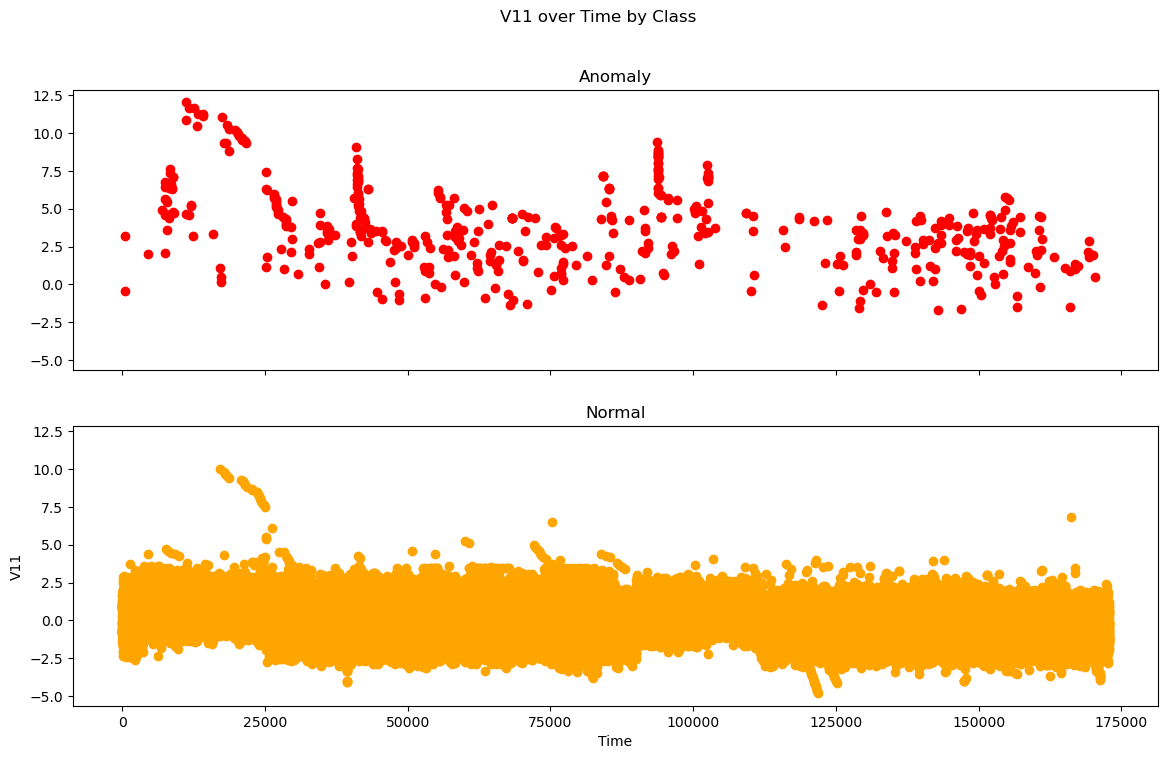

V12 vs Time


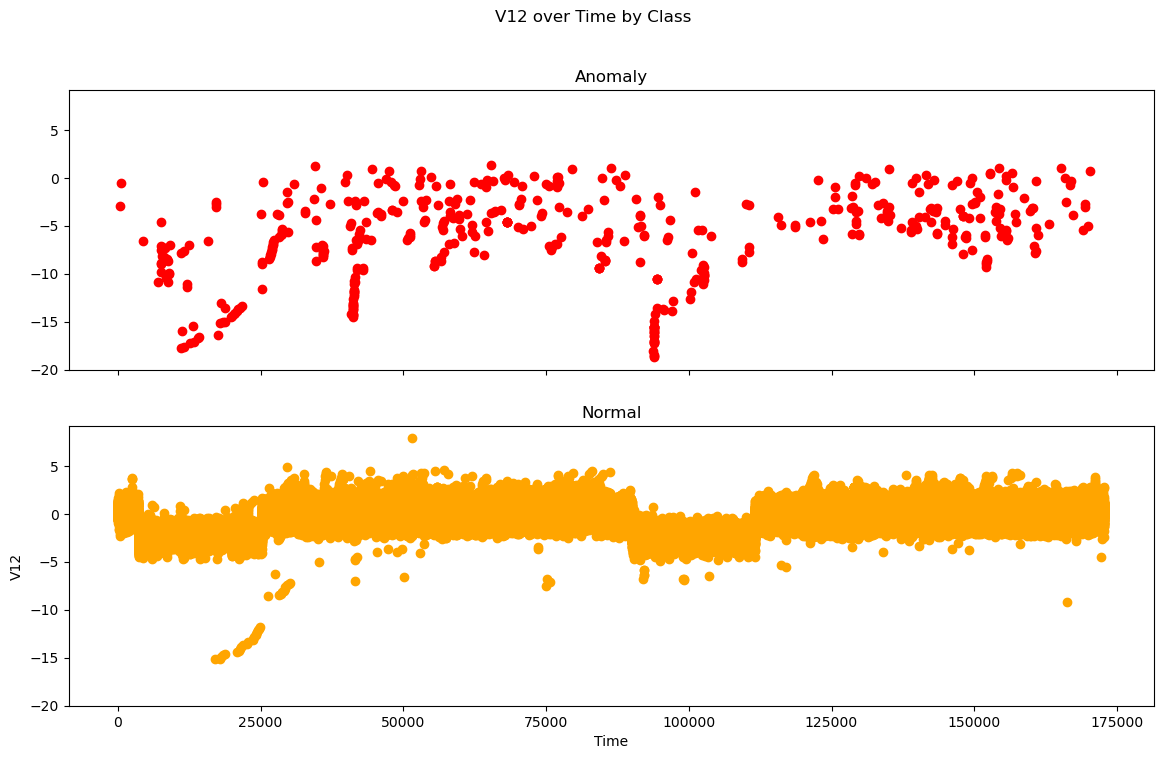

V13 vs Time


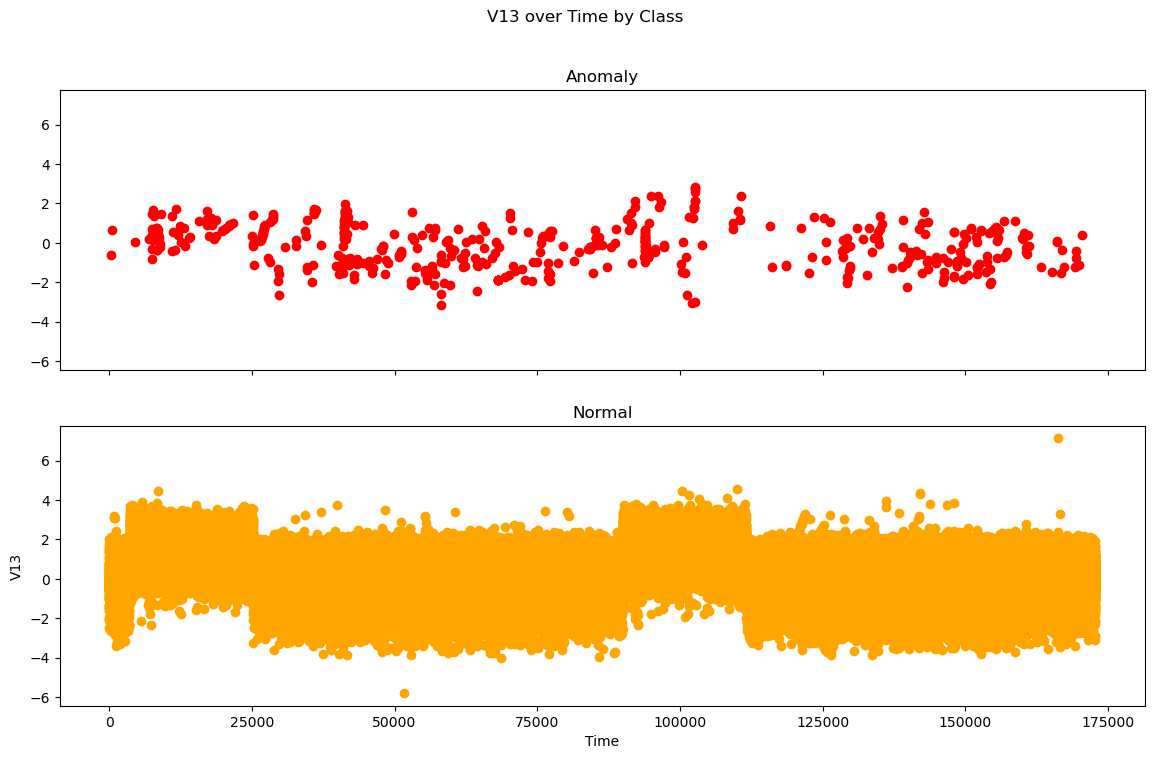

V14 vs Time


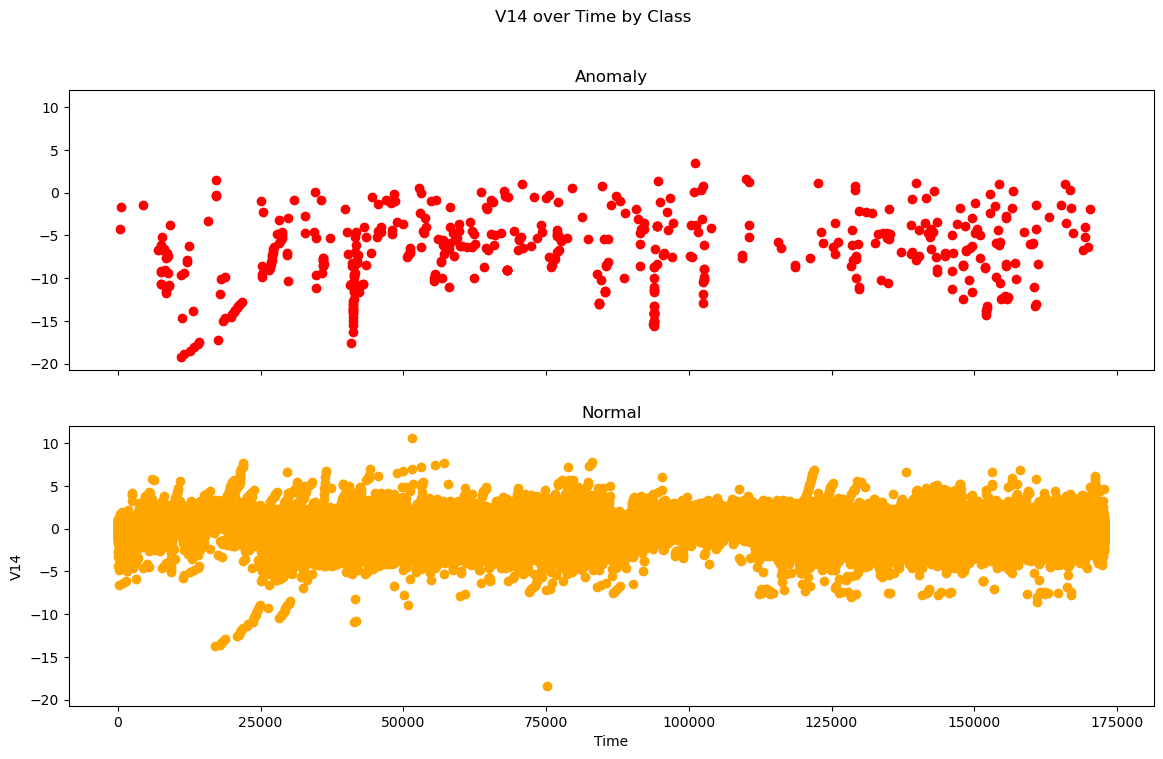

V15 vs Time


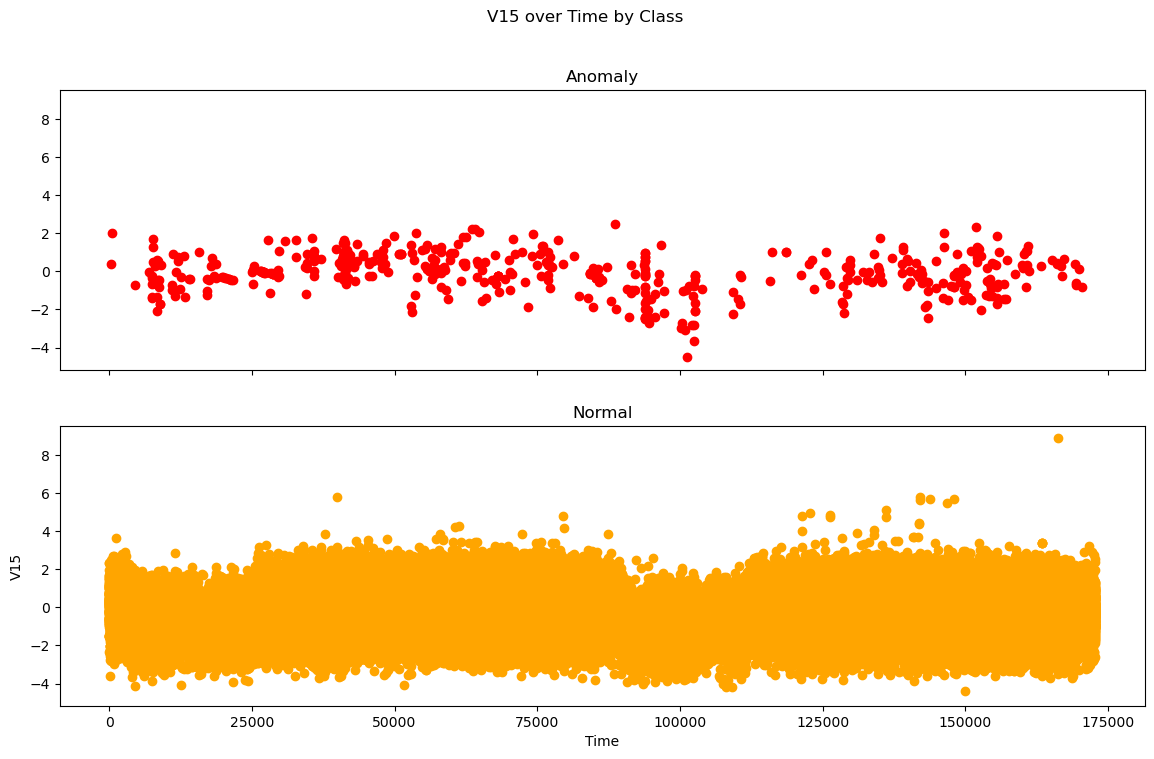

V16 vs Time


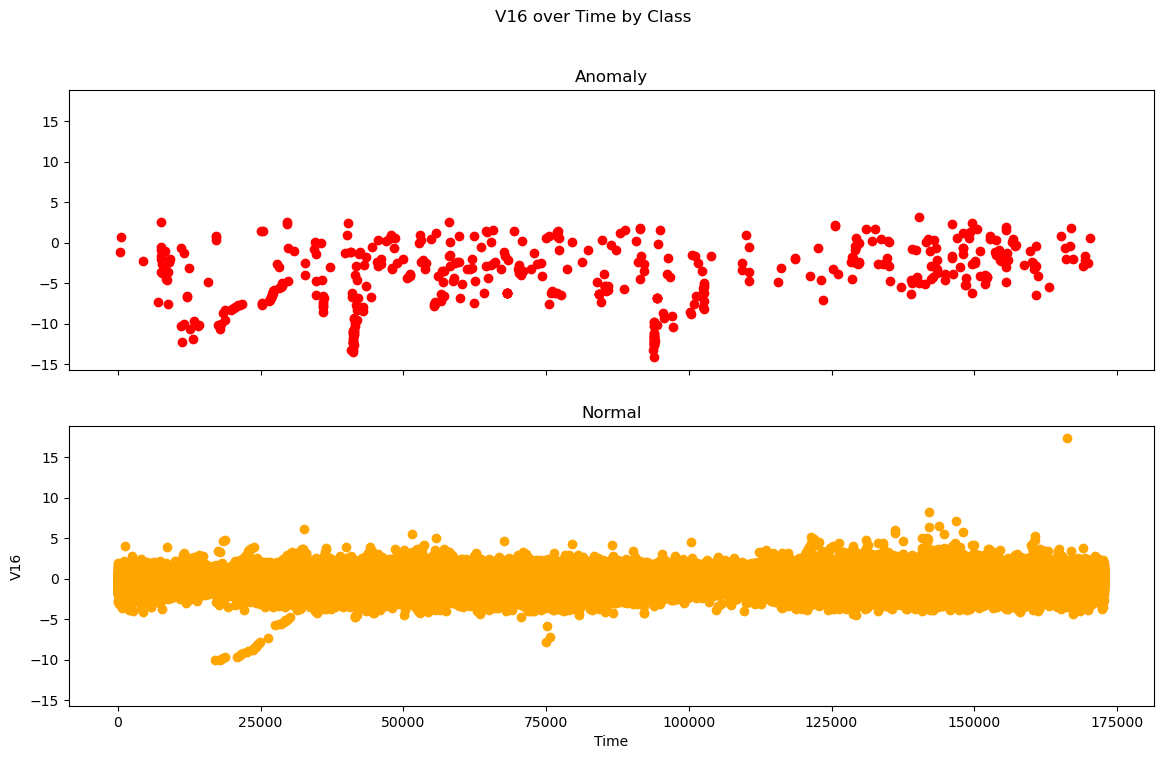

V17 vs Time


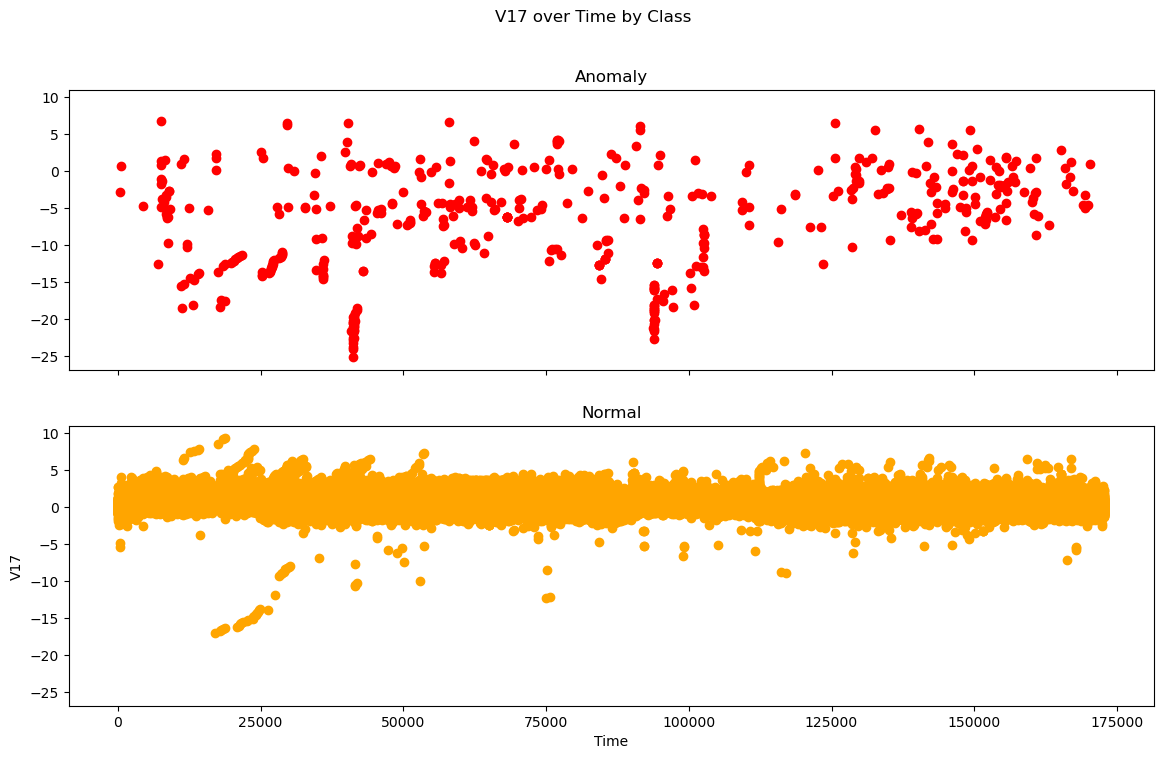

V18 vs Time


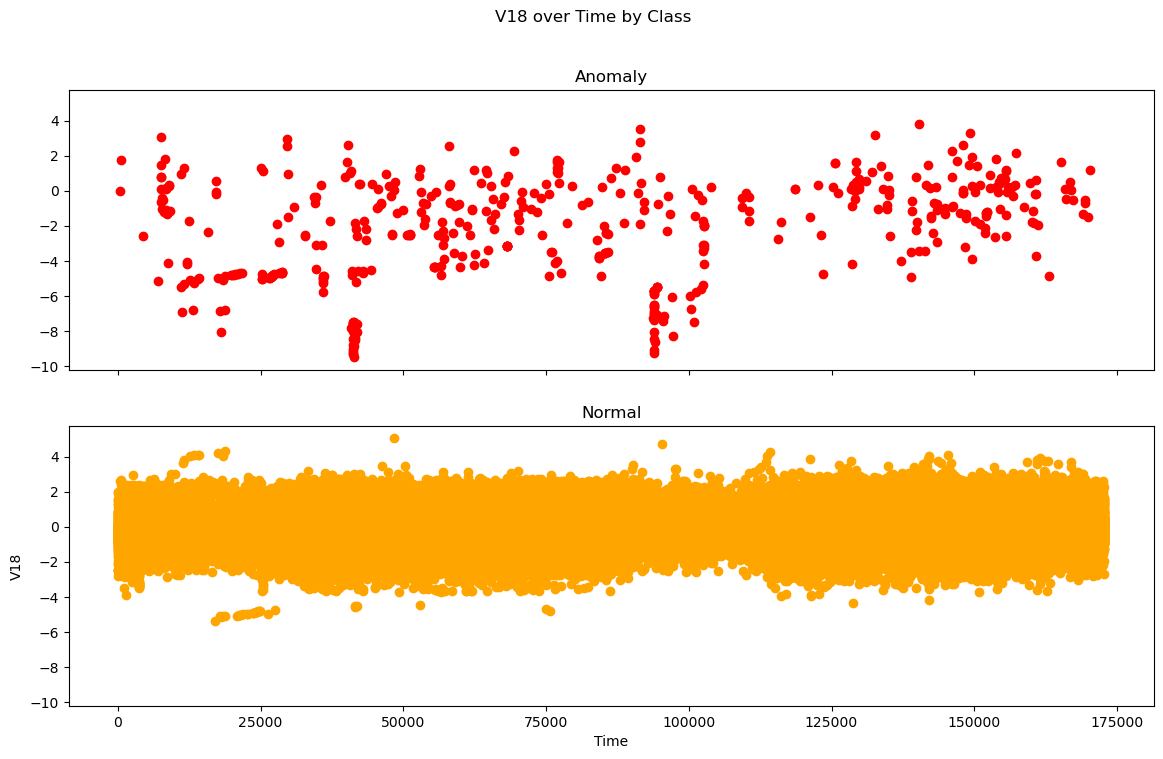

V19 vs Time


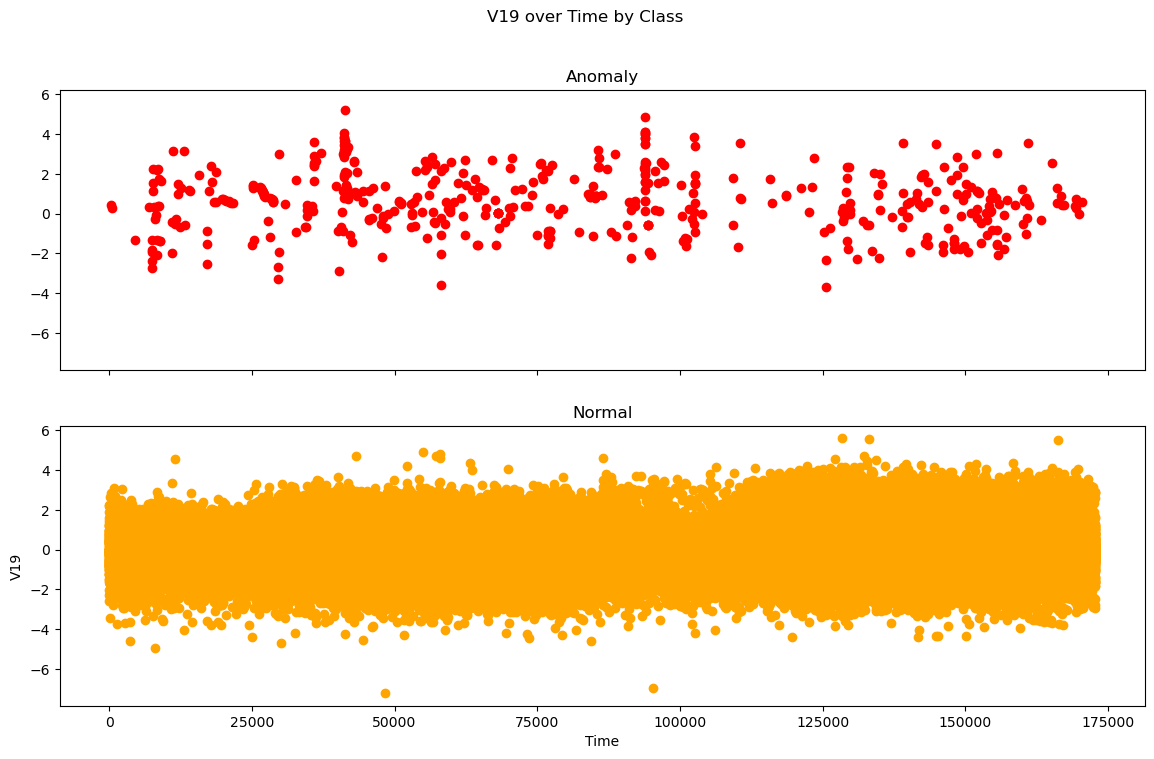

V20 vs Time


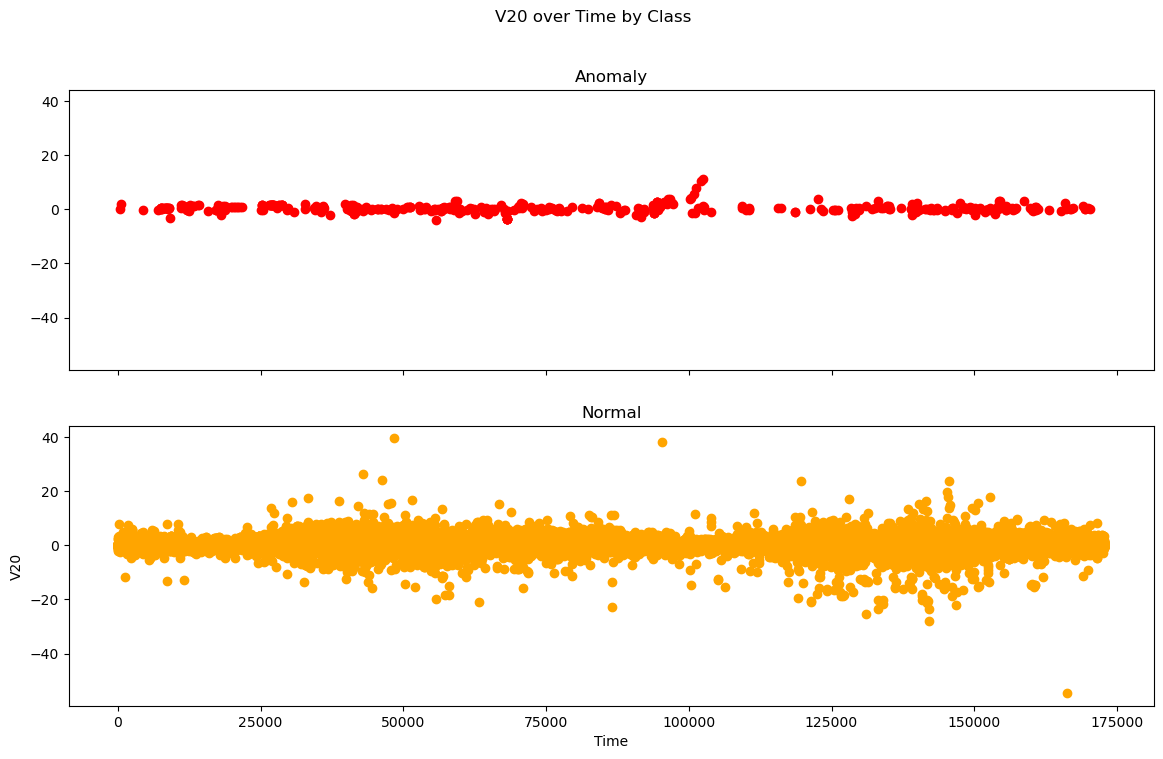

V21 vs Time


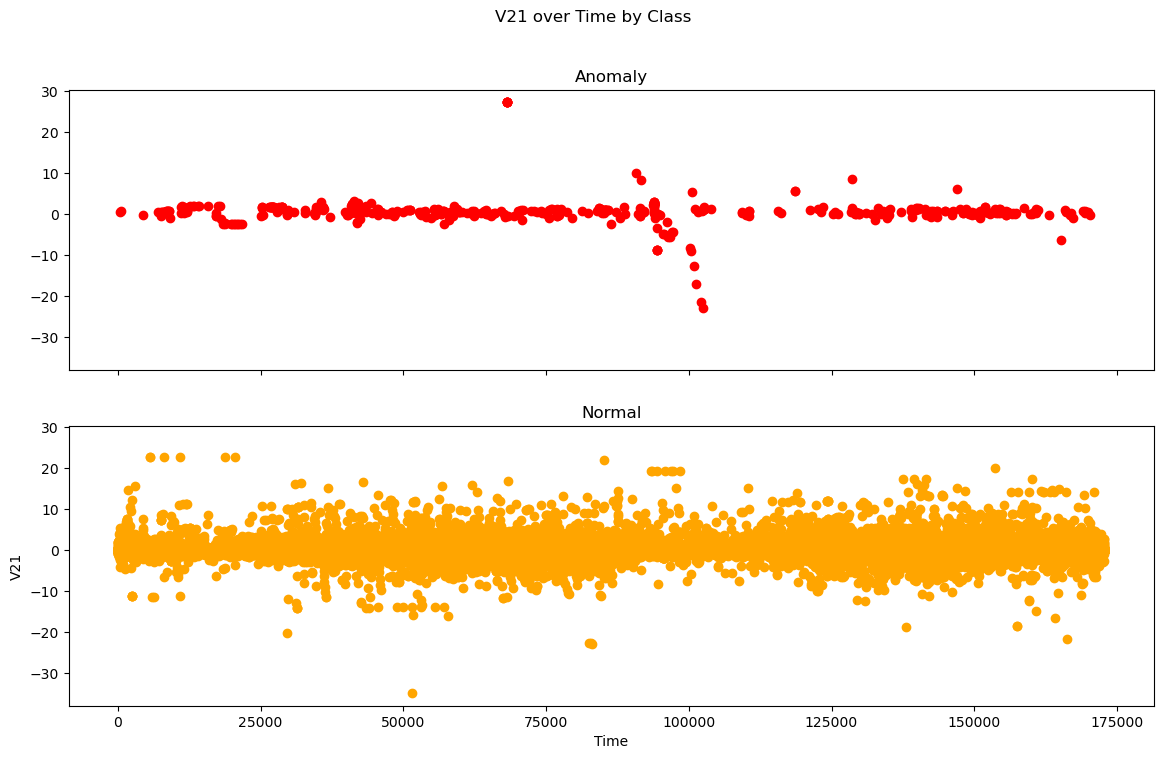

V22 vs Time


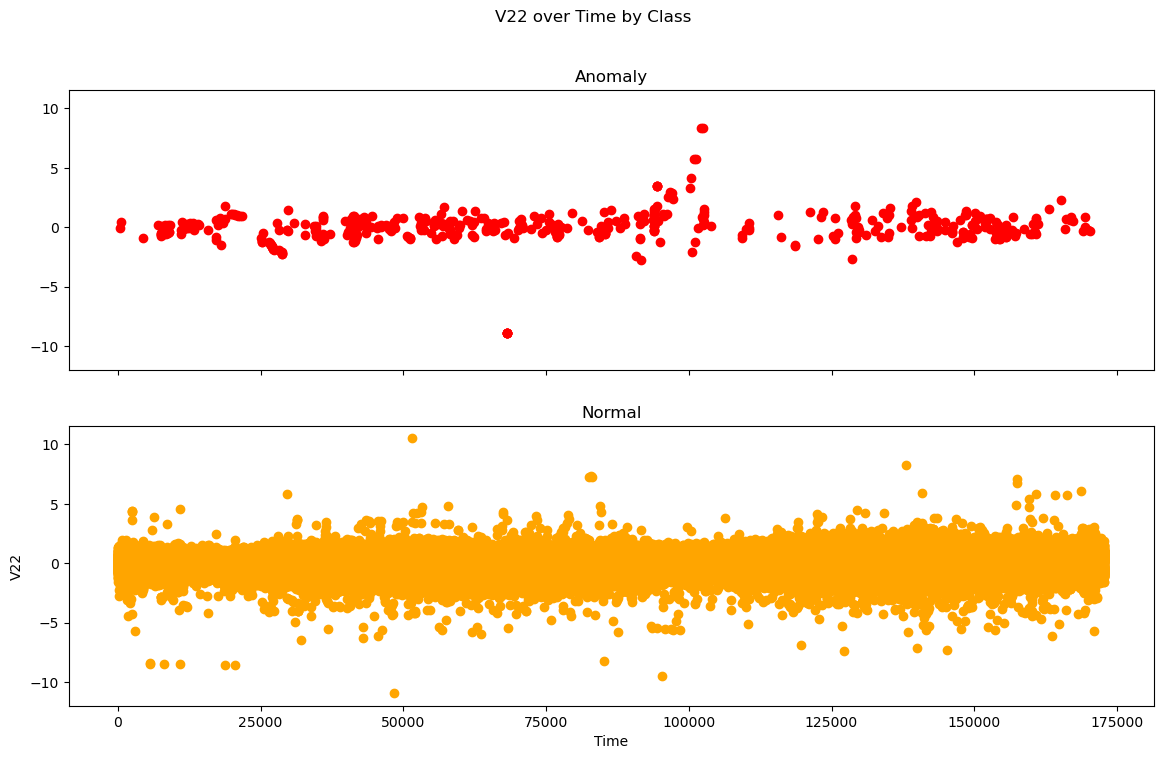

V23 vs Time


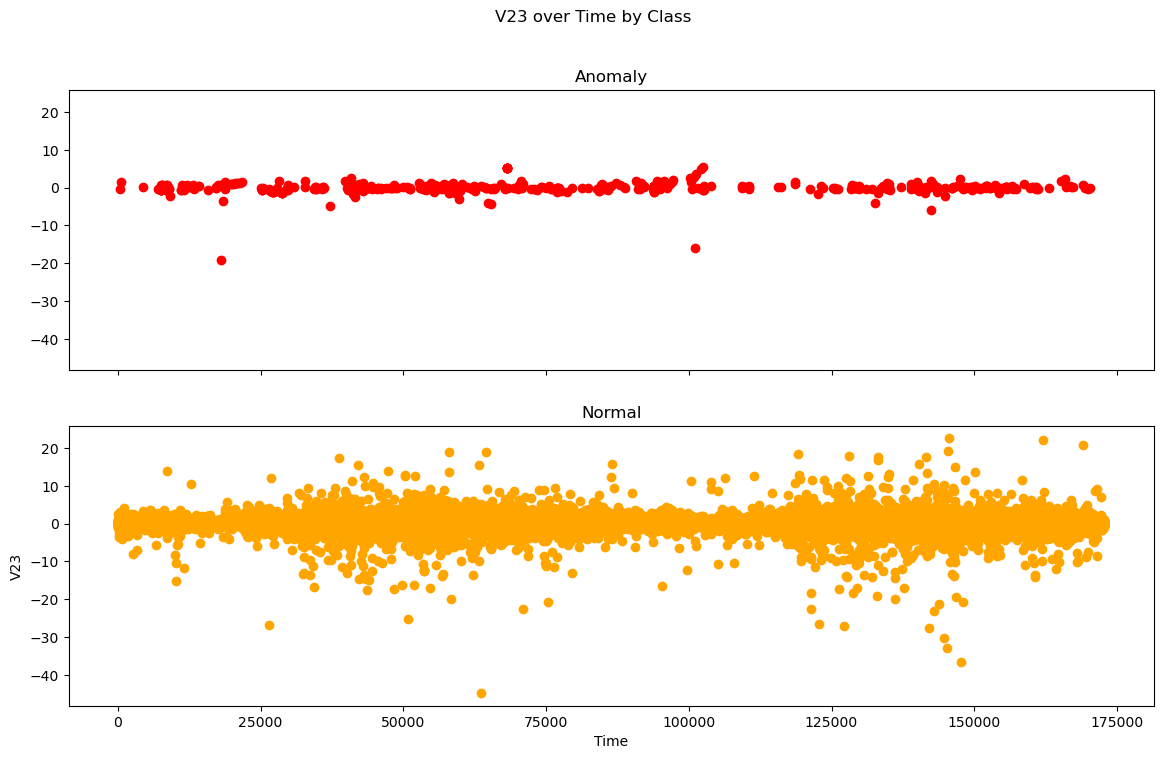

V24 vs Time


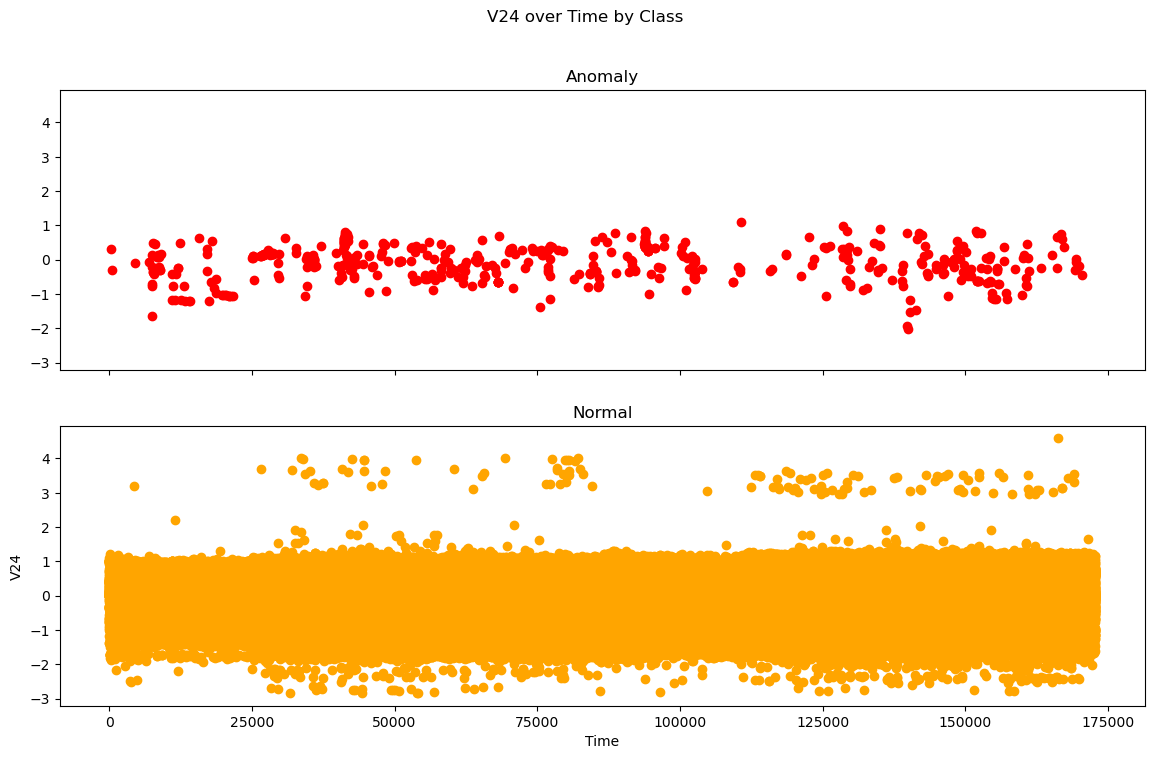

V25 vs Time


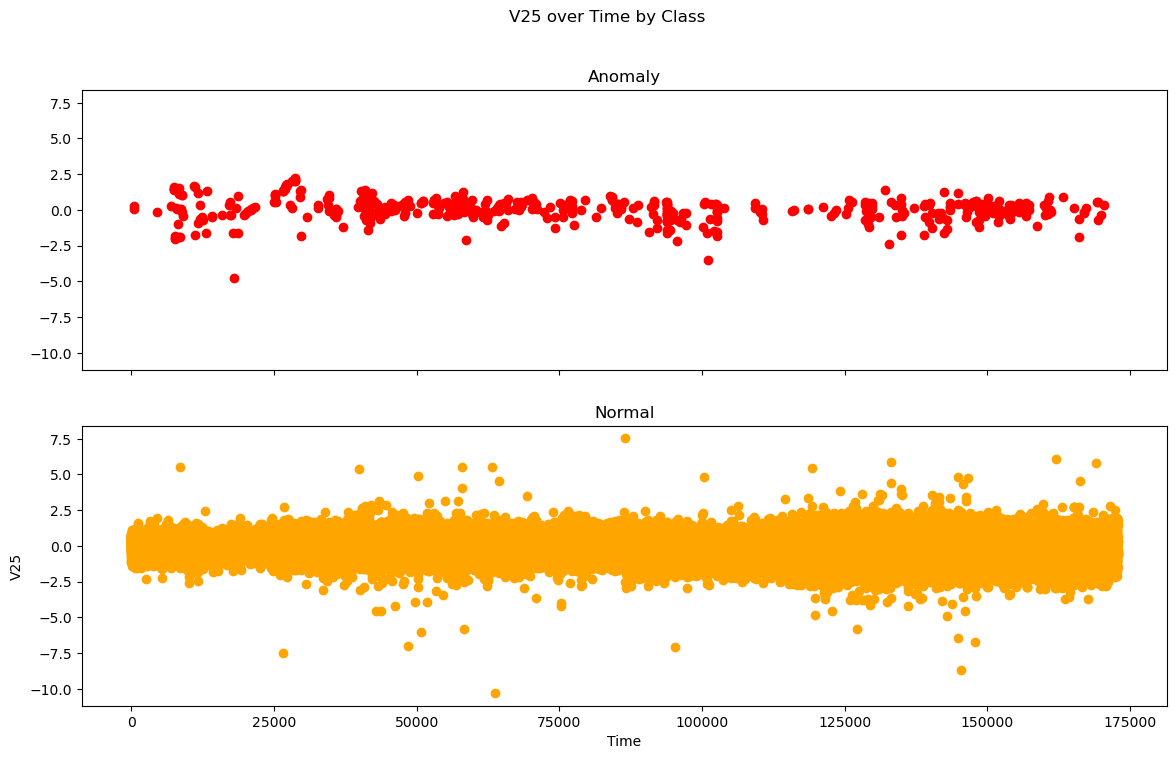

V26 vs Time


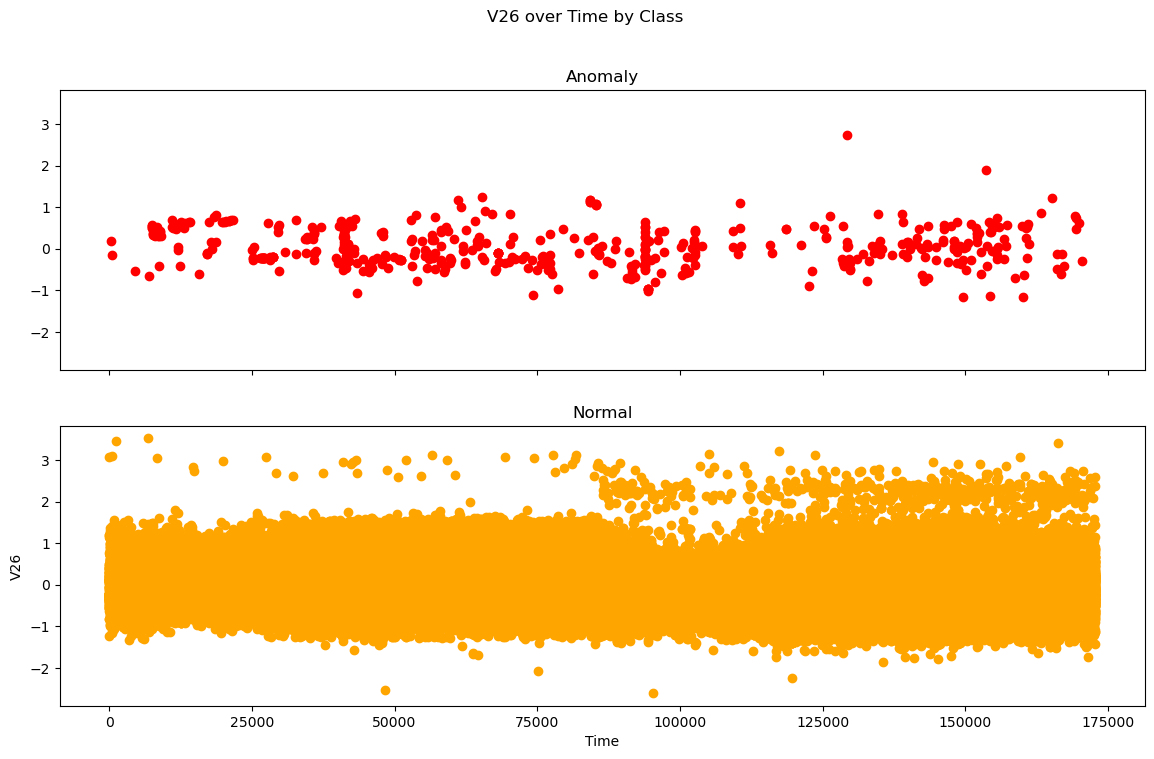

V27 vs Time


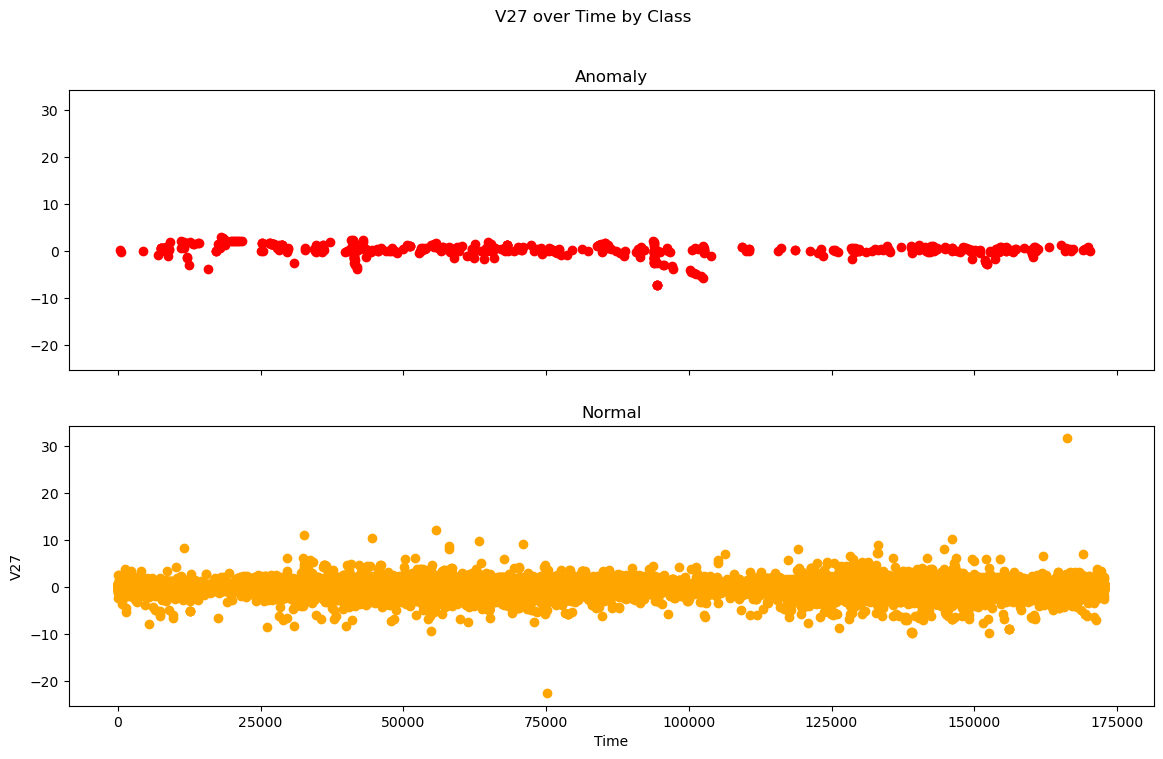

V28 vs Time


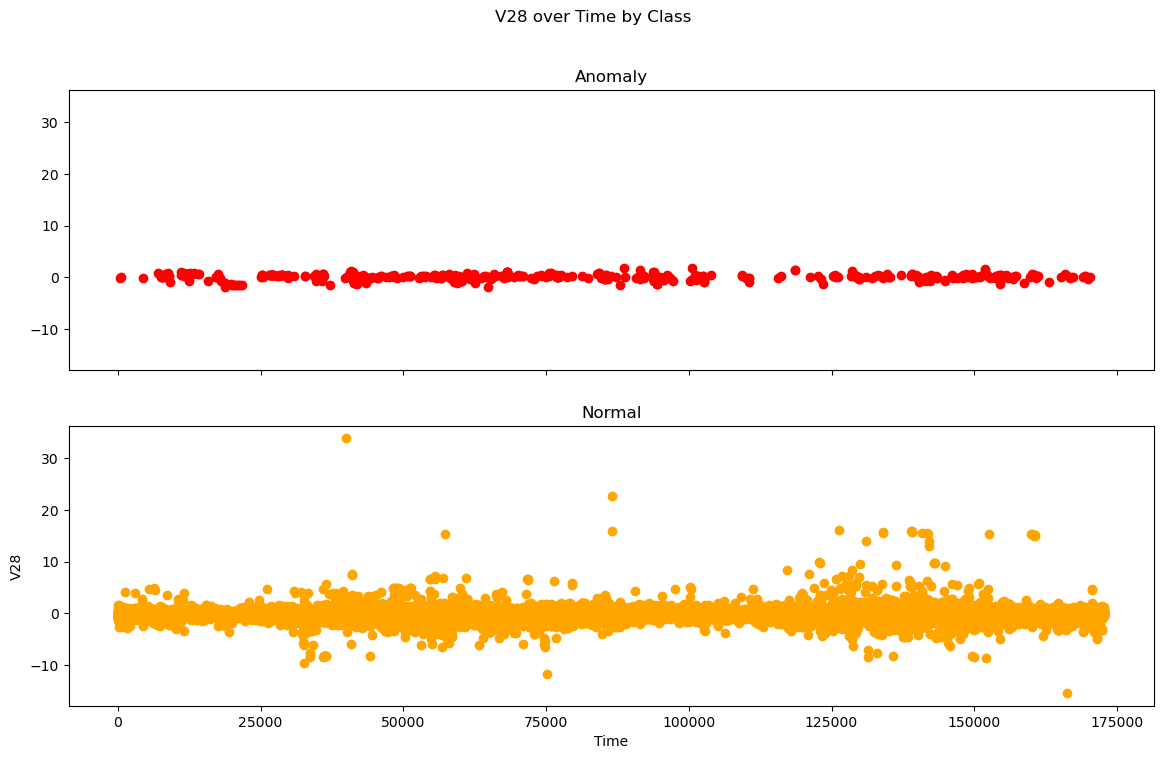

In [40]:
for f in range(1, 29):
    print(f'V{f} vs Time')
    plot_scatter(cc, "Time", f'V{f}', sharey=True)

[Return to Contents of credit card dataset analysis](#1cca)

<span style='background:lightgreen' >The scatterplot for Time on the x-axis and V12 on the y-axis shows a deviation between the anomalies and the normal data points.</span> Although a significant portion of the anomalies fall under the band of normal points, there are still a good number of anomalies that fall out of that range. And so you can see that against Time, the data for the column V12 also shows this deviation from the normal data points

Once again, with V12 you can see a significant difference between the anomalies and the normal data points. A good portion of the anomalies remain hidden within the normal data points, but a significant amount of them can be differentiated from the rest.

The difference between the anomalies and the normal points are highlighted even further when looking at V17. It seems that even in relation to time, columns V12 and V17 hold data that best help distinguish fraudulent transactions from normal transactions. You can see in the graph that a few normal points are with the anomalous points as well, but
hopefully the model can learn the true difference taking into account all of the data.

[Return to Contents of credit card dataset analysis](#1cca)

Finally, let’s see the relationship between each of these columns and Amount:

Amount vs V1


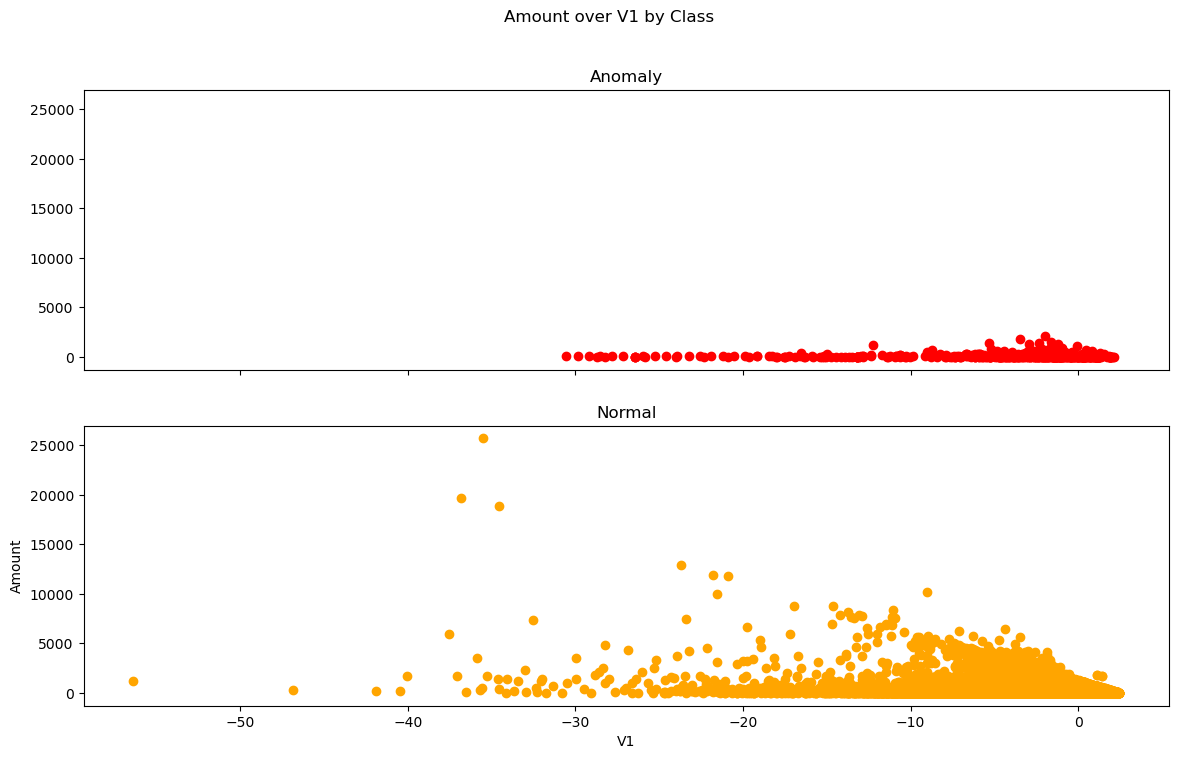

Amount vs V2


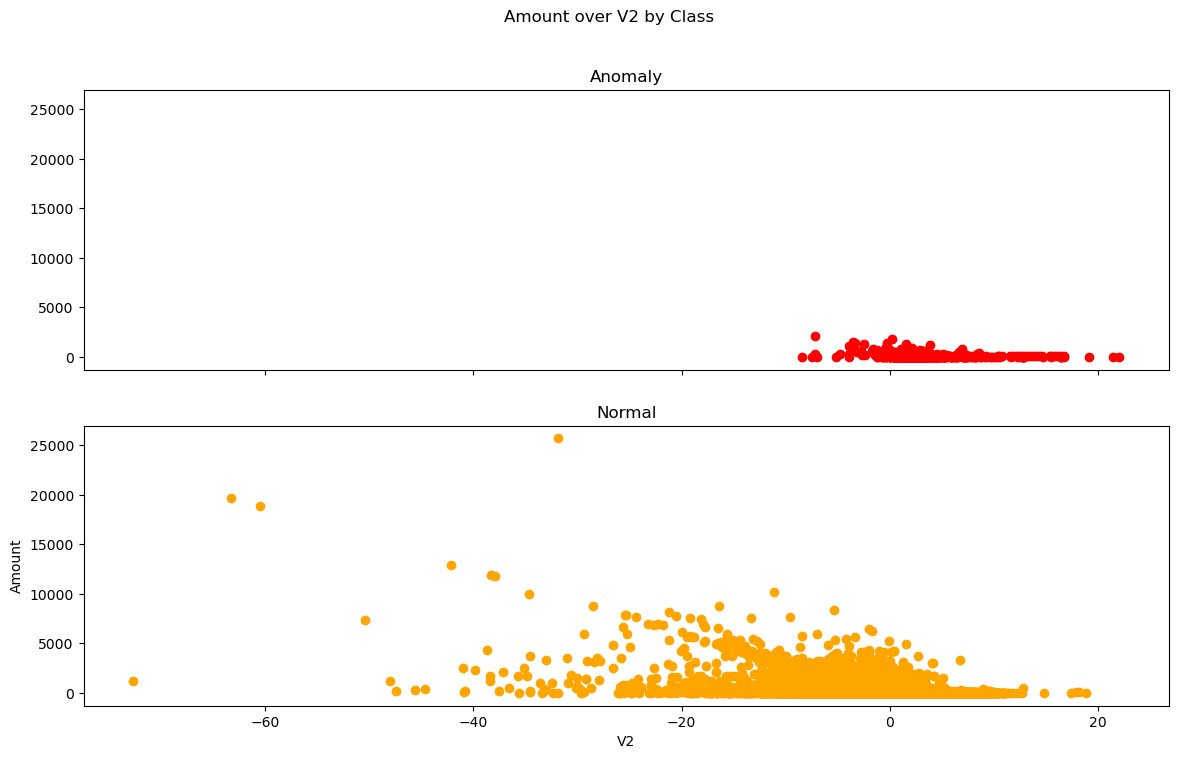

Amount vs V3


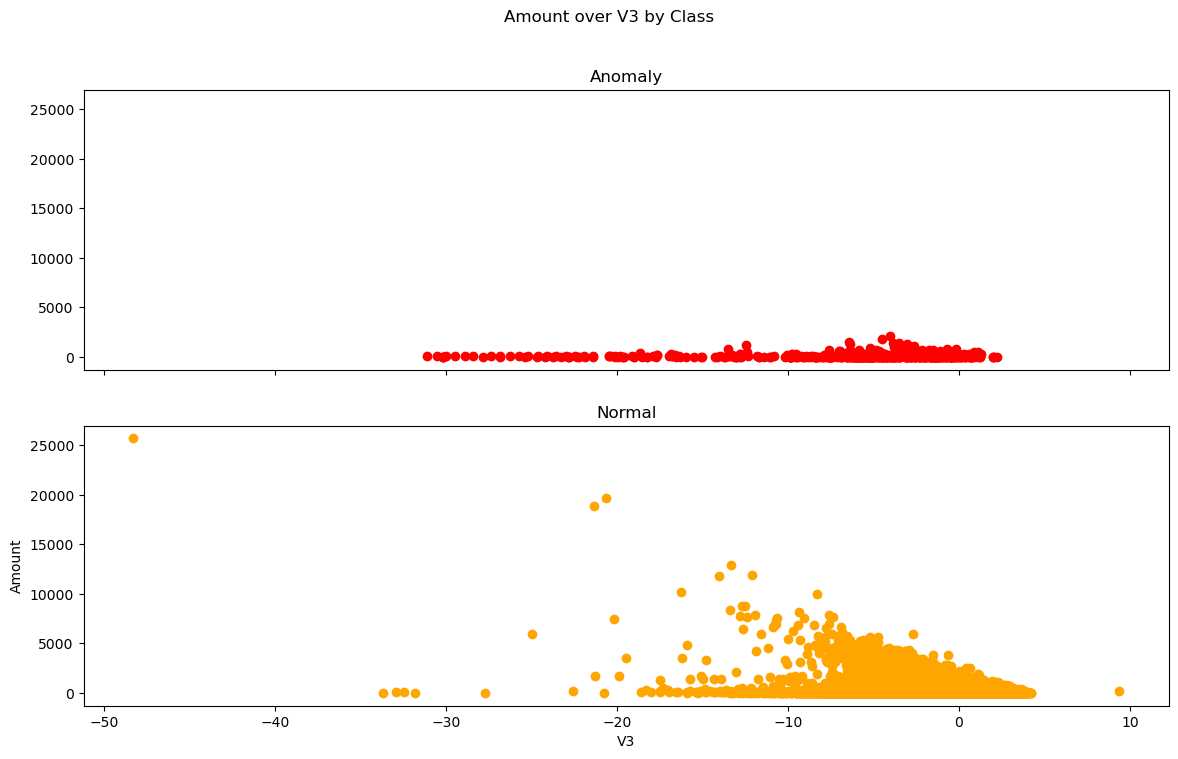

Amount vs V4


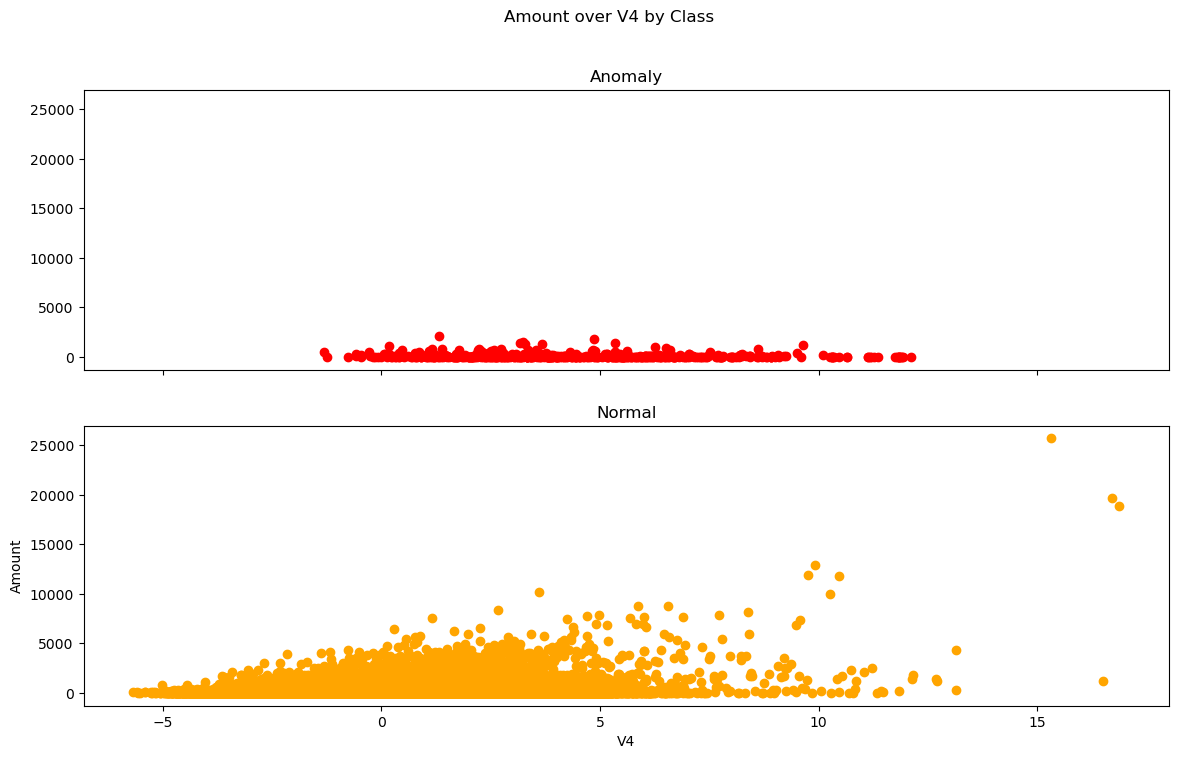

Amount vs V5


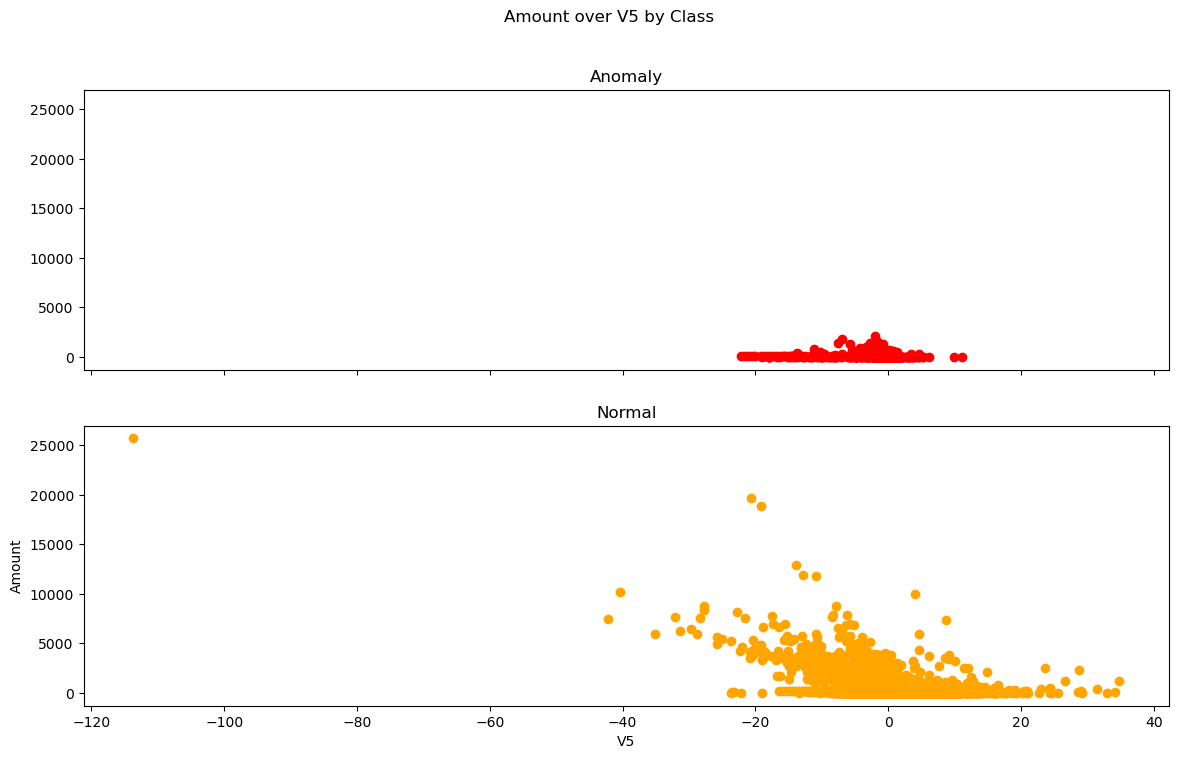

Amount vs V6


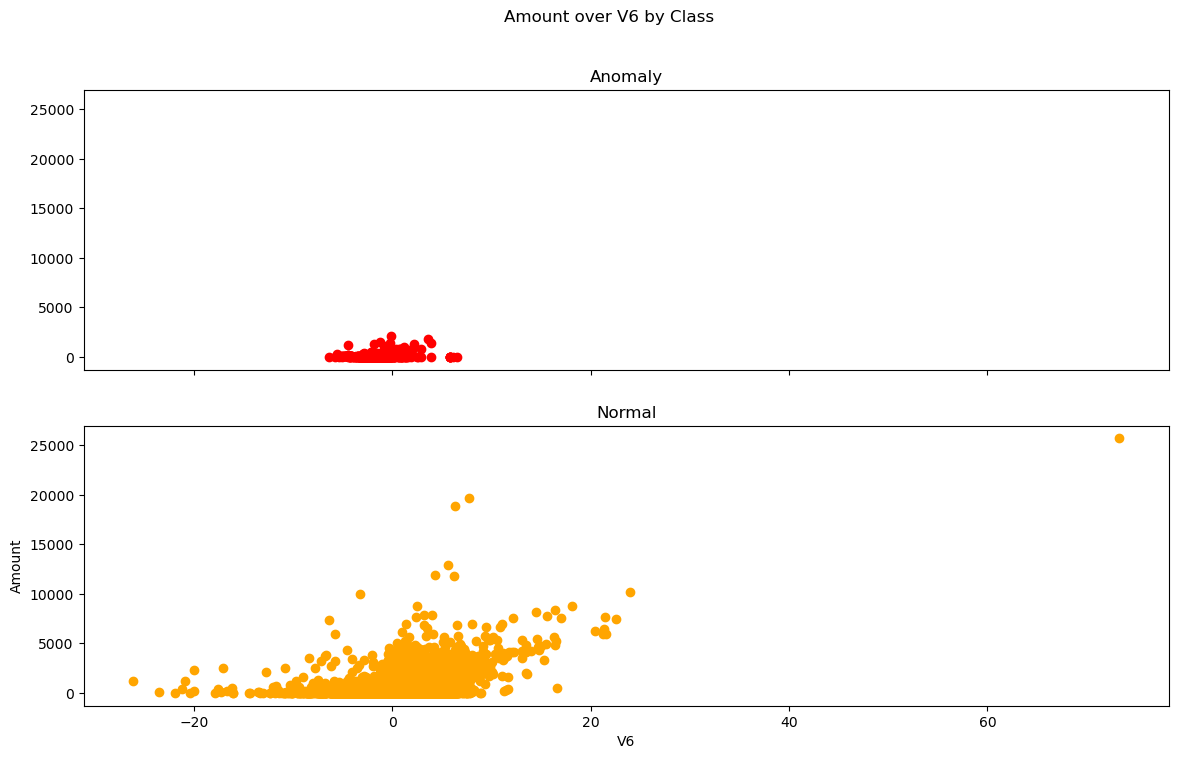

Amount vs V7


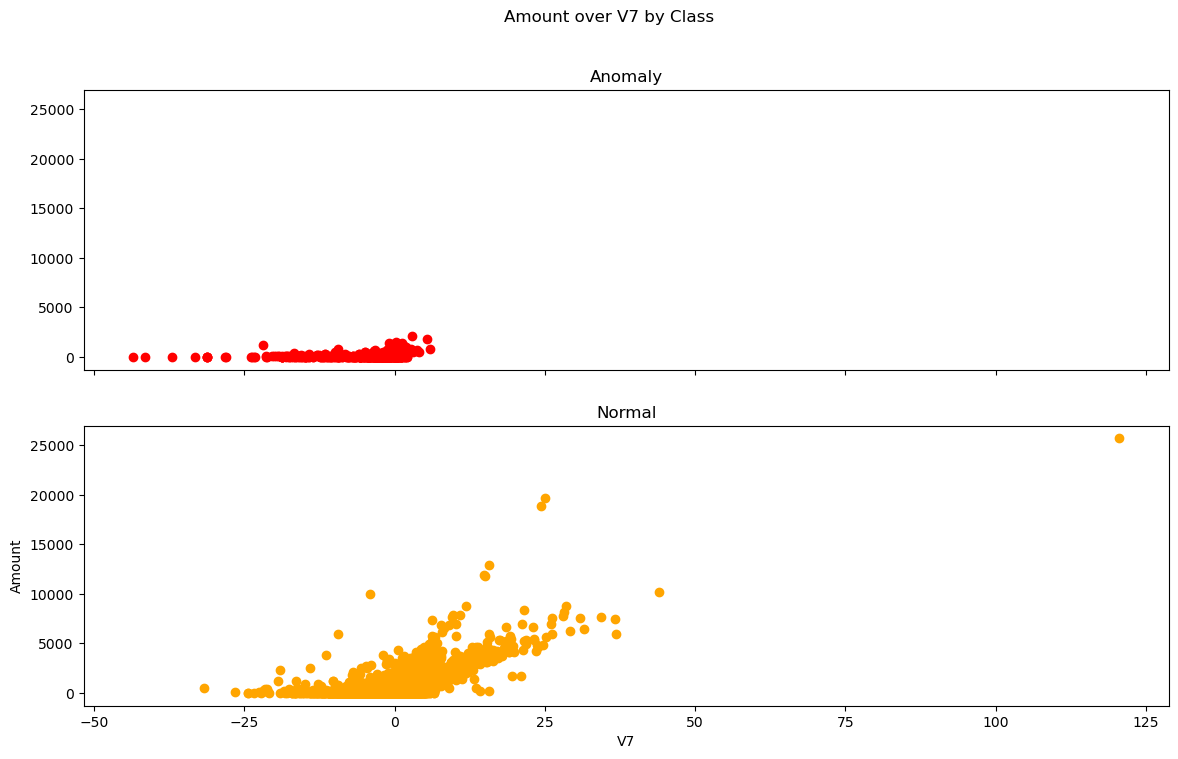

Amount vs V8


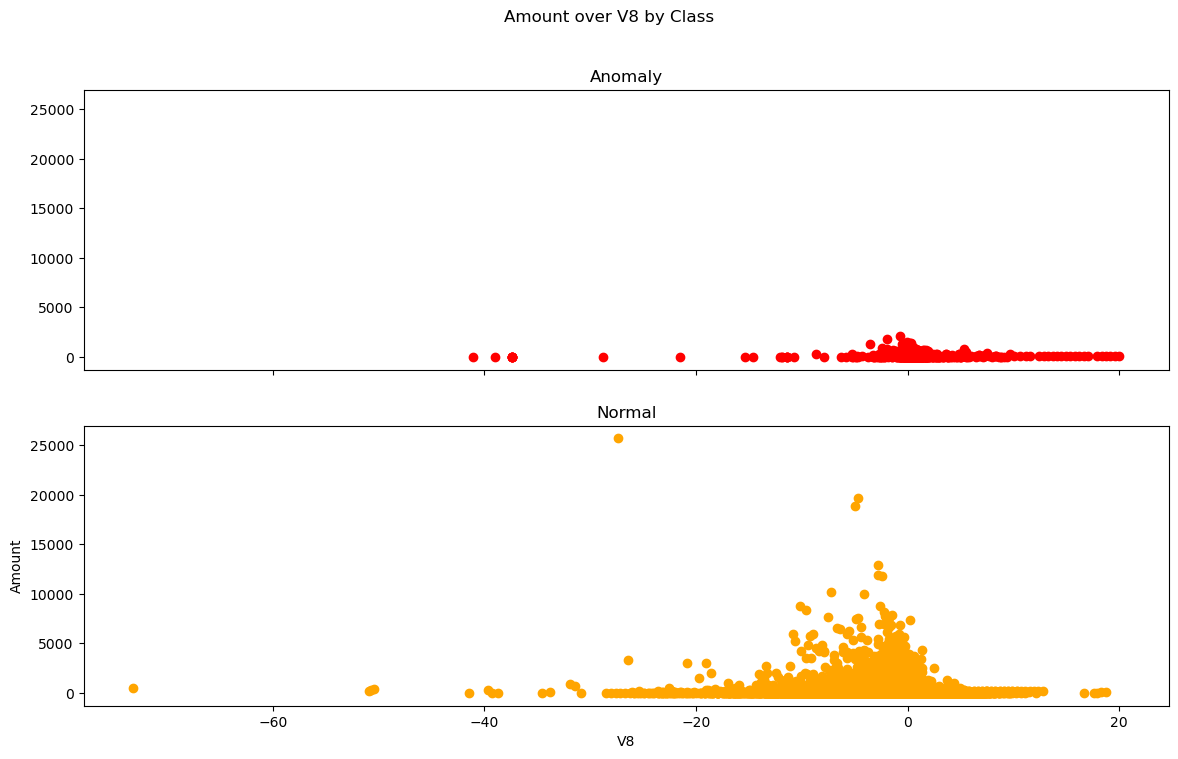

Amount vs V9


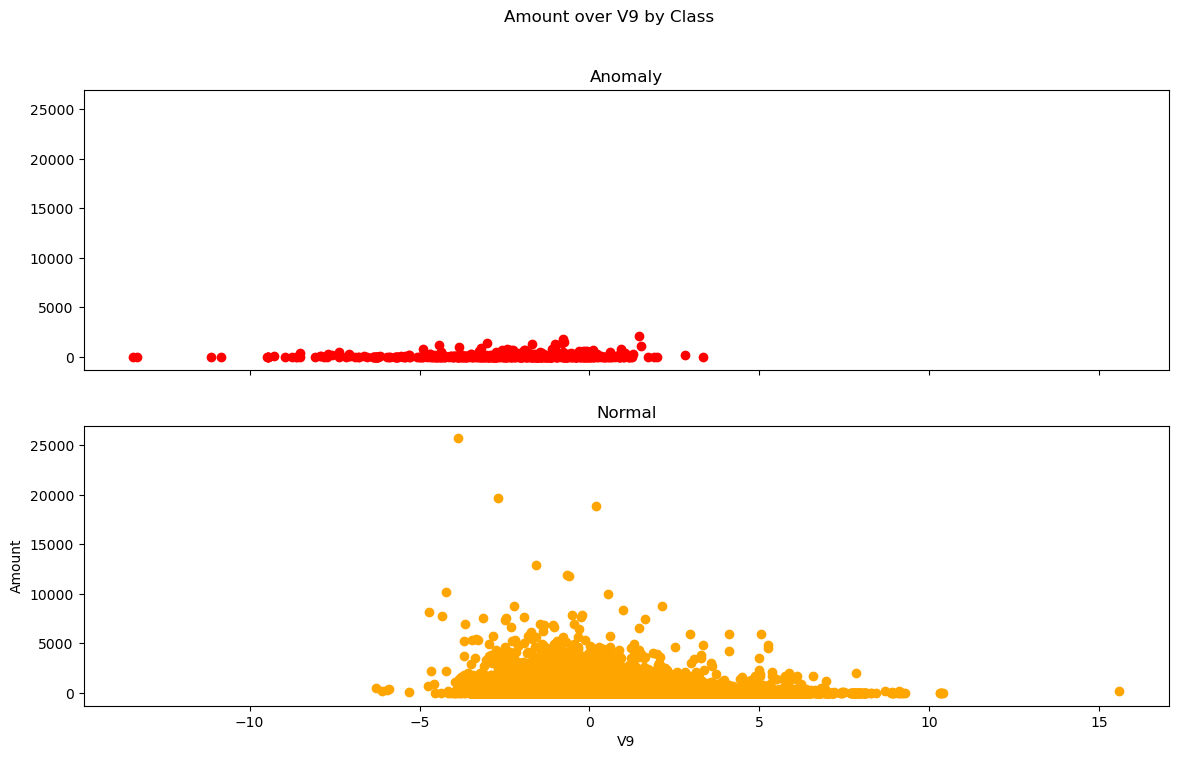

Amount vs V10


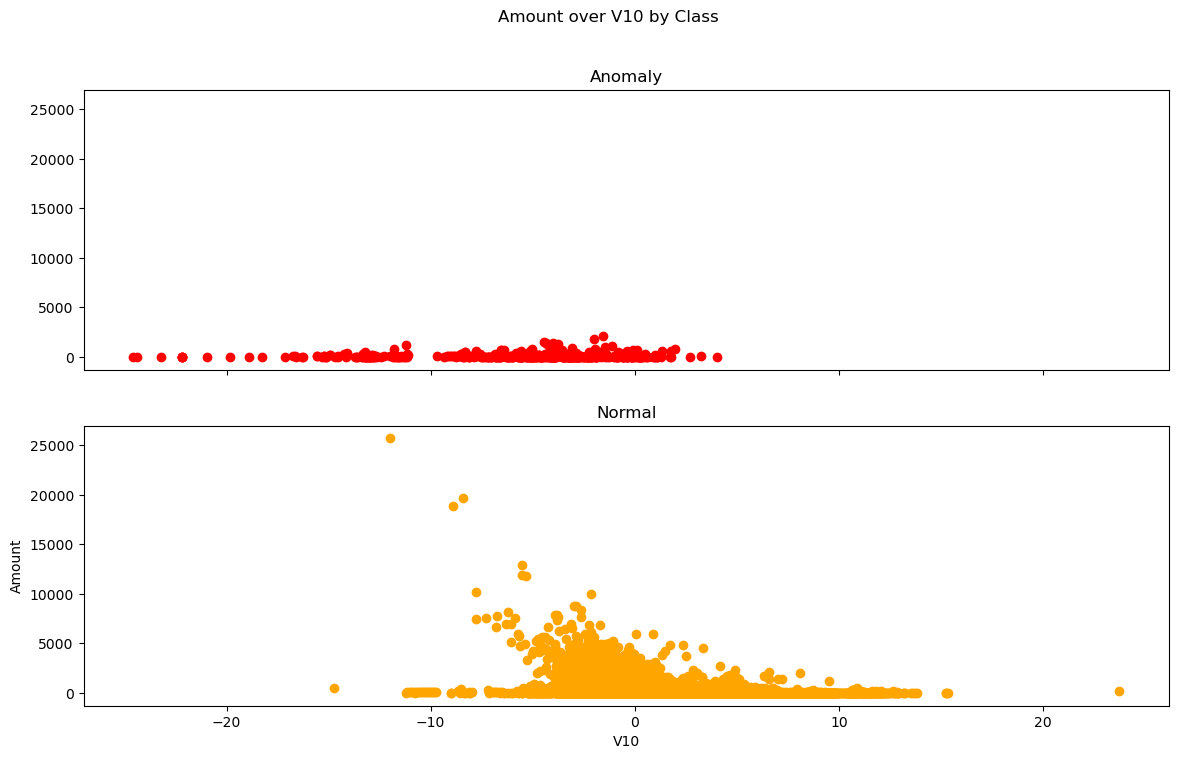

Amount vs V11


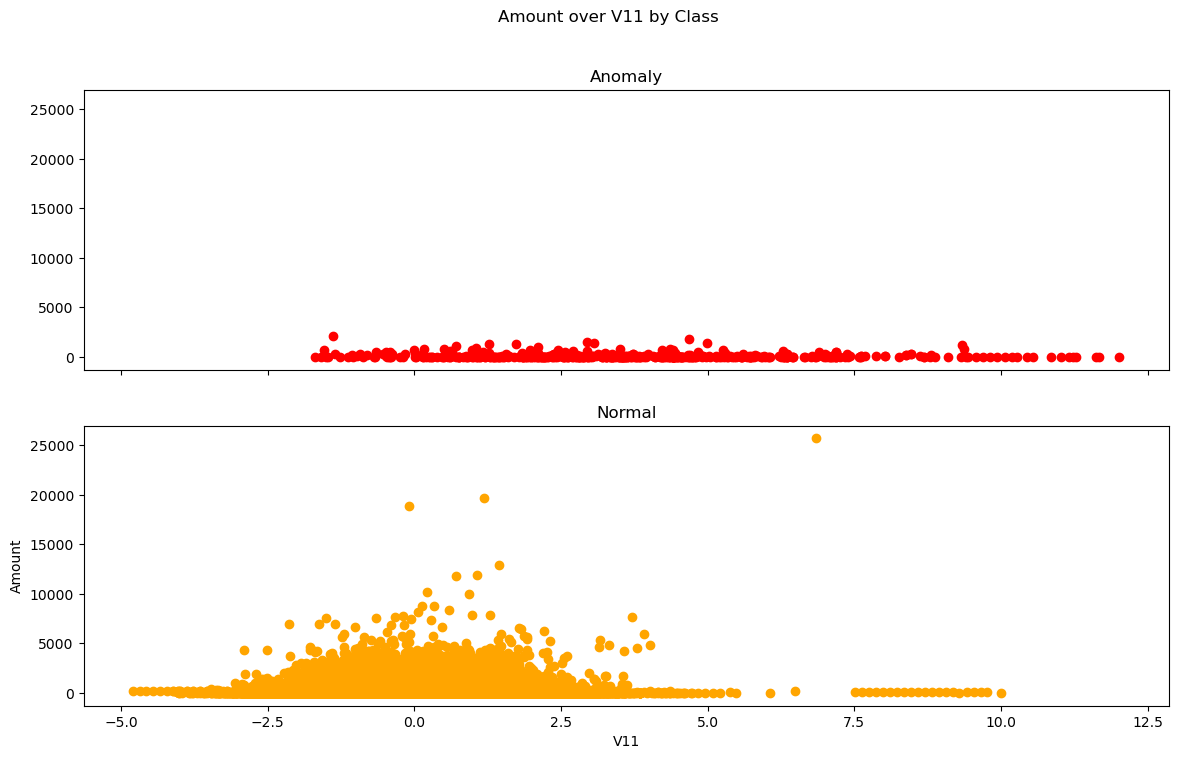

Amount vs V12


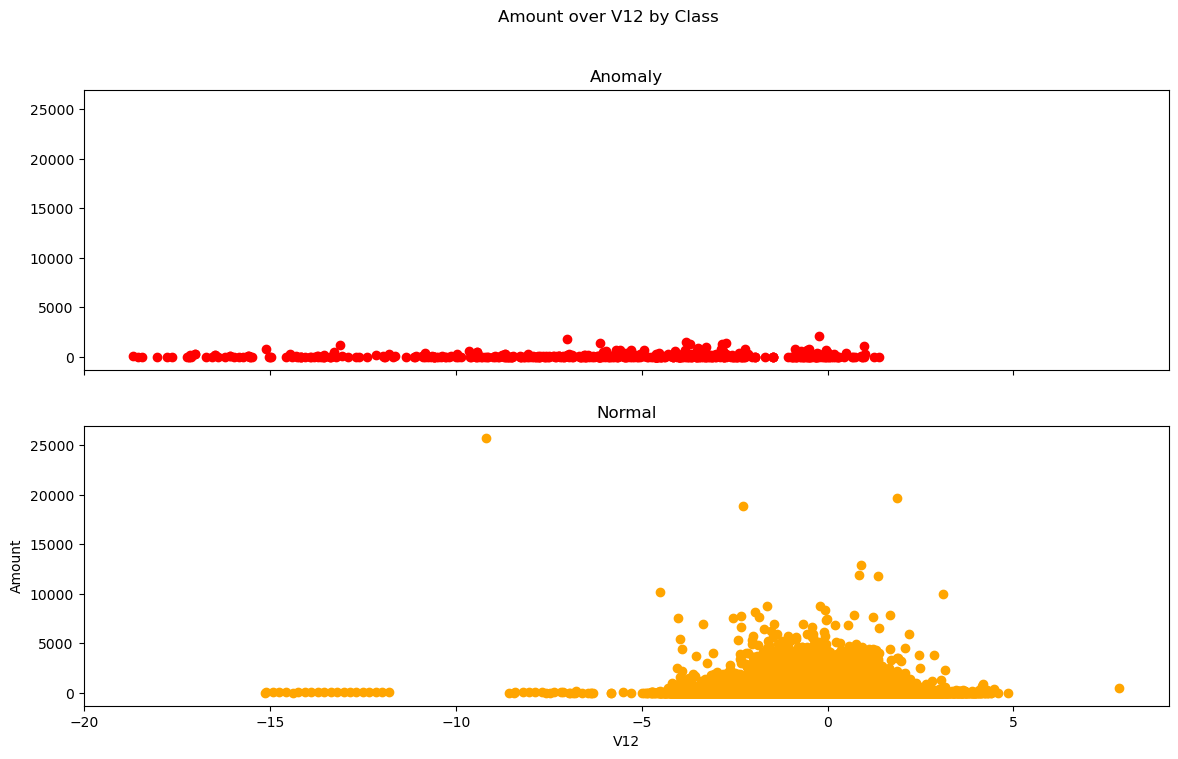

Amount vs V13


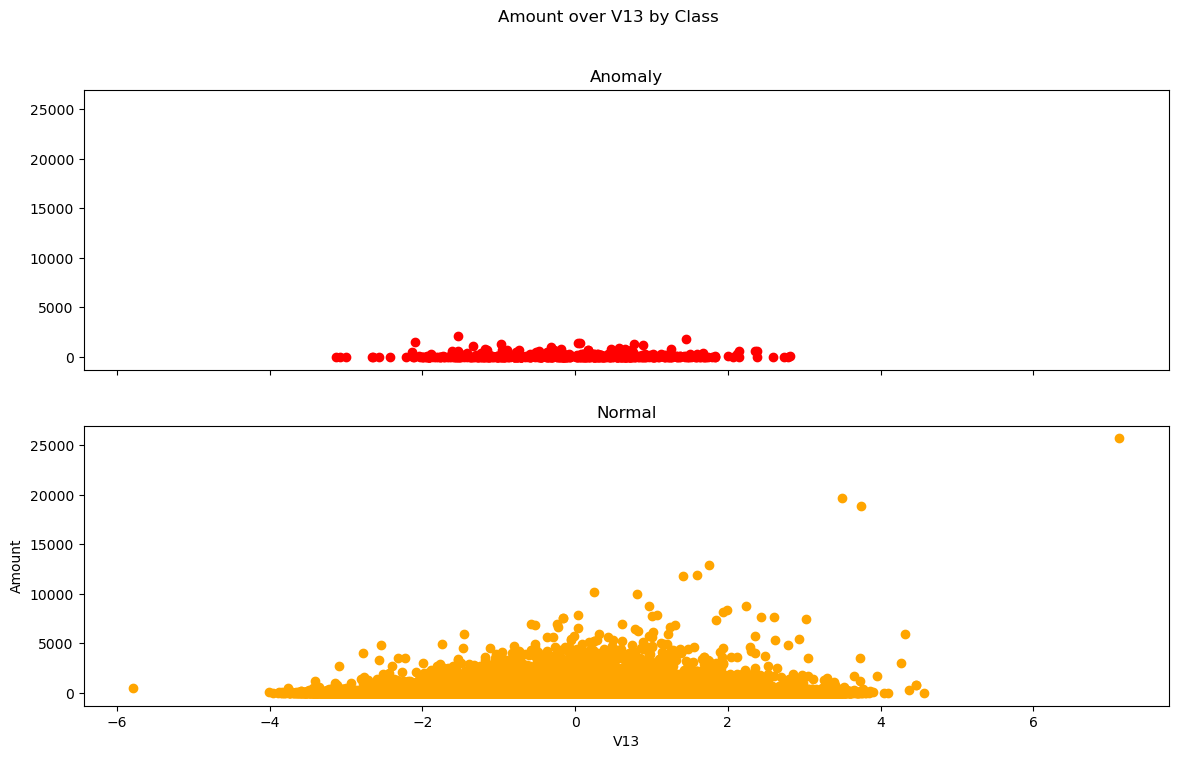

Amount vs V14


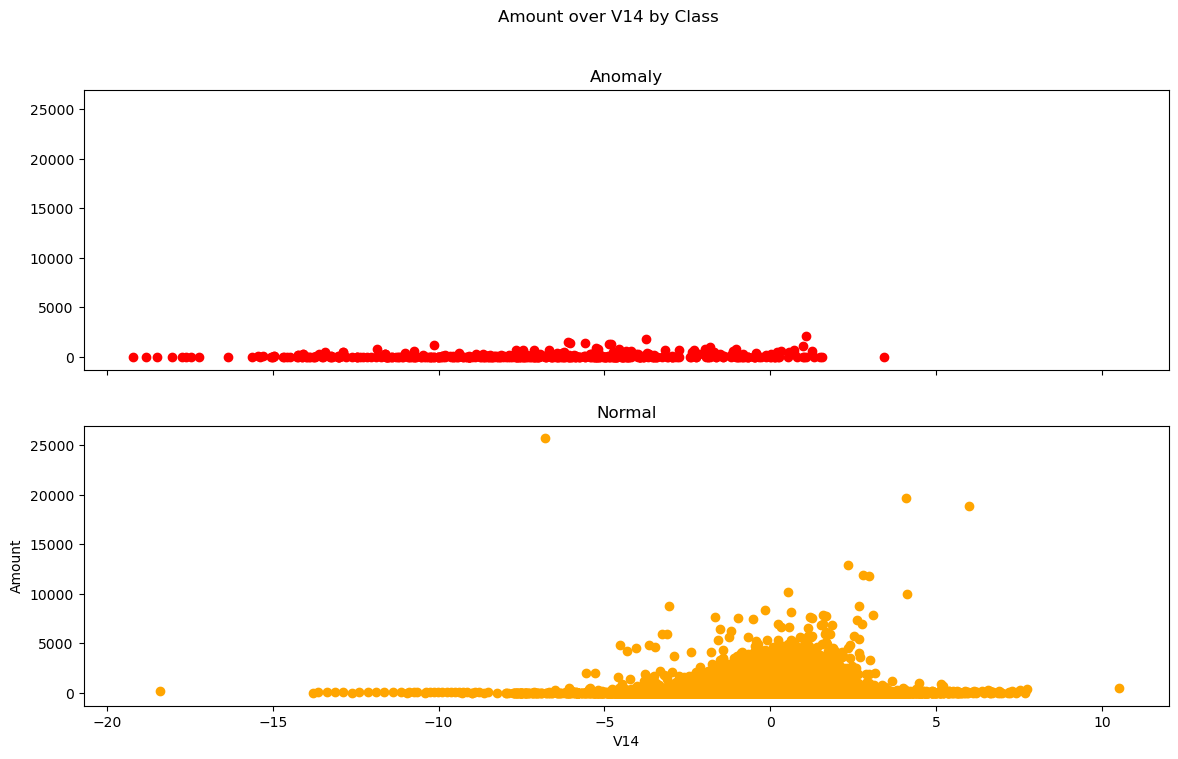

Amount vs V15


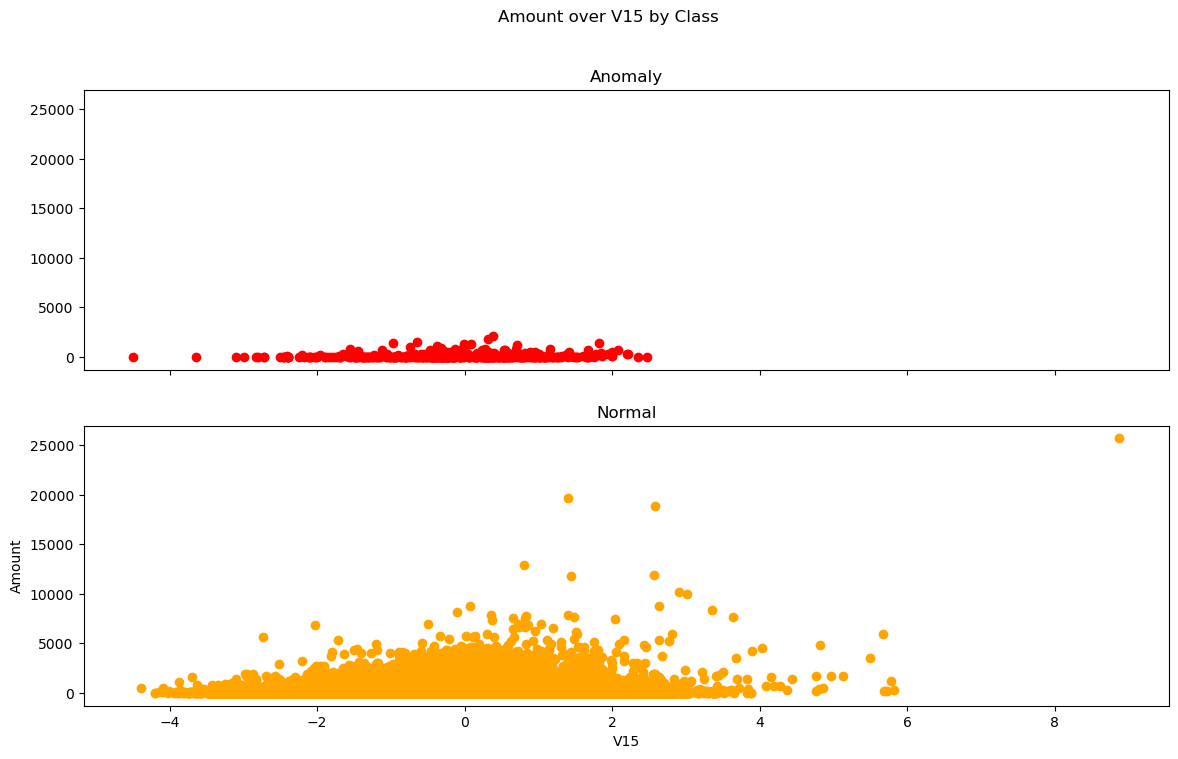

Amount vs V16


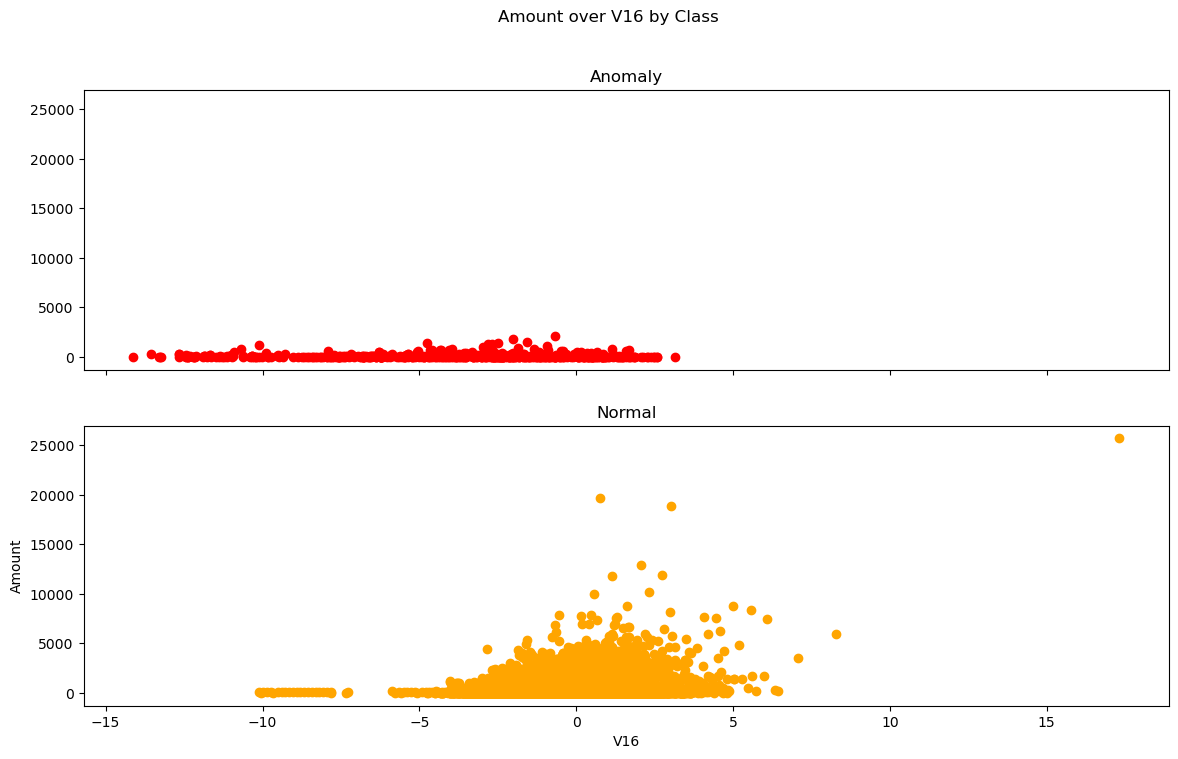

Amount vs V17


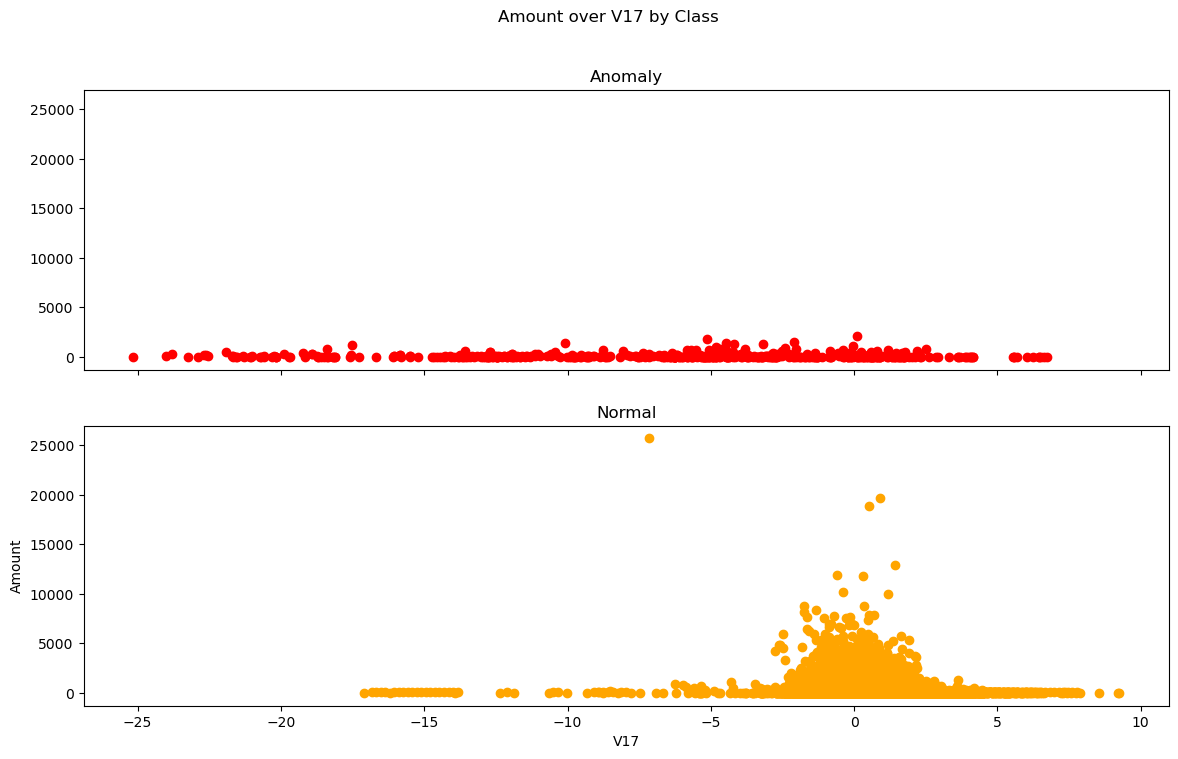

Amount vs V18


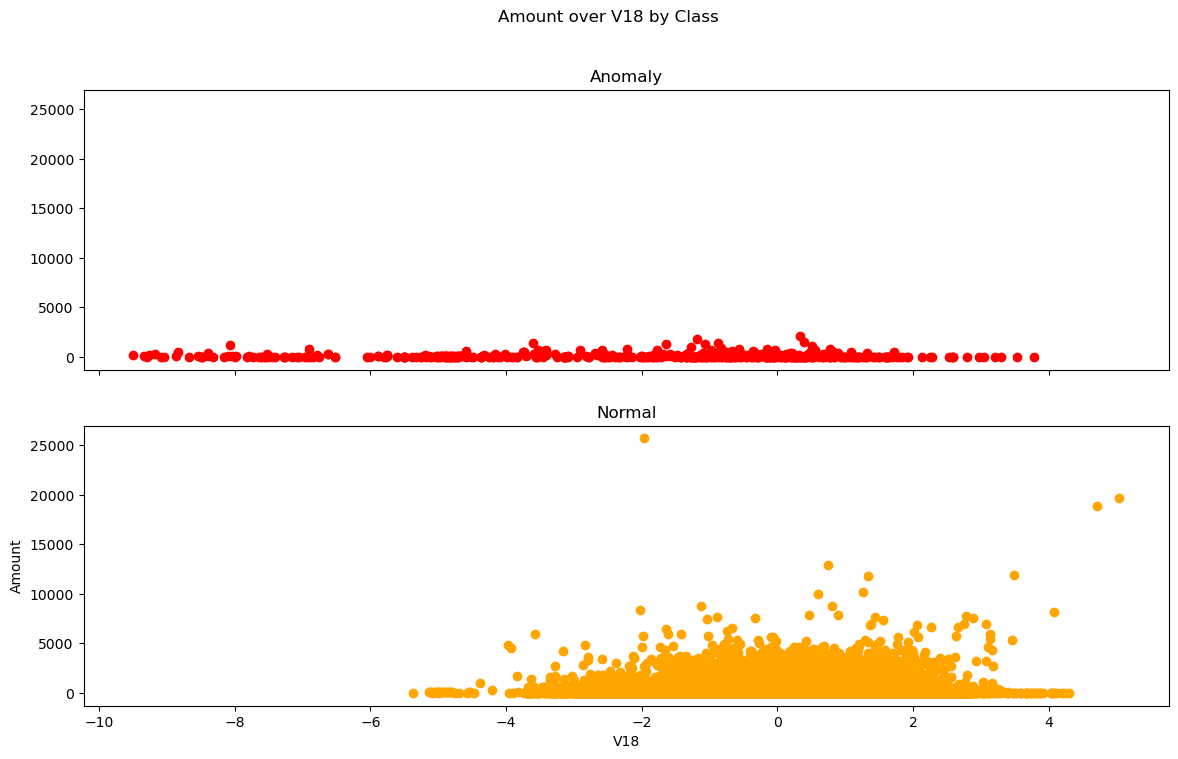

Amount vs V19


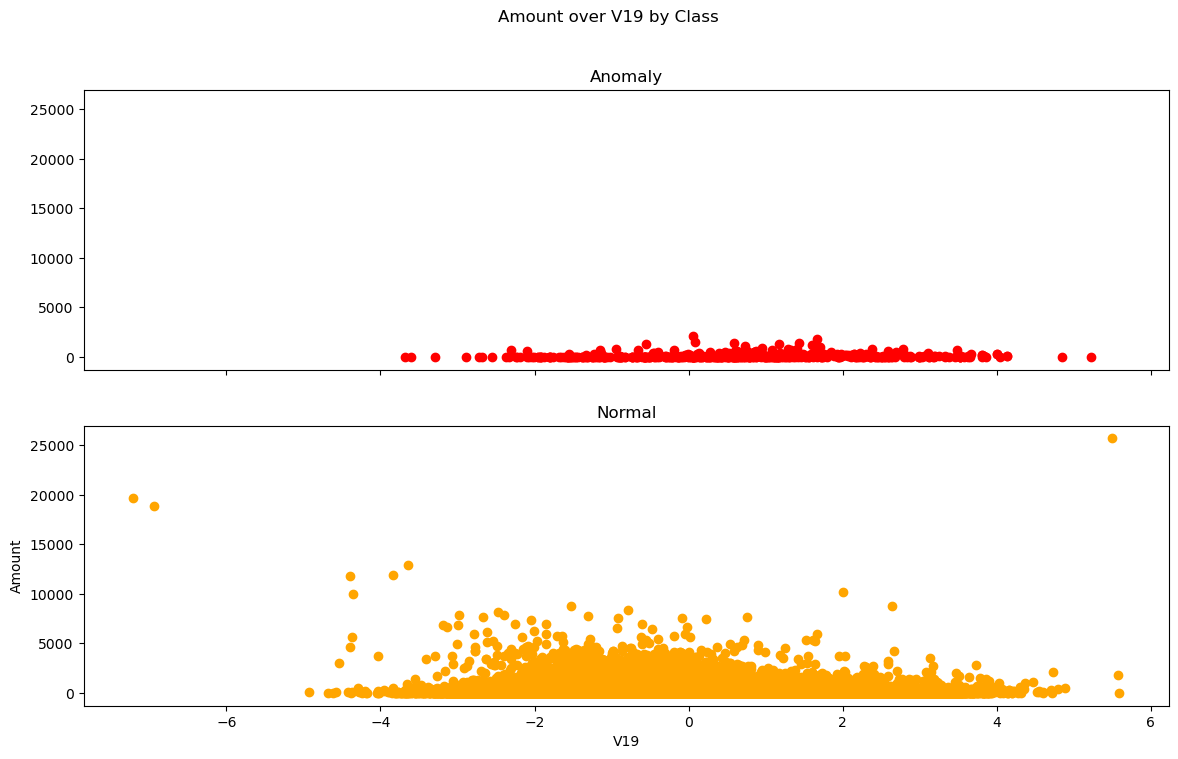

Amount vs V20


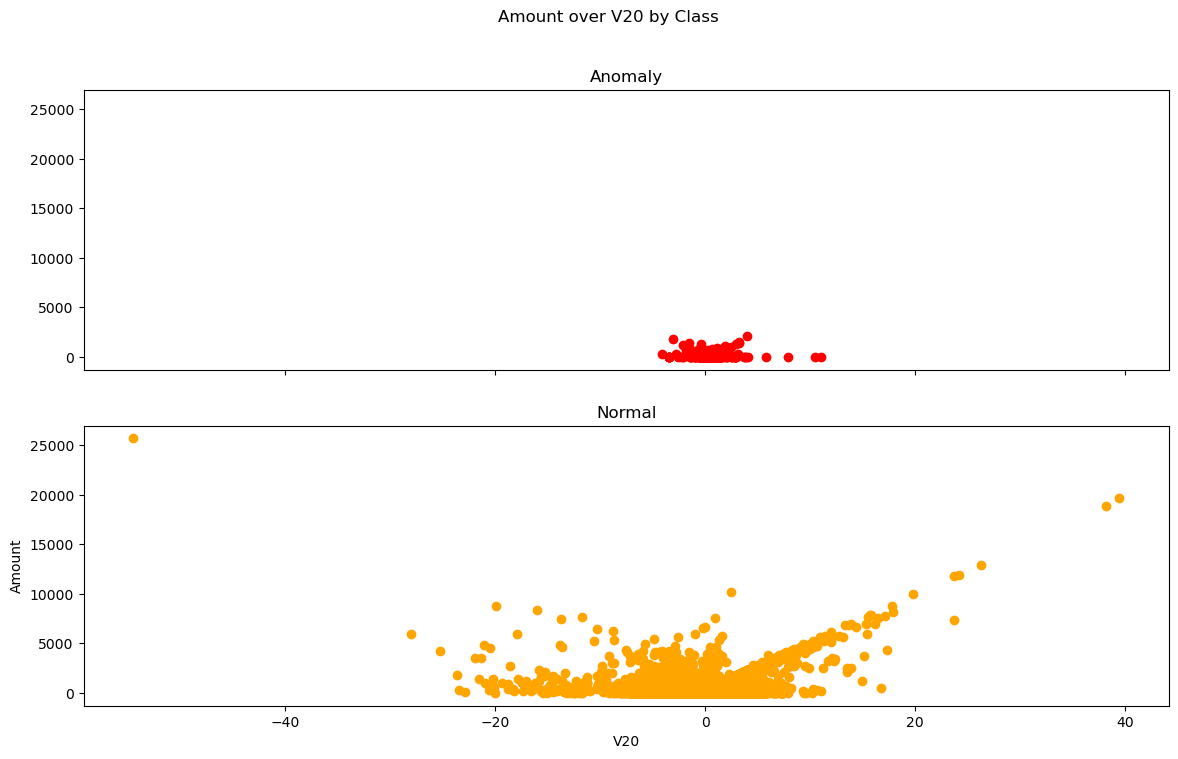

Amount vs V21


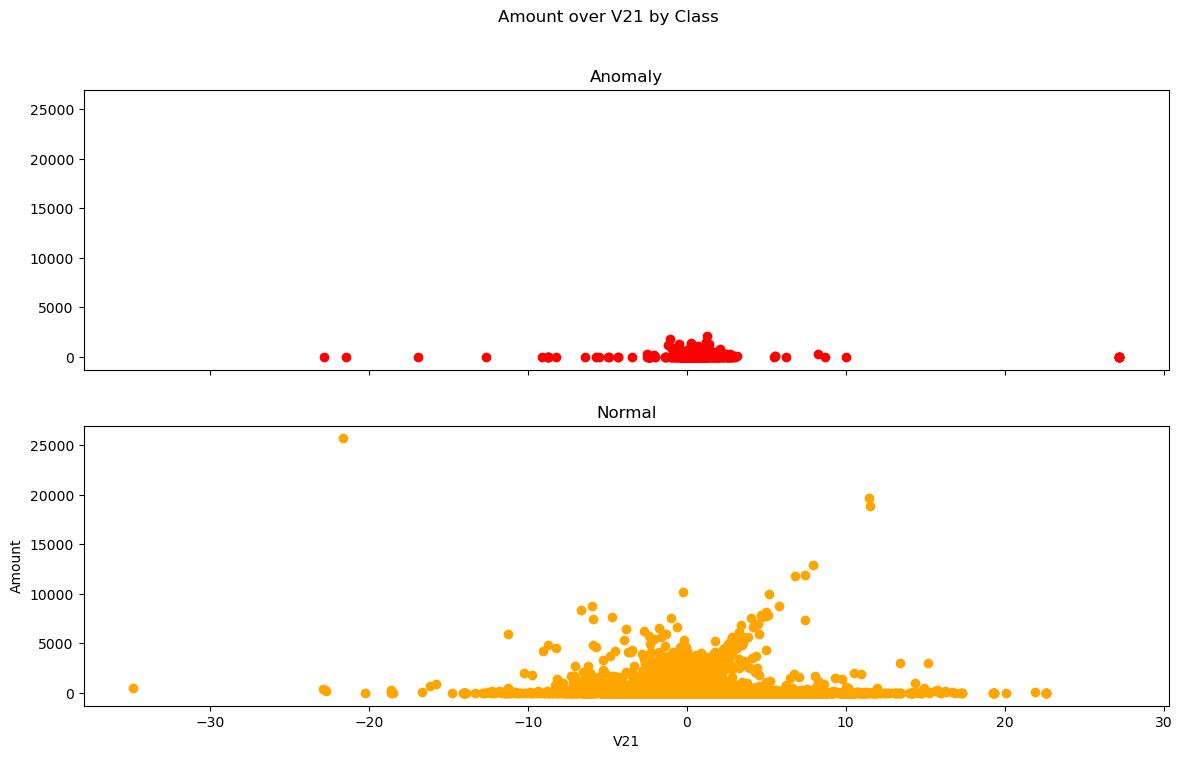

Amount vs V22


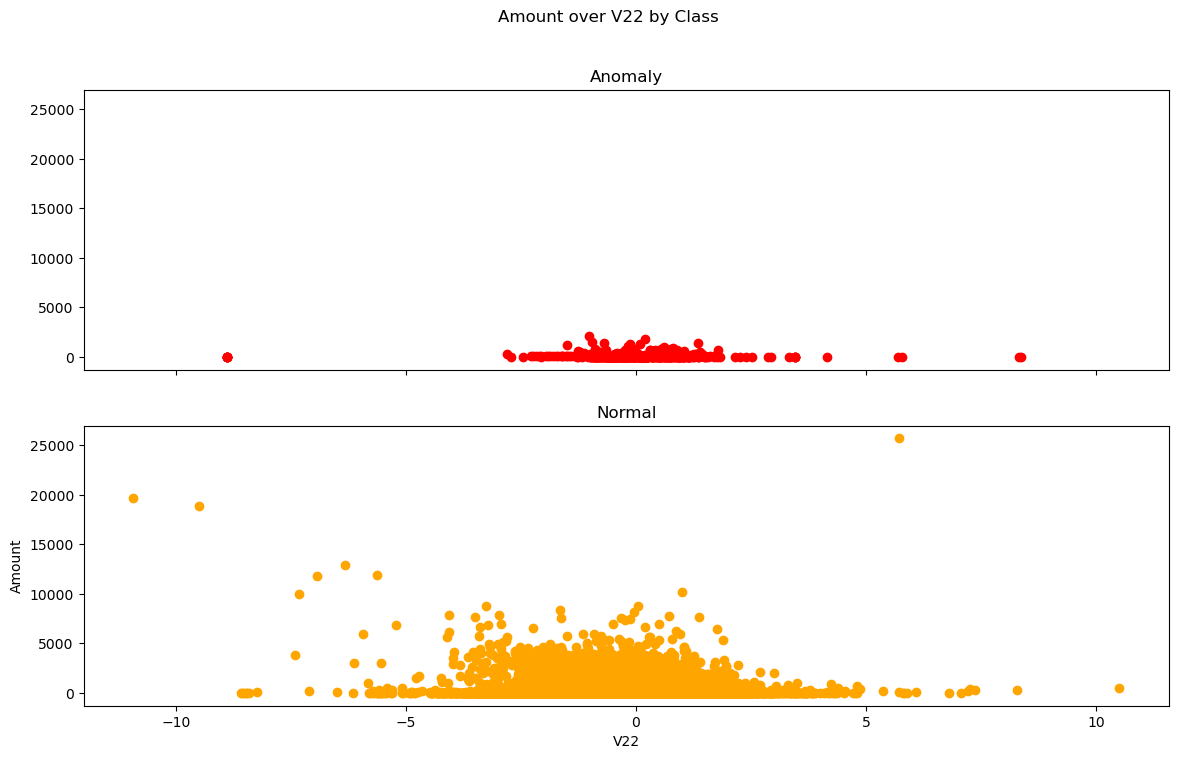

Amount vs V23


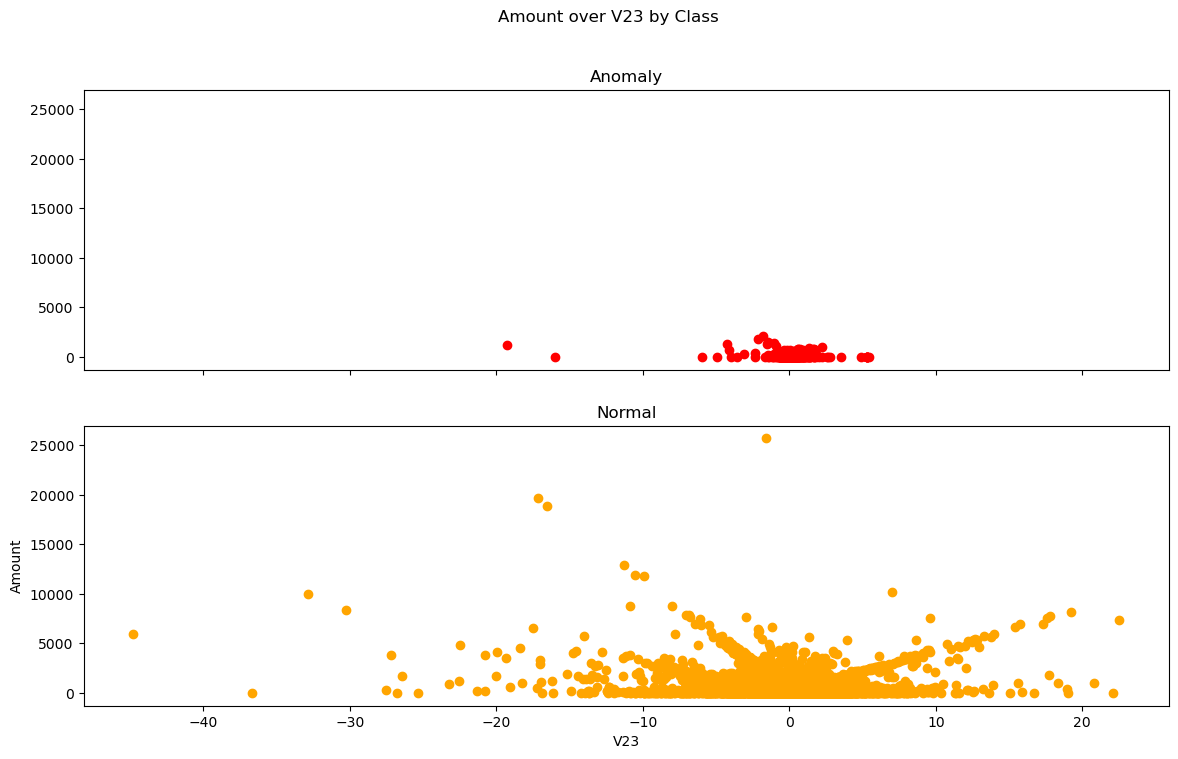

Amount vs V24


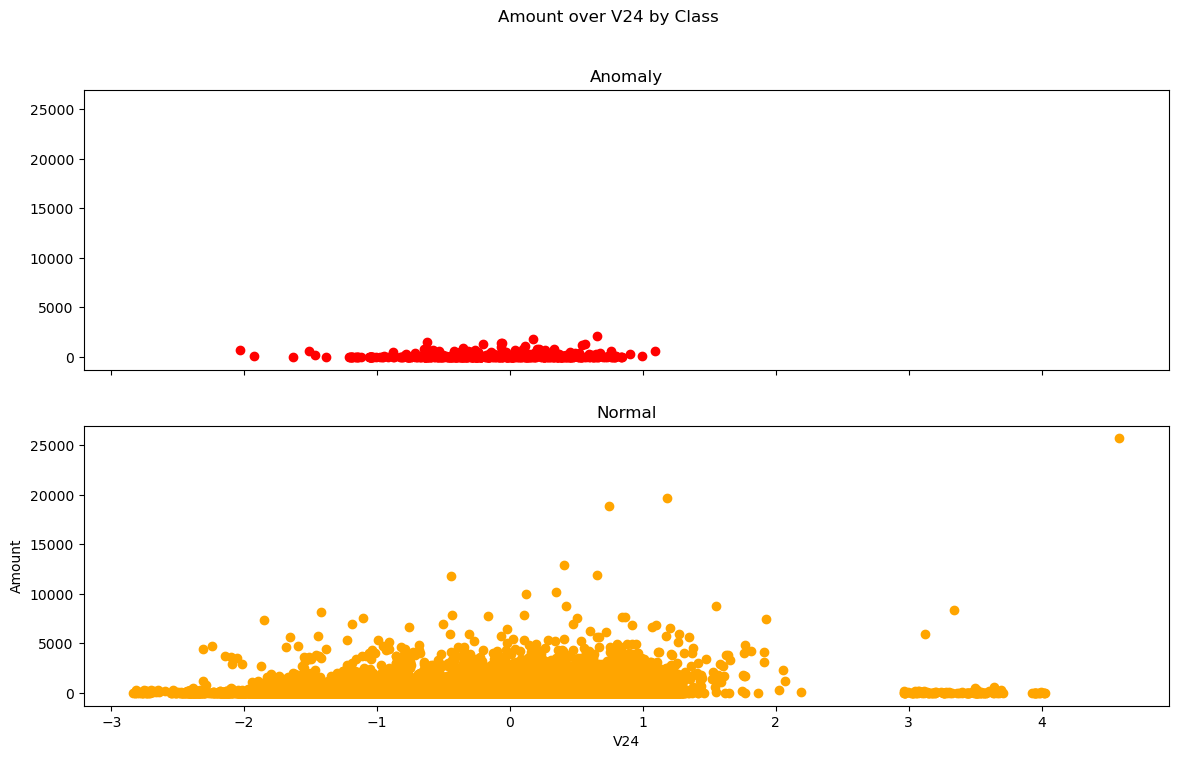

Amount vs V25


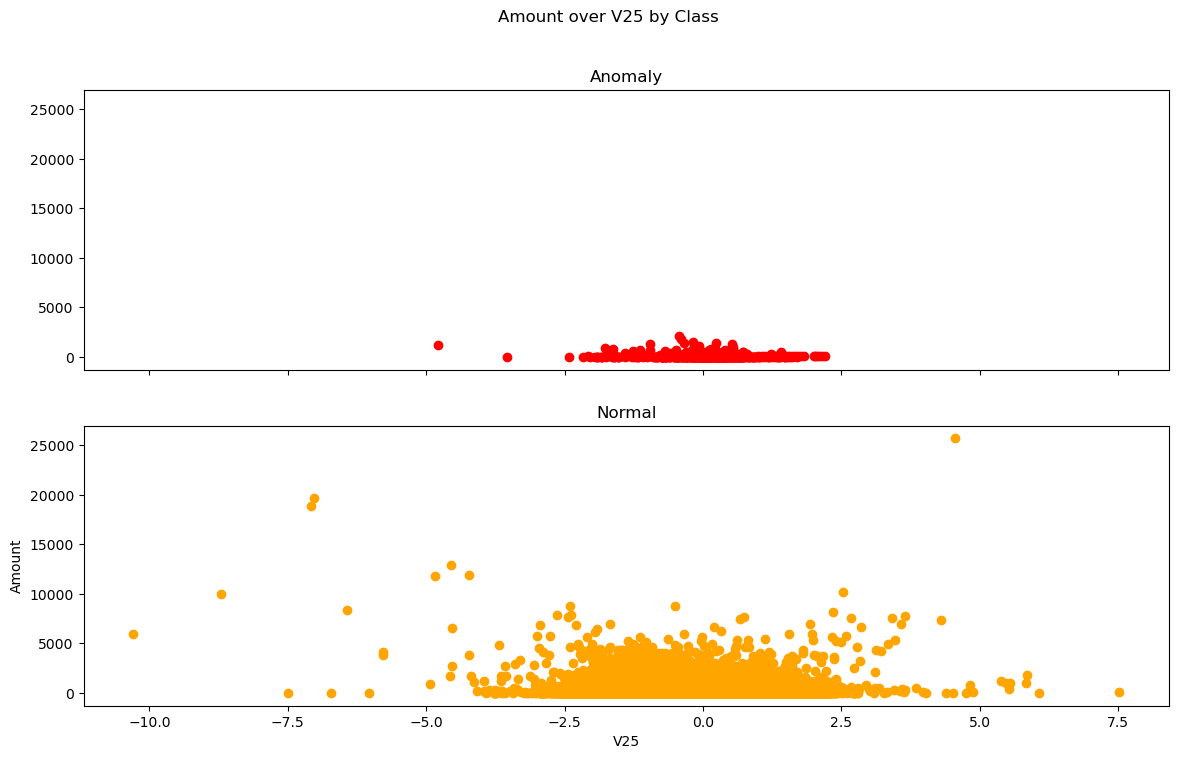

Amount vs V26


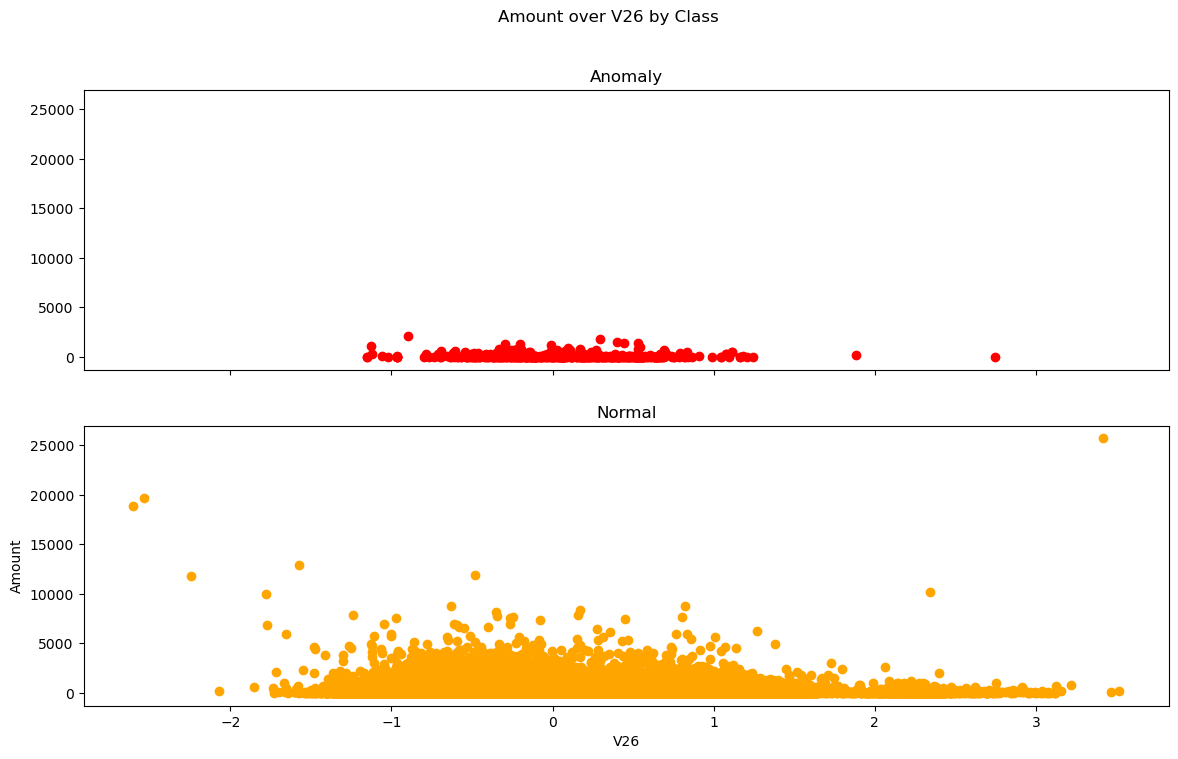

Amount vs V27


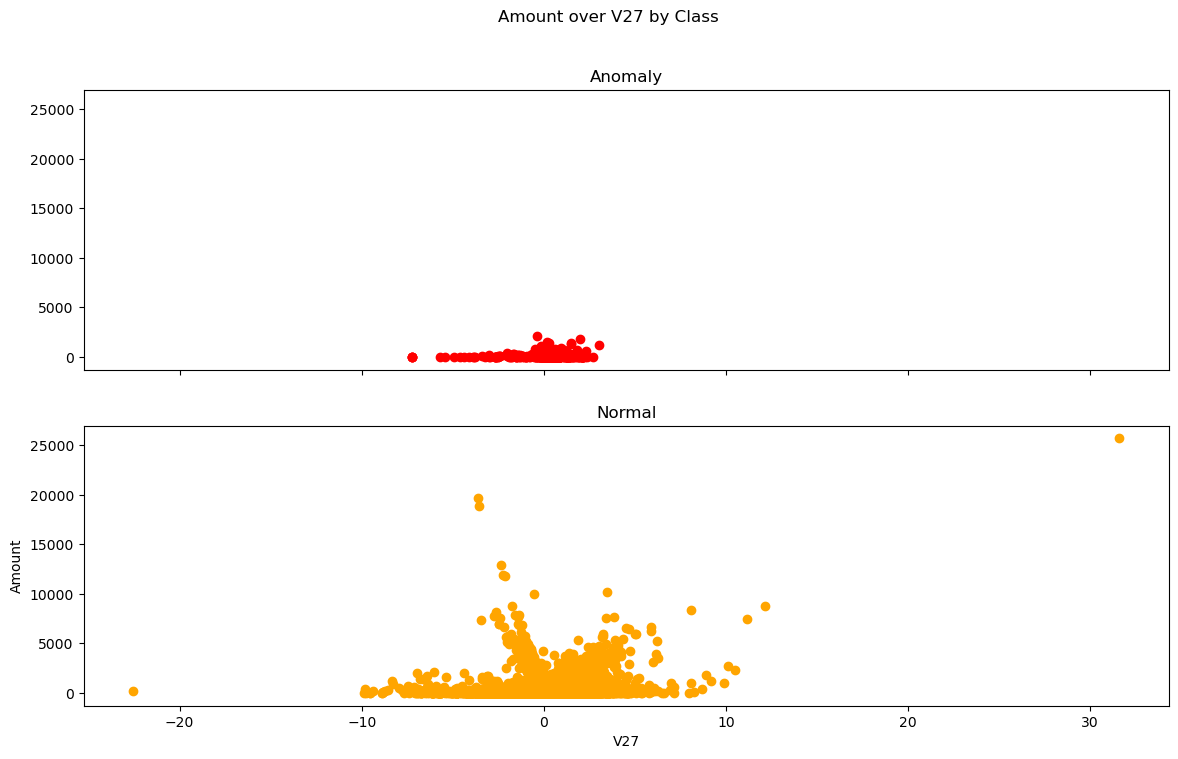

Amount vs V28


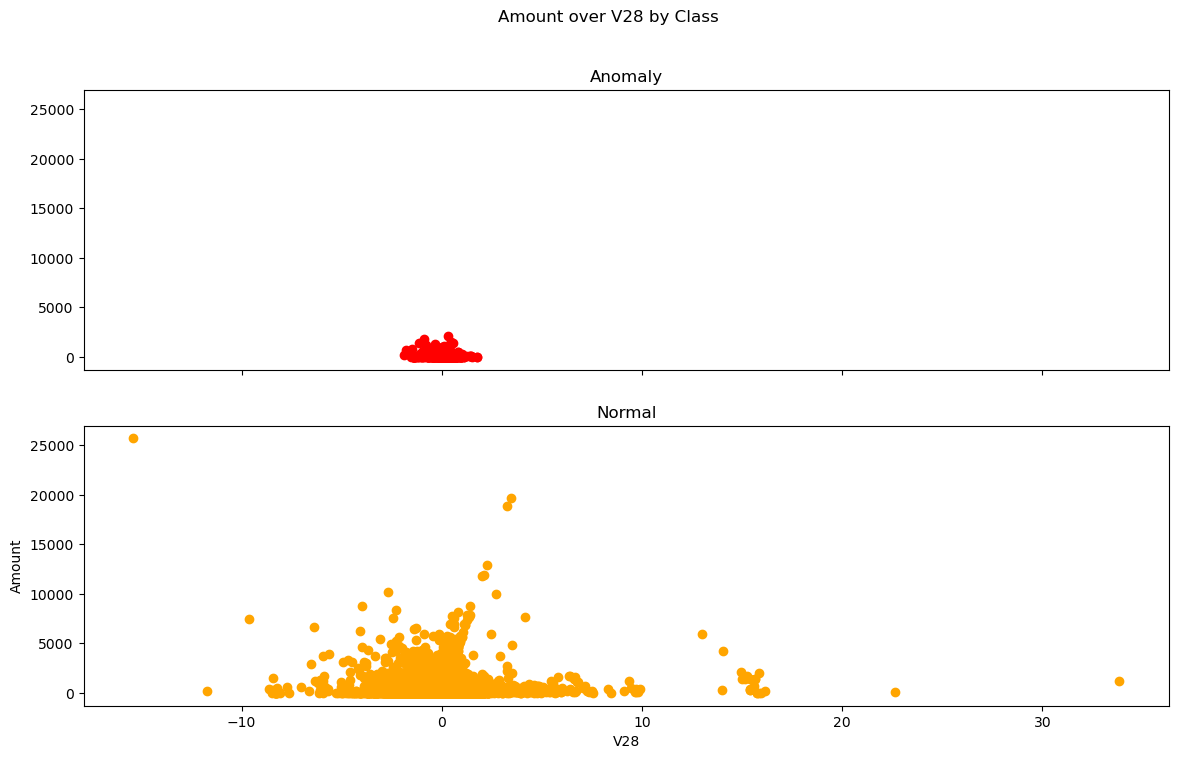

In [41]:
for f in range(1, 29):
    print(f'Amount vs V{f}')
    plot_scatter(cc, f'V{f}', "Amount", sharey=True)

This time there seems to be a few more graphs more clearly showing the differences between the normal and fraudulent points. 

<span style='background:lightgreen' >The graphs from V9 through V12 all show a clear differentiation between the anomalies and the normal points, even if a good portion of the anomalies are within the cluster of normal points.</span>

One thing to note is that it may not be the same anomalies that differ each time in the graphs, allowing the model to better learn how to differentiate between the anomalies and the normal points.

You can once again see that V12 consistently differentiates between anomalies and normal data. However, there is still the problem of a good portion of the anomalies staying hidden within the normal data cluster.

You can also see that this differentiation between normal points and fraudulent points holds for V17 looking at transaction amounts.

You could also look at the data for each of the V columns and plot them against each other, but that’s more useful to help identify precise changes in trends that will be more useful to know if you want to further train the model to improve its performance on the new data. First of all, it’s possible that not every feature is very significant. So, if trends do shift, it does not necessarily mean that the model’s performance will be downgraded.

Thorough analysis of the data helps data scientists get a much better understanding of how the various data columns relate to each other and lets them identify if trends are shifting over time. As data is continuously collected over time, data biases and trends are bound to shift. So perhaps a year from now, it’s the column V18 that shows profound differences between anomalous points and normal points, and V17 now shows that most anomalous points are contained within the cluster of normal points.

También puede ver que esta diferenciación entre puntos normales y puntos fraudulentos se mantiene para V17 al observar los montos de las transacciones.

También puede mirar los datos de cada una de las columnas V y graficarlos entre sí, pero eso es más útil para ayudar a identificar cambios precisos en las tendencias que serán más útiles para saber si desea entrenar aún más el modelo para mejorar su rendimiento sobre los nuevos datos. En primer lugar, es posible que no todas las características sean muy significativas. Por lo tanto, si las tendencias cambian, no significa necesariamente que el rendimiento del modelo se reducirá.

El análisis exhaustivo de los datos ayuda a los científicos de datos a comprender mucho mejor cómo se relacionan entre sí las distintas columnas de datos y les permite identificar si las tendencias están cambiando con el tiempo. Dado que los datos se recopilan continuamente a lo largo del tiempo, los sesgos y las tendencias de los datos están destinados a cambiar. Entonces, quizás dentro de un año, es la columna V18 la que muestra profundas diferencias entre los puntos anómalos y los puntos normales, y V17 ahora muestra que la mayoría de los puntos anómalos están contenidos dentro del grupo de puntos normales.

[Return to Contents of credit card dataset analysis](#1cca)

<a id='6cca'></a>
## 6. Summary
Data analysis is a crucial step in the process of creating a machine learning solution. Not only does it **determine the type of model and influence the set of features** that will be selected for the training process, but it also **helps
identify any changes in trends over time** that may signify that the model needs to be further trained.

We explored and analyzed the data in the credit card data set, generated many plots to get an idea of the relationship between the two plotted variables, and identified some features that distinguish between normal points and anomalies.**We saw that V9 through V12 graphs show a clear differentiation between the anomalies and the normal points**.

Next we will process the data to create various subsets to help train several types of machine learning models.

[Return to Contents of credit card dataset analysis](#1cca)